Prediction of heart disease

The goal of this project is to apply and compare different machine learning models to classify if an individual will have a heart disease or not.

# Data description

    1. age: age of the person in years 
    2. sex: gender of the person (1 = male, 0 = female)
    3. cp: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) ## anders herum?!
    4. trestbps: resting blood pressure 
    5. chol: serum cholestoral in mg/dl
    6. fbs: fasting blood sugar ( if > 120 mg/dl, then 1 = True. Else 0 = False)
    7. restecg: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
    8. thalach: maximum heart rate achieved
    9. exang: exercise induced angina (1 = True, 0 = False)
    10. oldpeak: ST depression induced by exercise relative to rest
    11. slope: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping) (Es gibt 0,1,2?!?!)
    12. ca: number of major vessels (0-3) colored by flourosopy (das geht von 0-4!??!)
    13. thal: blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) (0,1,2,3?! komplett falsch)
    14. target: heart disease (1 = True, 0 = False)


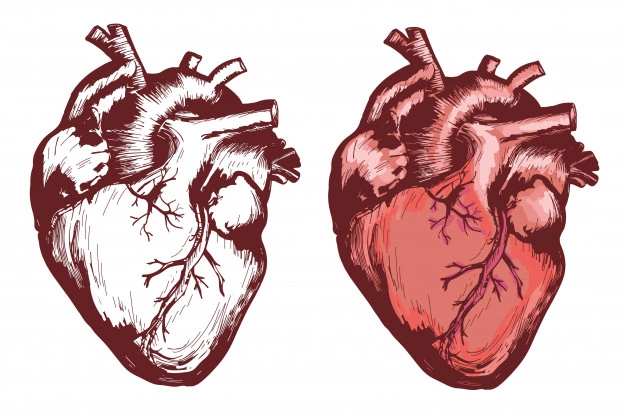

<IPython.core.display.Javascript object>

In [81]:
from IPython import display
from base64 import b64decode

base64_data = "UklGRvYcAQBXRUJQVlA4IOocAQDQbAKdASpyAqEBPhkKhEGhBULlTQQAYSm4t+1zv8L/7cEql8Agf6r63+vgxyyeodnHgHEi6KLHeOd/HdjHpzHP+c1Vb6VF9/b/9h/Xf1370+Qe9/37++f3//U/4L9rfk74t6gPO32X/J/63/Aft18qf+t0OdWf9//Memt5l+1f7v/Cf5z/3f5X/////71/639nPcb/Qv9B/3f8p+930Bfql/v/7z/mv2h+Nf9yPcj+6HqD/sH+d/8P+j/fj5if9//7f9X7o/7d/uf/V/of+f8gf8+/u3/n/P/5rv/R/+Pcn/un/d//nuDf0n/T/+j2f/+h+4//E/////+0b+v/73/6/7n/f////4/Yx/Q/8l/8v9F/sP//8gH/c///vXfwD/s+oB+//u7+u/sL4O/5v+mfjJ/Z//R6u/kHy38+/uf+H/r/9i/6/+a/Dn7W/oPIZ8Z/A/4z/Bfuz7h/xP6lfTf7D/g/8Z/XP/t/qPx7/lf4/8uvM34b/xX5Z/5H92vsF/DP4v/U/65/dv8Z/a//j/p/XH7ovb/8t/tv8b7AXq582/wH9t/zn+n/uH7efa39v/o/8h+4/uR+r/2n/F/4T9sP7h/8/+V+gP8Z/lf9w/sn+V/1X93//X+7+3f+d/yv8f/gPM3+6/5X/g/5f/Hftb9gP8f/oH+N/vH+T/23+H//v+u+s3+w/yH+f/7H+N////W+JX6P/dP9X/h/9D/z/8R////J+gn8d/nH+B/tn+Q/339+////R+6n/p/nd8+f2U/537Z/+b6OP1P/0/5w/v///zjpqFLT9S9llDtRfUOyhxBqxcOkVV+JuPlEddI2Q0GDLoaM8Iba6MWDDNA+8upZgm8FPWETxxjBPUh+7g5jofrSbqRoKo/Z7RhPumIHqPEYamZBquMtwixIMF1JQ919M91If0rUno8P91u/x2N+RN92Wv01Ivltiu47PR5EyFaLA6P2llaHw3/snTsw3yMsJwC+ujvlllG7555sIHyStTfbRUcU4gXsNVnDnh6/Dyy+p8l0/s4CuXtgmSSW3bjREX3FbhX5hpFx2iuKbCEYr3Mb5q+QdOt67+uv+cbJFk7c5ZzC9CtkuoaIurO0uAb8HyrklOZwouFIJeacr2ycqNn0t2CA1mj4lTuZ12vnBxncXj0BIeo5WwfG0dYwyhXeUS0R2If2IV9wdG+GsYH/bbw7vqsgtlIzMHP96UuqufMWLCvTDD8+WpZ6Lr32NtMiD7iQ2XjwFma3F1nMEkGUS3sclDrPRKpFgJfJTwa6SqPVe/G7VZFcE/808J/1z8JSUU0vgDil/EEbGGtaH+mZnfrohV4R5fsZtdTwYQLnmHe2S9kpgcRuyGWyfuZyvGzQYBCZrLMQY2Yru5qWB9nDEixXwj7T2znAd0eDYooUu/w3wzq6i4Yc4SXstFLLBUV/z9Rjy+kyJZC+pTJFRRZ4Yd3NZ4cd2sRWaJwby5AenrRROgh3L/kza6f+xHb+jD/auJY36RETNFLQ/wPAJ1mNOmrVtlMbKZHKgvfqIqY7vPEx0Y+y3IZxeHIFSI/nXh+r4qPA2vDvqP+ErkUxcQ6qIfGmelz0D5uQOrWEnLWcZ9lkWykP73jZlpEKP5AQ/D5I+oM7s1DB3RIUg4FhtH4lOkR+P72PiM5SNElvAQgUe3NE1hvGyQEJC2XWfZrHqkwNb/lVUKGRJyfiF3Z8c2uEbt5ktdH+2PDdAjGlC5koTkn2FNnxyhMKl3tjUjLMAh645SJFtagFOJ/5VHOSi6FU7FC+M+RWuI2ndcmyiquKf32zT1teVovzVdkq4Rh2omcZChLZmyrko0H5lXYJG8Y4sEyOmzrK6HoiFz5s/wcJRlqkFJxvxUUMCnxp/CZeNYh9jprI+zBSHl65OWOE2Va1HdBZ+/xZB8Uoonghj2/iSo6/QgtgDnZ/hTgH4pfCOK0slRVTpbk4JglRQeFNUXsOWC/1Meu19S5W2wqbB0J04m9RtBodRzZmfFPd3YCil3tQqHQL22nvbjAeYVWJnyjhVEb1iCquv1AFT99fgCrkgzQ+ziJ7LYQu9QIlHnBsL3Ig1kxhs9npfXmeLZGgstb9pC8LHfcM3eZ54fmEHdv6TqMrSpijoN+R2v2wceR8Is4XOOMVMfRk/8tN4GIeFYHud2+5Lp3vquF7YieY3bnUQxx5usZhTDfTVIuWOpOwZ9CIP8xcSZWk13JQtNl6mw6/5j9KTZqcwf3gZhTWG19NOkXeWQ5ozee1qDvDgx7fOqErO2P/lfkJK3J+zDuEI+qZ49uz9q8Aiqi9D9kCTK9U2XVDLdqld5/zCiueuzOzSBUvj1H6JyTixDAdhjmO42JFTucAtpmBGEex/sJB5ZpJW/oL+m++NErxjquFIEZ58ldjsr5mSuSkA9PWm4A4brYSh5xJXA+FJsRgfpheH/j2uXReFCWSHLCIRjINPvV48J/M6fn7eLw7VukL6Zu5Xy+a9LoBH8+bmMIPll0k9nDqQFFVG9KCve4CJwjyqKD8n/wb1ouNwdmLXjsx1i8DFQiIfmQfckSWQ+UZvu+OEhhuClG5gW+rEJZkCdiNuIWZQein1ahmXvS1fbC540wvDPMC19K8pJnI2OTnfo/XpNqDuvg7ODCC5IOwH9pjnQztjsxNcwQxUYKuiWLju0NjR5ZxC9elCzRC2A457mvTMUZv0RsHNKn/CS7KphoLUkvcZjX80wlFgjnwS568DUQ9Q3O76UFQn6cmdzQ6Ke7FP/vaoAHbuOkQf1QTpdzfzz/KdBTJFoiQpupChi8mXuoUpdZS1ihJIRkx5ucd3z1jK6BiIv/e2Sm6hTu39UE89v2T8fM9XrI2bGWBKXFWCXFwA0oKk9Ru/C6F8lqBhI35ViBhN7tR6Q+6AkRQf0ym/ymE5GLvkHlS9tb+kE2RMzaxHBuF17w2OOhPSB0wH+h/G+jPtnqyuqRDy9tZIV0FTlcDbnl633BzZs3EgjwVIPSaQztTR7db5C5/qiWOQa2JXDCOM7mtcnodGjhEcyCPAzSnPmwCHXG2q+BT2waCiT9JqQModW8vhmpkalRJcIE5nOopNMk8bPUsFDXGEzlXiY0/Myrdwl8qox+JkuElCPpsUAVZUt9UIRjxiv12s7W2ZYld3Qnnbc1bV5ii86pI8XkcccOBmCnXtlgug8CHoHzagVPNWfY+sxrkbEn1MAgw/9jrwJPGbAqM3k57YpiI0c3rIkiWfybapw0X/9DDYjTW8rx2jsZzQ6xyDUbWypMTZdZDn4sv+r1BXkWr+xq6Jrv0Ss5QDO/IzryXgVoJISBqKw9LglJskt8MQqIMXoRg1XmJmtssz2lLGPy/qpOqGkTdV60OPLnPLz2HmT23Pt8haicVNS3YCXZ+ddgHnrVXJS3FwrE69MeJ0ur7hWCCoXqoMPPh27Whyymjok9D+kM+Vgkv9s1V5PsNPoc6ZlnKj26aIiIfetH+f2nrUHYqX9LyA7a/V7m3aoXfB5Ji+T9yf/pXvyT7A05m2brHJzDr1FaruI8gj+ogEuUsA+wyjWAkRgMwu1r82CD0g6TnoTgUG4YmoSZnuRXgJ4BeunzSnM2qTGkSH6i+cdIYdFSNgCyhUfpwmiaDDcGAdaE/KdHouUpuklBkVtinAw+4wR9zP1U5AWsOXIJT//MVholqlvHe9MJkFZFzX6IZVgmWiZzW8PvL6Mr90b11Q9zgGcRbY1vuKNQqZy2k+eyXk9dBgdFh2zzaQX2bLVFGgaYxdqkXVufMaOyIsPJuhF+CS9XJKGaVYUzpJ03bCBle2PxNC1pS8tfP5ea/Su9RhJkVnz04JH4eulHzDMekwZU8NtM///v7Nr+Qx1lFN8IRUgPJ095A+ByE181VfLsfVPkjzAxVTGjRPximQe2CmMK7m5FTh8HbC90VDekbgqkcdpsuPrTc7+T+rnI8VcAYN05TnWkHe+8g5hOswqhmS5lMwQvx26kfO4EAbvDOlAC8dJov1tgwLmIn/3hd+EOh7YGGVwDP/+5fjc0p3+ie+Zo8SbjR49GgViioToX/x745fCDqrqIDzxSdDIhCUeby6anKG4jSb8nvVYlxtoP1oAz9v+QuAhnAfLK6AZWSKkw9+PRfuJ6EyYayFj1TwI5DRIzHkpxPm6Ve2UtSVqMSrAjj+e9jaHxFxFn19JIGFYCj0m3DT3rJ/4Cv+t2CsdLgsbp2EPrRevBaFlHk6PLVQ+FsSFPZ/V3pWoiTM85EE3Ycvf3zI9huXuME2ze9y6rUPmucWehooG/+/VwMZVd82OADoIxm4JOcU7N3xrD2D24j58hAa52bxAEdkDhfxRj5a90wiHxrQu3uV4KXzqVoFOdnvlVDMMcwp9oEGC0+7fz/C67qtn9KSoO0MYZhZdalwwDTr+/zFi5QMsVPSccN6QWviAh+hCzAEhQqvEnKqnf2FsSdionvT3lfArVFLTeTlhKYJzR84UFpL7vRyE8sOekCtUXRKaqSM/zVqyaplBbyCLzZlXWHHe/AvWAscnP1dGHsNu1WVaqwJshaF3tq9ArTZb+AFXkOAGwYvbpkVpMfTG/4ckMCiK9xwlbCoIAwrtMwkkYCXK+2fj8WqQTH23K3wxH37gpr//iEj/zJXpPAp5K7XAUc77O6o9kJKN3Ut+OzJuEfcX+aT2Rug8IG45vicVHU/k4GjglpPx3iThF9/yvJ14kgUu93R5BOGUX3yM0Oh5dQGi5HhKFHchxSgBgr2lhuWULcPVXNWVrKOLv8bwFEm1H3XRxwLbTOzlbXvWdmgj9NKXj8SIqT0cS5mZwgg5/3JbdzXRXGfcoU0XDGho2jmPwT+VtPGNmN7/Oixvv6bx1xp+AH8tYRNVocgC04fIWoVlRtXBSZYfAE+qDskqnTa8GI4c5csHXvusRR0rsqELd3LGgsfDS5a6XYOyYiSIEAZ3KTp1KGyWzeZxHn6GQTkA1tiHQcLuIGmOJwT/XDDggpyEJF/z/fHRgvMhRvdGqW9omTuX5jp6p6EYYS4bu+T2DPIOQ0WtgxA5ALIp53MfsNvTJs3bXpSTZIRUe6xNZvbBGPPQTByFwPzNhyr6FVHUQQzzucU5oO6Gl51bGXcUMDhGkHOMUd2TdmdE1PK1+yt8rV42IJGLe1gxuS2smudo9ac9+N3V8saPAlukTSO3pbgELrWK750JRkdnVXpwOc2IFNN9gxFNbHFEqPFLra5z/1SXYN8qzNW5bAjtFO301LTXsOLL8Cd7rzcW/IQHqaIStBSBJBUjjhY28fByb3OgcTVmfFDhu7/+BEPYqVD9r6/6oaRHTz8B62oPn5iWdkEVBA7EU+Aqg0mWP/wEXUY73X9oOH9gZ5ilAJqcJ14Vl2COdGnKIyvQtYqjV9tbpxQ9dabGqjCaINZJTQbCfqKNDO42AJJVcmQiFB/w9XU3kNZbJ8F957PGra4rPNB1/5kFkw5N7XZkYlqKIVVlOW11vmTbXsb2et+38J8eaAztJz/YuFfbgNh/vjQ7InapCLLngelnzwg0R28laz7DeCbxFSCmQIf6Fy+yWc6DTLFDYjlyMyw3hKw3iW1bdi/neCJiDbGEOHOU73XSHuGK35lv5umzUQaLvuwTXMCJBFQOieal0bJfXE/unwUN+b4tlVrmdUL5nleSDORomJmiyaSUNcftruAOBW+qy41EtMxL71At7pH6+eMuUIOuFV+gFWYwjRDBh3FzuoWL84y4N3o8VpVUHIOyXN6LSZQwKbhRgLcpN6a/RVl9w3q4BWiiKtZO6Z0bAPG6QUG1dVgMdP7LzZtxEjJ8NgbQaXc0kmjoImxEwoaUE8y3LFFdclwWqBZ4ObrU+E2NJIFXGzyMTMDqIIMxHlmjnUsOZhbQQhFXssbboVBMPz0Xai+jb4XzS5u0RfGe0y4UiUuLlXEg2EGyyK8PwwqwkZJVos7N5R0UJkYqrXMXIS8QXfvb3Jww/GUFdvZtwfPg44cMftGj3LbKSq/KwqeV6vEaBPlwKIZH2bMNOB1Qhvv37ziz7+KOpD0fq9KK7GROlwYy7mEmVKA1vfkN0zORJMJ3tbwmJHhN7hBSgjbR5bd2rTpl8F7soZGG1BidmIjphYSyfODqus+ei4K5roM5ue3TYWcueGGYsv/Qkp3QqhyYLTEB942G46v3X8N+IEOP2KcsO8Co/vHZ2SS96mSptxyOZ2xHa2rb/7LCGPAtMbhMfLCQnSJBjSJMRfA+IZ3hYrRE/nB1jaYYsxo2XeUgZuBQE2wSAs8x7LCG3z20uabYB+mrYGd5pcZF6L9NWwIYs8x7fCFy3Mi9TIYmV4q/OhWXCI6YugLzh3Nd+Lr9mo2vusFR8YltlwTu8LhRez7Z+gsXIHSZcYRun8K7vUaEXqg9B/I+BUYNNp3U8lK60b2SaQS9U+ukvJXZ8ZajzPM4WPwCbXDQWwzUvkNs8I4cV4j+lSYVz1qe3iWYDHyCb7spGOr/r5Z2mIM78ldyMmincRMULWkp83GDjuGbKSPx1kvrszQenzDQhNqwXhiCncRKpvI5tuuZhCbteWwVACuybvIZW91HOT7lybr7skx+XsQPbX8Dr6ZGHQn4P22oApiWG/bgxLhmIXbuuS52WtLnr/3+J48hddC+pRw23yeanLRdavU9TL2zU5anPgAP7+i7BgGW6qNdPrDwvg42VYM8A7QZfrE2EnGluJkiWWKhy4pVlYekPtmtz67XnhyFsVm4CIMn/lGA1cDF7qmrtiDAXhvin6l2cSneiC7RZoxIL7ghMj0Z7lkmU75LGSqaXy1XEE3/gRLIPSPCVYC0qgUxFQTeqKpEDvsi/uRar2errc1gud9EolSZ+5DmoeU9jjUCTX8O5vWZsnTqW027vmDNTBgrUrmuIVUSiBlF6Q87IJSw0LiCIb0Sp9WfI1+Cq/Aegp1oEsGNxK/shNWe5HfKrcj5YMxCU7UL5gGBUjuz0K84DPQpGMXYEsx8GXeLDo5C818yCTOamxIIRKsw0EGJUKRH3uT/WxnjxnJCDS0XNndcEIzYfH83SUsijb87KlKpT29IQI0GZGF109zCVtP66mQ7Nk3/DgdJjkbLIio8FLJTwK0CymtUf/yFtJ82cG1IyimfCJ+y5yuU7SlzxvzwCfaXHF/ArGsVf/ZjN8pS6h42JQ1lwanjTLm+536rQAXOau7FczbDRWXyX80m+NxPuS/2y2VuPhzQnspY8oZKTPmtWmoCrAqgVTaj57FFchmsLCg4eIt3yyNxxmQIIuLN9szdsF8zItfXtlqHlAeZrBkmNU1/GfSuH3/8S4xX6I5+JDB9gHdqerSL5TpPdZ5wyXwnXYksLMZTn5DnPxD2de/5jXG/QZP7LanUdwPd5HGvbolTQWGYqgytN9zjXnzHScES/8kmtXU3ZVybAK/+OOC1W2N6kK47wJ5cxgdwNpVXiUZVNRkEX+rm1z1dbFyq+L1k4NxPcQx8YTxSi3tTOoZECV+Mq7imIsxiS0Uo/t3aFsXZzUeVwKQGBARdBcgjMfUsEDboznOcjJ7nGQipEJHKT7R3dsJVrifKBvLlvQGdMHNfm4lnFezZoUBNwMaEXfQ1mQMJ2F2p3eabDElpAjFLQnkjjS+OfcHyjao85wRBNp6U8JFIYdDw65HSfcTKhG4uvv47M9UGh0LmyUhCRBD7ZjTQV22RSTF1SoO3AJQ1VZbXbOWOQU0oRTW1rPNn+9WIOdSOfFYfGheLCgn+z0oZxurWrBDa96V/ld0pkMLWF5N6J7n6UPIpAZcLIZBvwTCfdmgNE3w60sTytY/KMMaW+AHe6tVT4dr+V/e8szgG3168FMC+lTce8IO6VmSZt53Td/5Yq8B15LUbK8g716VYjcb1U2kI+RXEwfyIXHjDgSkJeh/fYjGjlRUwduDTHvO8lrw4IJczTU3C6B3yzdH6dgLqx+ZcX29pbW6fy0J9DrTRoeDZiLVPGjQ1vCvKD1mcgJLR+pXQcpnG1WI9+x3DRRudyKzaHT06ifkXRsz/FyKavoVcA05Xc8eoXKi1TP4uV32b+seKfjOU/8DGHGYssjzZ+cjOuQWN8OEm3bQrlv88aXqPzlfXioC9YHLJLyS31d4o+3dV5Es4Z/4C4KJU9V25UYqlz3+uEa8ian6Kdtdi3Il9835IxctwLpeV5kRSsNZqVu2zTpgXOGSN9oM9nzB1G+bovt3c7wumcV9wRk/M03ONKKzO1JpcBdA5lZOZ/o2rLbf9puR7cqo/oAQb97pFhn+v0LCXxSb90m+tluHWF+vpAC5V+UcPht8578K54b4DZNgWs5Muu7JwjSW4kd2Cmsiq9rAr3cx+I4u8O6qjphPVQe0G9XAik0vR5cfHU5ebay6oNpoY/hxrcHncRnnv3K3rilxVL0A/MToWDSkp3FbqLEX946w41I7qUMYB9ib57QAE6To84v6hiznplkGQMcJj3goR6tIJJjMBBCSHEoZRLCyjGlcVfr+7cyBBfvRRrVT2mvS2YoHDTkRYSZC2PZa0vZ9CcY7MO7457MQY9vOoYhPvrH5t+W5Fe9pnrmu/WuiXVpzieyS0ugpOoTYyakls7Barx3g1q1AjOpe5f1AqRJ/a5Xvp0RwsRpbSOiLRhb0R9qUIEaIhZTtzZjyh1AS6s9ril4uk4nt9cjfExmiyrxhlSvimrOAyl5DNQgpQynJF+7bDz7XoC6uJey2L99mtLKn7iiaCsG7eCczU1OJ6y/0+InNTsPtF/aRXSDYgKWQ+Uwx//nN57pH/irzoob7dxn1PfQG2zTh6LpU1W4ZnwSoNsvrnnKC89QMKL+JvLDfABS4WbNBEPro/Nnp0kzlbpXQfXIFaRR+LVa6V/MthLqIQgW7pZxnlp9WaDxc10vPXtLNxIiuaZi+Vr5e6GhBqqIcpnIwLZekJlpUA00sjtjdSkSmHfhgaF/+6Kl3qWfH0V7tz8Rm+PbuADhJ+nok9Zl+CLWFsCAyMqkgsLFmRcCdBCIkzE1t3P46Tegcoh5zXu/v+x4I+4KxexrzaEgOqUjF7j22qk7NYzV4YPRXaTSFZclsFg7ecC87ltNXrPIuB62nS6yhxtRQQV8M6hoKyFwJin9W/EZDtpURil8cVYm1yUlGNlkE+tg1BJhXC5uQxxkGMoCOaD6McOvMz5AXnQMVmpMlr50QSFWRveMZsnJuJYz++vAO6mCgRFtLIsIcDymt5j8vRyCYp3tYOOnOwn9R4b8NMzbh4JRGlW4Fq4zvF62POEVNPo5ss2hWN3kUoEX/O6LnpQgvvqp0YJygUPzzyph9JQI0kgVq6lfBAxGUSJUuS0Uwp0C0qxZeWNMFaMypkOSEWb2pXf4GG3nyv3em5ry8egaaeoPp37bEEpLcgvv+LUO3VAX68Lse2HsPMA1CKZV9ifKnzDhmthj3fq0Fb//xputITCVpxFOelgyT45vrmJpNB6k4zrBjQyA5rkrs+Cuv8H4rc0VQZKYynff4/M3AaufHAVNPsEoYds63uBQL2OaisGXYZFJ6KvsTcTJMAPO3EGGR/RCcM6cpQeLGynPgEn+intnoDwwSjsf4fZiXTxwoFzvWnIsDAuMr4bz93nDOCiGqnOi6VQYRLXoWq2Jo+G1oq+SYAOH8jT9QblkdQkz3n5k0k5WVI/wVsio1wfnGZ8cPM3XZkG6GirQs+0wKN5eez1TA5UwhKcOtbo7S51uNoscySBQMIGgwM7iP3ojWxLR7hbxyickehDXvbLcPUH2uMJhOZHLTs33RO98QmXgfmHSLEBN+qwhBfHCouxofAjesX4BKEx9+9/9vZrtBbt79LMxOF8y4LSZ/ujxxo4M20NXBhfXNaYAsboY+IT9zfpYpzUX+/nAJJJKPaOoV+dKnB0bwrE9UfhV/Lw2YC618TYGkqynlDZpjVXonjl/jb354qWqYAVs11xo3feg1XDY+MtRWD6e66dNceN69MKvJ1kchL9+NiCXu7sjphYLvUui/eIkz7Kljgp+1v9CGH9R4AabfLCEHqCZ9HuNj9Zs6qboibn4ljYEP2AV8D+E0Zik1E3b4p7i5dwqmY/ICQRhhp7r1IB6frDxS+I76J2eH+V/6ylunbjpPrYKDlzuJbpHbXsEJrMBA1EICUqkxz2GZbKDf0+ZxcDLJLOJgxTAKmSzSXOiUH+C6kQnrUDptkiW1UPi8xlsSTBAGCTWQ8q4ArDP+GT6u/3qUhlyVaJ3YbLIPRIvh/7/XksJjs4q/BCzmXrgWKGsd6RGS+jKdg44kOj3gB1IQVcFFYXhy5iY671Ivt46dZXAHTBZBB91RMrbL5UaRrLO4OI988B2IpLCAfL/6w4xcz06im/bXP1KNOGEuQDhjliKRtpkju00rP2Uu+CyqG7E13OsZbGJbvrMtQChYKJPLiWwAlbFI4M7NDXq4JFxLjRlqc/JVgfyM1d52EE6ZyL8cS1EycSeBDIRKS+b2pIkeIuxDwC/5GVkXOq6tfCQsJrcb4MKN6ydZoXep8i96wbXhcFZ4cGVJpjtvWM9mlUaWUKTjQ2I6Icb7AOJeXaPh2St16QRIAFJbjEMw9ebXVKFyy89Umli2ZoEWEnoY6YQ2Ec6aGRAqTPnHxvUcY9Tku6j5W38ogANWKN6ld8kF9nEWi/C4PQK5wfRteKMXv4W+3nxnCrjOeFQw/f4JrqAA5R315rbd9G+MjwKNsOzfaAXuSQ9d+X1KcBDcmVoLvQ11IesToyZwQNDKGOMnfhzz60yI+TpZrmU21VKYjSAkuqemaHOwapMjvIuTx3QLarNEwbBg1j2GmJglwYnQ+HiFiLjvT6Ff5/BvvfOGHV6Dxioh0iyXxG/be6VdpntAjIeeEEV9LoUY21TvgfxGJV21SsBKa22EBIKukbT+Hi3mKUbW3pRigc24VawiUtAsqa+aOvBPPnM0HdAEP/cBDW1j8Tk7Yqsh22lSBY+LQMzTOFmvxx2SoIO8ECea0UWvxRW+1iyDLT45xSftnrlh7kYX1kOBhp8RIlMfJ5VelicRjmKIvXvfRVviXYonr5KEoXBA0CL8luWCTyYhd6AhBEnNnasJf83aXlbbBx1uDL5yJC1hWZsCl1LAqzbNK44fd2vmm5fGt1H8Kr0+B1bFOs0b8lcK1QRzp4f1aWD6lseqmhp7OhOHXgsAov3ezuEpQanfTmukdlW95A5Gx2nMhMFPHJFPcBBYIRJpbryNcCjvorhDCyK3QKFZHC+qPOeeF2lvhb88HBXB4MWjtU0d5Vqsyl9CXqCYU+AJI6IcDFiTSJKou+ku/e0QYeDbf5fy9PmryOKRoFcQqbTG7Z7mXlsxCTv0vJRLa6Y0ZC+QJk645L6j4tjgF631vBjWcFKeZrZifEHrpC29E9eyCnoO/vMBSV1eTfvMuXpB5T70TDE3budN1bY6lVF0ryh43fDd1vwEvbC+e+JnpjISDe19mE0GhHHJM662oomjo+C6B31SyeMCFQ/jOC1/TVbyB2cYGyclZMVqRDCZ7+fTdvzKeBO0I8jMwq09s4iDUturA63U8VNPCojsfKaOKEEWpg6Wu+aDoJqN/xR5uI0H78HjH6UdMlsaAKehrTlvHdqDixzLWMXUh6Y1HBjlwykHk3tWNV8bpnzzT2F5HHM9zSFepEZmia/UntzmAybzqD4zAXLeh8oSGeCAk8HHtQ2Cfj7vyDgIQzygR0J8jrW6wK4UVd4V8geM04zuSo/zyuVH0nyyjZ0Hl/0PyTUfbAQsae3qEEIuRpdTgH1SUiB01gEtkI9v76TP9/mIsorGS90NttwZA6C3zv5jpP8Lu4T+l3Rbsg+N9LHlzucvxN6pNE+seihmZhzv7q2Bfv36mdRLPrGh08uDySBCH0XZ0Q/FhVAZf34qtZal0RkUFkXST7huCzCxhPAOMz7xkIkaa45vkrlvwuBBViuxX348w2hHYIlPl1OqVR6a4+Pj79uLbJEJgqOY3aAlmSvofU4qHChIt9f2QcepzITeEAA/kMaRgQNGFKZTQKrr5pFzjmf32TpanWpcQdj5bv2bZIQGiftuaHeNqaint3nnr66y4I8A5ZL9PbxocTj56X7dX3+rymd1L9nj74urNkvr+FTLAWLpkwoZUnr19dbNenneNDfQ25faFiMj+HgGZdFrOrjET9hxtmOcbBe8pdGwFkyD4B5IWOg38ll2oxnJFKbG/MjtgAGtbycJHedUZuwQHJPnrITFwalz5H442dz7sJbJElAE6A8G/9LQZaoL16zEoFdVar2jxDZCKFAyLEMRz7nS8tUgMLqMsIw1ER0hW7GUc746YTjW915JypokULw2c1isOF1FBsz8zY47tM8cd0U/dv+Krsb5pV43DXuaV7ZDNGTdM8zIW+VD52irCqntKmoXdhNGyaUmrOcy7qPdARH/WflmQRNRfBszhhgLnhm/FhYVthNr66IKXjBc2VeuEPfo+VvBpiXctKGIs99pij4kv3voTGMd48i8UOh/zkCwJGeezmsjQWOKygwaq+qUiu5bXZCvWRRH2ukZQVZFVhqMDs47raBua/mr+QmscxfHP1HgFuEjYg6/XZAlfQanlpf7bRTuDqQBRRLG0pQ9sR7WE3iprSi+J0kJ/TYaKSC0r9qQ2edef5apRHoetB2UTxGF1h7LRvfR1j79nW82fTJZniqD5XRspBy90aoc/WwhDUNo0RaBD+gdB7+t+MR+nuMybMuHKE4tIAuMsLFPerZgHtlOQhpEnYUvJk2nu52RAgCmAwxjMlXV6eLUU0cmzJ+a0J400UKbyA7tKJxyW0iXy/paueq1JdYg08FS1g7VkQhKxUuewgVmoAC4YSPsk4/81Rhi9XygSGTJ8ENW8EoYOjpzHFZPSPNYoA8WKngPIHZU9Z91wdVA2SuQUZdPbZFZtBZdsl9Ljc/0ZwY0+4JbDRxOVdey4fGO4CRbhofxtSlI+qjwap1uZB5y74o34455Ke1CHos4px/2tBh0vMwNw7NtDAlYVM11Eml2n8+Tt/Pe//KpRcftn4QMiT52aeeru+fRZP3oMRQOVw4lMRYJd7I91F6Yh6HlND3kA18LXCgEiGd30aKDcR5VK+Y/3XRB0GMlFpkB+owFeGg0KWCIqRJpi1+wS+VB1zRGoFvO39U5ovhg4POBbmM6TE2HI/etvfXvx4s0outSTSomYkMssscX9frJ5BizAjaLtkBY6YrqkNlTlW18tIJnr1wPLFfO5jMMVmW29ZOFZoIPz5D4kWtzv/FTc18PoinoIOxdqIf13aDHKZh2Cg3+ZZbOxxIgf5bIPcltf77Oc4CKRD3ezxnOcNxoiM15kuCpE5qtIy+kmBFm8iJI2FQKSJaMeSpEZ2fGHyvCr9dNTT7JjIIm02vazI7l4ehFr4DHuqxiEd85r1kmC3+1VGkE5CXqHdFKiklj6VUuV8UI4UEjnAWPNW7qNgI8Fx6tArB/VeZztaEVe7JxClaw94RgOuP6StDn18NFYzo0+/7azLfPxkVu883Hj1ie/+xVblT70Yo6VqTaajl3S1eV5HOdesfD3VSgC9EOLvSa/dWMxfjNpSF33OG1b+7z9ZEKAitW0MjEnMJxS6s/lz5vHvK+WjteEV9dERgji/ll0igGtvJzg9htQlZ7nFQgiQ/lGviq/8dNzLkUB/6mer01LQ7NmgzKhe0K08oBeBuO6wkp/yxY59hrcD43XgEjfgz0V7g84HyQ9tygcINN5QBotHG31/AFgSxseG1p3dsLULZ/RWVKUQaqjUEcY2EjqCG27iG/B3zEO9ByGHkbgBtAKzaH8yv64dZgqDJF4lqRRFNw0vhmRhNPGqBd1zVZa3f6e8OAmgIUEZz70yiV4hOoNVvzTqq5SANK/XWEAJCW3gJOq667hfJtC3JOMeZt4MKMPv/Gq8wPgWjvGNg9KgJEwx8xrEriW948KsqDwMijeRsIf+7HLV9MZvw8IO5jSI5OsW+9c+iq0SgiU9qXTFtklZtiimOweBz1j4GXEHPLSaUOgffW2f11A5ZAT12irPKrP3GO1bK7vv/r8jhteNogh2ipcahuuWrwa0v5dCBZSvZ6khMFHchmLBQnvbcm0uLTVpbJoD5IUpk7MElWxAnQhkRpkHzj+hhR3jGvdDBBrwaYexffhAZKn5/8gPcWCXBBU4m9PL+5AJdqH/t48Xjy48BcA6mYc7eS7fpPzN5JF44ehNAWPQu4cRQOEa8SRkn+QF6yGr/uwrM9mkBSX4PHm9mh8dzPhAwyelK/quOLd6dfCinXJo3b2n14KBQCyLEtyrWEPsPtbgNnCcvMif49qAioNst84IvlHJkkWY4ILOer2g12NtHREz3BA4hU4uPb4C1XicDoJKdc/uKLHNJXf0hmn2YOt9IVvws0UO0Rug9ee1Ci09zqb7RVjoBvEOtZqPhHarbCeu+kTDqI06JlcTEPaNyv3ibbTxHfm2z1HPaXP/5jkKIH+57JMKOEQqznncug+41L98SL5XbMYqUX1/lxQPlLfT3plocw3fdJ5LaAjIuj/kcMwKnkIW8a9+MDX3EoamQsZnVHNQq5+JAO+y337e+80sUQFokuMonbHGB5MBw89bQvEBMuFk2e4992lcayjX0fCtdLUjEEfPwHoBLPKK9vtU36PzD9I/aDCgmD9GwpY9+aXFSkOQPcJiFq1Yy5rLMDcImHH2ZBm37U6QJbuDbqImIqJRWhHeRts9WkZ8qx5WvcgNPvfcnl3vVTCSxV7Qyjt++7pLtie5OhnLvYAhiS7CHh6/4YNryip6APzYfZ8zwRg08hTrNsyvgcYNqcVjVDINhFWOdQMl9tLLfNk2Aew3VcBwFwdpVFc+jnl+4bvHBMI204DunDCvKnfGswdb5V1Y3niGlFn+qRSWKmXiufqjztXAzeKfbLpfhnBBt1Zkz3nCVUK/HtmhCYp8fCqI1bx6otONYnQ0Tmjo4C+//5y/KCR91mAS7nrjsTg4JMuBSeTwSc8nISQgvQKH2BrSutyZctPV6Tgxu67aBALlvFid6XZu6BnsYa0dCN3rcnr4HAibt1bB93ufrmIbVLUdxKFHyYBWsR/lCuAqpgwA2D5GDTdkQXeJ+eG6PmWVmjf0ZqQLXCGz4K4naJ/279T6rDL5Ms9NbM0cY4TgkhP9L6h96nTqg5nH7TVy6BV+4ViuQ4b0TMbgkB6NjHvQny304fQ4fUcqTP5RfUqwXqeerAWWSrlJdh3xJ5oOj7F/KqWCMgKzl0abZVUjRzCQjOq/1NQaPB0T6K8jOo9hQUvwgxnTm2RsFgzBCoYkv41ARpCgr1//Eo0iz7tMFI0KnC2qmH0Cq/mii9JC4McGF64gco5cTgdwbjjN1B+YWMeHV/5dbVy987UI3FEq6LGrVJPwnYsJvn+IVLfxXeUt2W//g/cY+EoWdS72GGKOMvrakdES4jKTtGYaYuKVbRpBXKwTUNTDR4EsQ5rH9rrvafTTv8yTHFpUxvvElGVTPuCaTT9XwIo96f6df08Te2MXEcDr98qfYOckNHwd8j4JpsWSS5Psz22HUU5lyrUNSm/vliRGPF3TrlvlQ63lP48ROgzb4Cv/FzdDM0eqRgcUxOs3EVz0Kpu4yZC/ZKLxwwlpdB3nyR12hf9TuDS/abix7RjWAVTkbM7Pt+LkEJtMi92+YzsSoQCYBfjlxElgtQwbloG0OJNe1rvXyykKZ6fN87OIAatb/Lmf8KiJ3GRLl86mT02pbL7yj7NakgEraVi9CWK0BuPCJ5Ea2drRUuxsrwqTq3Zxn5QaEyDW4nrS0mC2Y4OBmKcxyo0Js7Ypza90P79W1axBqXvhMMAcgyLXChBdu0HvX+AYPrZ2LEScDTahesEEF3+SAZhyAv5TonCFmAGscTkhEQ8/WAfLaYd6ufRcdqaaN4Y3vrQvYRJRu2lfqaJV7qy/P51qG8lYWwV0YzWlKhsx3bqa7o9B17BxPzsvw0EPNRjH2PtHZxhyGVsiwmNiFa8k1fqhli6MKqkAi8htAgIYgTDigpSFEcJB7jS71WzNSN4AoiUNrRi5bniayuj8VnbONAq/8/xDs5Zj6tXXtt/q02B9iM18zysZ6bfWnMS+tAud4A0rYLyYn3lUREi/XJMc1M9JRX+we60GhVqx2sif7aHnUyzBShOMkWnnP/xKmkPum8lCV0i/moTVKN9wf5k5S9eAmNT/WtWw1md7hPTLwKQFvLxHsRT+1IlZUr1/g6dBxTY0+2ynDiLwK6XVHIQt4G/glhWvTR+W13xUXIiKRFkViT/p6jYfLgCwPyHRvb/fWKF0PVPTwxor1jdDEASojzqlQct06wHhiGL8XI9XYCiqUzIgpzAPQka+dAtd6ryJEV2t5knhxxAjhs+wGAcgfXNAPwiS2ZVlOHvgm5T4X+AK/FTCsPC9S7mdn9SKDVd2bFmR+1t5i4NncpkyjSL+qJc6p4KJVK2X5Nu7kLGp+Y3bxxoQxlzzqax6jLz3oPntXtram7K4WFMKKGdOCxVWqLx9yZrdnAYzDJtDIavJvztYGpuhuNT1zpFwLGBmngmBSENX9Q4bQmRN32aGfbutIzofjIfJPRRm6R6lMZxTL5vpDywbVVOBxAvDkm9zESs69xpOYKX3alkdAosZb335At+hP9M12dXXMBZfomnO3IG6FruJ6sYHbkHrmgRtp6dgyHAx0qzw+Yl7UX263pZWJ2sILbFdlVbIiSem+vID7PvND7h1QQblNBsDZN09Xmx4HvuBJjD8kXAxiZAKNtZOz6WNCNiajlWSsxSvohj61vp3kXfkj3aBustZ/PBLPzT7+M8ijg3ZdB9/+Ymu3nN72JoR4+oXz/PID+oCIbX8UUgtqKgYmThyLZ7DilnHOaGBYz4BikSFfV67il+bNscCOcWPpzycGfSCI0+soezx7SfYwGJqWHV8SucNRemKAHXmJ8sOAbTh8Ns4Th5Lzh7p8lWLl6IlFUBI0MEcwBis/dkLXOg8N6Lu+phoSaiOvFOVzmF5fXvnGnVevUzCFBlkEYKwhLIbljo0fiag/BZwHhXgH1drI4Kf05rgC93tvzxghM05iTkpt5fBYUSPFHjN4oHvzVVzXIlX0DH5ujThrW9BQ2AtaDROMOp4R9DCvZYwbZdM0nMUDXdbLrQoTmZQ01BGkZynIM2zUJPl5Pub/h7w09d3ubELeVEx+WJG87l7U+cFKdbfl4wCKket3tHWruLlbEh2rf2X7O6O2NFTTFV6lI584K0f65fqpcz8YB/ys266xFvDkpYZJzRM7sbG53cnpsNratgCsiCQHs2quGfgFR24Txhx3cGfJ8h0oEko8RMAsYMx6ejRogRqgJcKuDRat4e/3xg/OgMvRzLq2hOGh0a/ygtRFaelPFTRgDLnMPmaeY3939uOQXO17Qe4j4DxDpgQtryJaLbaq3Tg0wfCAyJOJ7aTaDohrt/jIo2arLlFAfy2Opf/UtIFe2yb3Wq/yvNq4oZv11sWNF17RAT6wKSHDeYsg4b8kr421jbZ8IV7As+UHnlUX/GyaocO/5nf5/LIIOFgks5MvMCfhdCdci00u3ZvtNwTmaG81Hi5b1Hz5vbmjch7jsNzRPmKsJXdr0yNFHUr4RF02B9KMKyv8SehGHw/kSJ5kYfN8h92uE4J7J7DuNtNx1hOYbCYVJ2FG2vgrfn1BQFKXAN5gogHc1r8W/2uJ98FMWBQ77SqhYWqM2ZzAtOf2bWWDMv8khBwtk0ljBPThcg2+24/J7Li5x42i278hNLoNe4y3lJVAQgTh84OGTJFEBe7nIukgFQQBF+N5aY2xW6I/aUhK5rftmiUa2Pi8455dEnSM7KG9QhEygU95goEBOfQbp7HA4vxLM6E721nrD5x7gtORs/zIXXGKGYOSetm0I8weiQ7FMbKbjJNQxhbsd5NV1av7eIiX8T1U4UL7uGSkgOpL1jKtOk9bMH2BllF3sKqM1PlVPY9DnM1FF6ksXZ9irHwdNhKPBRnW1bafPn8yfSQKQY4caXgLghRJAW3//yQMOWzxN2DcEGidenK2vPyYqMkFqd5R11gpbqRegTsl1Bm36CuIa8Njkk3DDM2FCU791bHj8Cj+fzv4ew3Dyzgzo9BGLqAb8jT3Ifa7JhsC4vl0ri2jCwvgiFyS0YKJcB+O0Z9SgZGUKcO5bcOHN7GJAG9+OLaVy35P4Xb4E3rN3KzCrNtnWT7fWlbzUSr4Zu3cGt6R2cH51L8DAy1cV7d9Zfq/9xKhM6Q7amRw1mgITINxyws9lRXUOfp9hUUJJ1tSKJBnFlQhHRmBqtpsqPU6Vbn3bBT0+i08fGRM0u6u5F7omfUHXvC5IDiK07zz20dZzN4VbYJNkjEJGAHQkW1I9dzu039Ldu4PRZScfuN8Mf5Y0GfYLAG5+13tF2TkIVDUNLuKJCNH05N2rcH/mA7kTCTNelSX5PlLPl+CRY802tU5aqYEUAktuAYBYIEezPouw6TVDw+zv3dnEoNfbiZ7YFD8nU9enuXvyqcwRvMv4i5GvCkgplbIJl85owRKpwA2rn5Wdp70ZjtZd+oKfhqA3u4VnyhYjD3xFQAefR67McXiM7xWDNltaGuGPZOPNlXocc51JDqZann3mPq22Ig6mykMLMYDNpwHJoHdcK6yKrLVbRwBTKSaZ5QNoRJN2zKNuwRYk3rszCd+3y2j6rhb1tJodcFQYPpRcgZVX7MLY4aQoW7gTvFSoCSAsFvVPQwc8QtttH6fNN3Ci50xBPPPRIzy4G/ZXs8sYSUspSHVm3efIlIZR4gmxfKmG5SDvMgt8ldjuvpsIKsJsSPGfFHIypYj2kW8cLa82k8QyaeWsIh0l/VkFpSk4M2Ps2j6brNMspvy0h6Jbp/X3pvSb04+g9p9NlH/BXmQyD9JQjzVjQb5Lszk4CK7RoIghe8u3yIZFO5I9N2irrkm+TBOMRbQx97Vvwha9CNwJUdGQr+jh9FK+Bmb2WRI1q996YA4tw+Lyj0CgiQQvyf2KqHbGpdeMpg7D+BKYZ13bkRpQLyL1JHNT4+1B1tG7NLP/KLn+axmRgKq6jEho8DQ2Yvqn7bqzL3MPxw0WBuCupHCPMf19qZ4ZB8SPYrv3iiQqpQyBzydFL7IAgVF+r4BKgNRlyvihoiIuwyTsJHFbdvzy8H1PB+133tDn7s+aJYz7VBFVYQzzDNchMXh01MmRsYH6tRqJbUQtPsOpn7vGzISDYegAAGkdguxs0wyRekEli3OzVN+y5kVV3GGBDGeG3+q2FJ8mKPSfhlgnQNUjNuFk1Pc03yyKpRVVa6DEG1D6NJOIE/MeZEq81jBmluX6LSx9aOcP51UeV9vmMmzsetS3PVO4mIBYYDR2C0CnwTvAxTBM9hXJi//qnYNWgUCx7i4lbICrwwOh/hiziuzv190AtrLI61zzq9A8ABCflGO6PQf/qQ94KuAFMDdbBqc708ulvZvnA+XswSMN1UpMK/tnxzMpu3BcqqC7rDnxEEaE0ypk716qwCXQvBPgWo5dHR+SQ6N5819OZ79b1ELsl9Dl8ROlOZHq8IpY3m5rN86W579545btMjB/S8k1tNAvliW5NP7j3VGJFrygTpc5jfpwlUqqAqrkwl/FhchNBX6BrRXjIkOUp9wbHFJ3BRGX+DYNOkOtUZee5Gx3dwZJh7OAdFrbMvVTWFgy+Euer74ysgGwixCnUZzcKE3ZiZbpboK9zNCZKXwnAKLBnFXDsvSUtMZeqMnvFPO2QZVdEdF9gPeqnPTEK1QSI88zUbJ4YMHTT0n2CXt7t8RPZ2R0p7CGlvopUO+YYnzIu/8VTyIa0b8WgefiK0JdQmF3wANay8x//mEOdMZe4nWw5VlOPWHb2xoKHIHEEB1UFNxlqRbL4ObVC5Nb16+ReaNAbjmchNRMSr/5UN/UG35AppZqMrhcnxRTWjHwKCv7rsBckDxb5OP++tqzEtd9orX9uM8fQriksR3eQB2AYBqv6SLVwc7Xi14AMBGnQNawM24fJIUkFQvgsqq23OVHP0E3FMl6OwBIz6+iWWzK0G2xeC9rgqUwdYtF+s6XMijQGUmNPuOo0omRloju8rDI/MZ/IG+uNv558X/jFIfDtjnrMT8lvlDqme4V5b15cZWRoD+guePyF8SjXbjofVcDxrsfAQDcpzmIUdrqJpPc8L98kGpv59bBrLP858svd276b2HrKs53D3gl3w0cNsVmCcy6eXvN+thMsY2rdKwlPQpZCNjj/bJzGO9j6L5kSmNM0ohIULE1nGpdaLTdYgsPNdvUiNjbRGu0T31SS/537lXEq+EmUDupmePftFJU835rRh62jbU6vcBITZw6ErZFN4w75l1/K8tbaDoTx/BywvhRR3jPzxaavQ9HDc0N0UzNs3y0lYmhr9Y0ZzwFfCsEzNkQ14aj4KxDQKpXiRE/53kfRMT8+3DWTOU68x6H6QvaAkTLogNXGpnF68V3JfuNe4Km1X3R6U7ip4EXKBBQ/b/akPrStfyhAoGbBY4wnamSIkFCNvnEVm2LuVoODSj7J9RZNP5S0WLu6WgN5gjtOW/XHwDStICbQ88tIL9JaUUp5S5SsH569voiz2jY9Cy0fM3p+lNBKvacaPcJkbkbqW1Y8Jd5r0n3ENB0J0XRD8s5st+U9lu7P8fMU8BgJnvGn6icztSPimCkUse/jkCADjkuwjr8krCZ7FgAOsvAGTshUK/NDxY/jgLcCmvWUlARak08P1uxnpvqR2UY/xEgaELOrGzRhwFeTWh1IdRer4mcdgGrCqUdanYdqpH4OIAtRjp7PSILi8/0uuQrjg7Z3UH+zC9SP0DsN++rjAwSucTky8wIuhZqHWzL8E5sqs6kAbv/C3MCOLsIeykOdVImw3/Pr2eYYwCl39pGrLYwBjs8w/fys9EH6eHuHvbkT2sCL2DFzrlPgbIdtC5no3OWCx8aNc5ZmQ49ZXrfq/J4j923S1IsEe34TugUfjbq/TtpiGTxupmAWU9H5QavE4qRZp/x9xws97tJOrRWaCfaTMTAJ6s51/PIv8wFH73Xouplym/ck1hAB6lQFBbEwHw7hYTag/ICqhorqxj61pK8tYt3INE9UeG+pMgqZsqCQUT626wFwTAhzxw7sqRKTBr4+JYOBGXfGuHUpNhRpUSif9Eq3p9x49wFcrFRWAJ/05yrsPFMT6u4wu6ACvlNEk/ouaHJvUErKdSGfQWWtIkgLgki9nF3orj3CVMOC+OcBrB5FQtQtgLR+shqzJNKKcCjGxHzhNh18caKP4Fuq/a2RWA54JN/ZyrBqreVdLpkdz/n9dDdFiUvc+75XlSHeraap1RPjaL9OaX54zw9fpwGGaI6Y7vN2gIDfTEubArnt7AhtF/F7R/hBegQB0W49AchgR62SablWmYQjNoLRfgHItO6h5bNNQQ7TESgH8ejHNLTQG3hYmZC0Uh6KIotDtZzx7qE/r+zqktyYzHq5gbDBi4GWfLmnguWuOX8J7K1MIb9wzdpAwthGJs+kpB6oSPaBQTx+sSm0iG/Sxkh6MMnA/Z03/xx8NYSlJ217NGd8k6JenFCQwurunn21UT7HQVCNyCLbleVlPwl9OTr+RltXlpkFTjqwECgdZMf6GoshN+LKikU/SmQSRPzSCFNsB6//NSQUwHBYMMorjeroum9wyqfqn8/PXnufwPvNHXTYvJd7l4m/+2jB17AlXdQXOFi+nRg3NC9w1/v72iDi45GOtpevsu/V+G1gPVRHk6bLhHBU29U9uFI8G0WRsDIq34c7oSI/r545KCTz4JQ/XD4lYYt9B5KqTVvZttC/1VfIDAjGSM7fEylACTzIPlSryXmIDE7z7D85eRoEPluidGNWRMpKa9a9O+hbtEfnSTp6t8K0DjEArJJnwQWaAsvck9FJKs0oxV5h212p8tsJzHxFF5icYsG9Saf6hfn1X+ZKB6MJ9SmUj2Doc7qb0o3kpcD8yET8lXDoUvO8nkIDntzgwZyi1E17i4FF2BAZV9sR4d507c6IeRVaZxTPvl8RmKIpTD/h79EdFDQNx9PR2Tvo0X13YUZSRsvmR20GtjjWcC0adFCOA5BXfY4cnKhi5IVcg8VUWWjJ/Tbv3I6aJu23vpgiQNIcYRfqfYUKRrn7r5HSEy0p7ViVYxiySfMdqkALOD9LSCljIKPIbfT+jP7Af9PG1GNy4pG7qHJAGH6FXjMRg0Fv0Q1/ZocCnFPvuxDDsTxk/Nkp/eVNcrhqXKa7driWSuH4DXEySIZ+grcCt44BKh56yH02JLYXqATpvGuzyxPDpNBJa2YwXW/JNUQk45vWgct1C7CRidzAC8zdOs1+55c73azYppzD3iK0ddJt4FwUFjFjPOPhsodoMgNWvR6HBekfPHQxWdTSAnjQu4O/p3nV62tSw4tCCd2JfV9N65LDIFNMINTBwOYCBQB/N/HNiVZxvk2DeSiXiHCkr/DmiK7Bh9IhB4YYh61OTlyEwmFlTBGo7uaKPUOBUrfh6tmww8wde9jTsmM4kE6Ttfal0SwV8hwfUDEXLfERXttFaLm5HEsizESQM+7FvL6JattQq3yPD4HOwKQnMpJiAQP9n+sLzwZcnL91USBBQPyMAoUFWIu5omUN8cu0UVZJhFqWt9iiVy3UZnn3WraWiq9lRam7wMkGIZb0qamdfWFqiFKI9ZtNPTposol14A0BVDGag0iCxBCvWDubui0eda/Ae0AXwpQjrXNysIlRje6cJ7YhbGuFkhYCc4ogHd9tpGJSBL+R2DwR076+hw5s3NeXHnkh+BmdSTD+msIq6av+5KDcS3ONSmXmhqexHkZHobrEXCvYPlx8/huNoegVaKgHgFVdvv7hkm51rTXxbHo8YQy+BJKnKOPuo9jkv37oNehk6A9WZy6T7QPSmQx3e8kHSH6cu1LIKLc2z7AO+tVCMHBWAYnOkB/gQENzxrOF6CZZJXr9vELua2ZFgyDBqv8KfixYthAS6afD1/gk5Z5g5rNAjJFFEtKZAmPpn1DtaPWeG273yS0uGDJG/hM7VbBgWWiQcfEMnebalVfdD7eIOZv3FNG6JD7p2bunUA+1Teg0BEU1erlhmHNz4PBmCKauVCSgt/yf1xjj0EsgrehB8p/6SNDQ8s/WkjIqnlJ3hzWN5ghmkNCcAFjGTSLW8z3k+gdca20cZUT8lprDCoKr+Ow6FzbtvzTGcnNCzM8LvDDhcFI6Eu+9OovE9ca6ae2POip2VLFHobY85HhQmLDE7WUva+dCnrcxeBnOBaNJQufsYcfWN+rcx7n3d6SHp8/ETiaoymfD4G0xX1eet/Vdfv+MjR5YjLpUPxcqAKZMDyd/fPlkeoNe2gAeXTR2n16HWGKlLZC+y5kW0SeljsjIEU/wzwmRzDeIDU9l50BY1RCt/FIdZm3wSNanIKwYTE0Ba3fX7gfVf71mimBznp+3bWlLGQ46KsqTYtyZA1nIaIQMDE8NY7AkyyT6LD5SjMrUV8+GtHcBZGymwFGmo3Mo+BST3KdFCq5WBe3yA6KvTEfRI0yKipR4JJX81BCEOR2WLnXVRZrcdqami/SpriT9JHTJXek1pC009xXdVxFm/cdfWNxKChmeq/N+JQAukPUsxtageUS0cl8AWUZ0MHz0AX94qUjyAScn/rNgNYdyxo69CEK4jqhB5VqI9AlyLQSVEX1SM2DT+w1O77uzL+g96osQ2UjIeUOa4AHijO/yLi+vKSaMxM6vaZfWz2fv2+nN9zCrjls7oP1tWhUayH2bR0PcYOrbG7UxbXmqLPxwpRrx6h3oIofQFnPW0nH0MgAiMerXG65GJxippcMB1aLgXU3b3Y/pe7WD+ax0NsSpmVYNuKDqr3kzReToei3g4FTvrieloXGkkQArXxk0JzhV0KiA601faucj7Y4vDVTKZ78DC0O0XxByA3XGyWnSxOJwF5qAxowl4GClEZ91gOdnEtQHXRRmnQQMLToZAPSiIEtZApdpcBU2YXoJ2vA4R8+6xvPZvvtbOS2YQJLGY1R/6Is4fIYuNRvYdxbfGISzc0CQks3orXu1nKXZHrQ4i8vIvrpaPG2+riJIQU+KGUReHOCRUOlDQeWIU1LYuue8f9ny4B2s78vlStkLtJr4ken3z81+agD0zr6GFJglYKctwTXSOVZlmdz0vvwwAz517iw6qlz5j0YWiE+HLJGIK1AAimoM9zmmlwffEXaHM3GtP3r+WEhLnjAC498T11XMzELXSo0mkOii8smw7Cxpl2BnoN0/eJoPsjFrQSDgjOkGWDPkdQud3zbuSLol4d9bMj4udLNPC+kXQ6FlGZvg/SKbqP73FM+Q+e3R/lw1/Pp0F0ZV7ZVWdFn63CFTWYzJDL2hxFVFrZIksJ4yQ/xmkhCc3oaoP8Vb5nJLjmcyObD81AokHFWv1zXEzocbAd+sTfa3+ZKcRc/ql+sVJU9kafJ7u5O/qTr+CaMH6go0DGSolrfFmRyKFAzOFJeDRADeEG0ClrPntrHbDURBAZEjOjAzh1n2nIJib1bGETSHWPZZav06mr2HlZ7goc2J3QQthDv/1bobUS1Rdl5PUpxof7d8ZAKv9KzdsVXHUNn29rYElNuubbuX+LJK73W9JP6YiV2TlM6BJ1r9s3WDfn1R+gS+VGMTz4jrLrYwiVf7vcohYq8Y/v5tuS/0i22WQ8JDMa9pskkdloaF4Ue5pLej6ks0kEH9U0l3Hm4VFzXLM8TtcsO6+YdNI6ewc4aATYeOZ9keJDnZ68iQWS+BY09r3INhzS6LjySKTuxm4nQ7HMOfBrRxBFqFMNOVrPDhDIDEJ72P4ru38MPr7L7eAa4JOOKecY/iOWA3W+2K0tGVzHY5+XCL4ATRUwyUmn0AYs8FQ6ni6CCjK7uKCuZmWzM5KkVq2nqZzMj3JvBclwhPjiiX6fnD6tY1XapB9UqSPoFftY5nMvElM1vbJYqiijOkbMj/y5/gCa9V/prlG6bN2faKUNV88L/rwaB1PhLWzfIp/8ELR6WKUwDHfyoVf2jAlunYOO0Xy6zEv7RBhkUg/iRCXWWxsEjBCX6fDn5WSA30Mna4D91BZxsSEr6HrxWXeRYFDvvlXn3BqpXuw/bCdGmJHC4t52pVMY9qbszWFEvgo1paM3n40mds/JraIFc2icmmFBkQZiGcKmgJgEpXLWvH85JRnG8RkrhUhT/5y8Zw/ojCQ70Nk4WC7fWt3oMPh/3g6qTyPQlgzu8DiL0kcUUs5jeJikLGDFj4GpIB5xAKFIQWMXa07HW/NKWeeqIwV0fl+DjjuQu+1FAA69KuXCzKTZNqaomYWbrfwDGghOYJ42iayXazEIxt/iDSRkSrQIQReR2AtYxl0T110l4yXSZ8HiT+3PjnpsSbp6DHKGvxq3FQRG5rNLw2ymvm14au/lNCheD+pWmoG2iYgnNtk6xjWPBrz+R7XZVa40ZmoWO4DNzqL3DKddWg1vDfhYxDkSzK6AFjtpJue0FQQkW5a5HgUPM2n3etyCLbO6YztZcdovxyAJASG3WYoGIKdf3q06aNw7FU8pJnG50oPUJr3GAbqmx/FHVaMxue2OxFP+JQIok8snrCUJxxh0sxgOA7pKFNFhS0RJg4Op1OpqdY79Rs9bRSoAIOb+2WZH0jNhdlf2iCgmC0qVZ+K69zXukw59hZTS4MgxZONe9AsbOMV7p45li+jJ2wCYXnrquwVI8SdwT7NcsBX25vRaGNnYMMU14Xq5ZUjTPKGKgMjl8g/iaaUdX5v8sPNpCfJSxFQqbMbVU+Tr/WFsx+2bebVP9HrVCiP940nsE/he4HY+kOvYuKPTK5W+i9mAvqYHSlX+GEkk7djUh10kPne9jb/9Dijp+79VQfpw4M0YtFDeuYN/jeOz2kJsFuqJd6mkeI8v0BAy8JRnZ1TLPLCdfgIfsgEwlAMV5s1R5a6YXMN8Apl0+/V3OSqQh1r1fgg5gxScjFulShMJFyfCw6C2tOiEo1nrEBO0imYtPrQD+gHw2gSdDsZfDNIzZ8NtIebtWQQNBvdzmCbG/m55DaEnRY0dTx2PzBWo2uQ3VMPX+gwXg00v6Vojv8W40+7Qr//YXOLLckIg33qrf3lyk1k7Gvv9P1z12dweI/MOUENO57FtfwmoxvwwG/T26WebU8Fd22Hl9z8HlmYGxPr9rYLRoRDhlMb0l1+29S7oUnYOOWF+NnnTD145M57iCtkwMZShJ8KOvGYlY4uv48L7/Q3H3d/Qg4yZnFWgASRoo3AQJoB5kAS8LPaiPAsdwmJndyKVBflm1qBdqy+iZ6jvWkQt23PaNE+1pd5G06x0VsMf05wd6MbeiaL2oWwm8J0OhZIhkqhsPctMFbruYgE1kUvG+8xu5DbvGiqaA2t8jgSrgaiT+tazsAuD7l0nvmdn5Jup7G+xhkRPhU8Vb/k+mG/4IGehIz3kxhzWP3O9TYPT1fUxSQctMmKeYAJiHkjfjQ/R5T7rPi3tKLu3RJQ7ESSCKMbFnCr+JThdPWY1yt0VQi5ZWslg2LsIpheeY0aDBtOPndoSN4TbM2KYRP/RU1wM+1Ila091h2JQ36GHD9iYZZooDjVcXgU3+L4XZhNu1Ln+G7+pPvDeIRYB9Nep1WUxDP/OeewwqDC18EYWkcZ8EpkyGcX6FPBJvNhkqmrWWNzTNgq7NYWePHePeatVz0HbPa6JK7m6eErrec6VEerxt35YPoI9/dPlUJaJRVz41LAi0ypdNQhs3ww+jkf+qI3YClEz5svQXIltwzhOEdPLx+1wPvgAOgdNpnUOcYL9L+YEdcTAuXmSlDElKeSg9CjGFh0iNrF6smFogsRE/kt/qEUv1iwhlueaMGB2/j8BVmBYjnS2NflHWayOyoIFcr9UGgUakVd/o3TXejaJxtIaW7Kt8QbDNZOEdBdeIhPAdPSvgChL/vgn983NQlwhm2vuSyRGC47CBBjlYCV1Lr1ol08wb5mxRf4hME+62JVLm97GyKiq+w4cDpZ0dYVUOfkPI0puILByGMgKp2U5Mo/Qm16jnuGrQGYfznvg7xd3qUA4CNn2KmnyNPEfvq0acTdCIkQ612xBaVIpeuyjavVfpdH+FbhOYDrlPgq/EfISZDnJclA8eaM3HHv/jub4Xy37v8y5mhQwWNQxOrXNlXbND3gy+iheT/UsK7/YS6NdxiuwfAHJ9mZEY7zg7sac8T8xVZ6f4FnNTvcDrWiDPjmGiQr67OjUN1n6IQzWdA1K20sUSIAuLKVI+p8yfl3hXVe9+fzsGVrYDDG35hADX44J3yVHM2W7kb/fIPBjgddTgmyqfApk0Yvh3YjLRu0B2VfBcnlGC+L2VBbxnnmiHxgrbSPZml+YLxnvPf7+lE3P3czmR41nYNzUlsF74hA0EOETAWLby364+++aD7SziDJyu3o8GdSZd04BhLcPkOYNQZiarTdgxuNvzln1gJaoy20kUHUcKFvEtSRWEqVS68B6xpcMiiCPSkaV2vMcwEPMRHNzd7QCuY1dFg2kGWRbFUewwtBl2QmjX7WISEpNe1GEIzkNsvFSWs6621VdBv3p94WO2OZv2eyz0dLiMxXtuDe2Q/YoPt7wdnIbMtPm95d8T/0Rs0AWFU/9EzHnxYA/Kyxed/vR94+pzjjomx4mXWnEHhUbhlOyGXc9HRJI/4aImsvw7tqIkHocaA7O28inHkBOoky87LYhbai1Vm0fP/zi4UxdtF6qQrH9hInp7Nu4S4mUm0q7Cc1edIAkjBTTbHPjehHzH9Ar1lMepJjsLcKmRKhKRuzX/Stfa/7uRTcMf7hlywyiJIKg34BCrfg9/6zsVv2Pn8atBp8rbGpCZFBnH2Wmz/ic4LiaPBF/GUh2glPYiCMxF5D6fmqt7UYY7QyPndCvREBpDSh9pW3LuL2Yctd/LT3LaQas44eSkqAKPf0eRxG1q3d9aGznbXbj0Kq8y8P57TNkMDtzTJoJbEIO7uqpN5Q8JNvgb7oO+HHQoU7yAnjkglwhtzzQWC/CyEbynAlmFWJ1n+gKUqVC/J7qkPJkX1tWj21RTmfErTL7d60EX+GJ1BoEbCjcropMInpjLgGCUdY/qjL7PvOXnUhYEAbesP91GdA+P4PwyIt1auHtg30/rj9ziJgNRJ52dzYIa+YHEgJUYwN4zLhcTCcF4giPdqRrBGA9X1hMyLlPAnRWMzG6yKW6d5ebCobDf/2enNFIFGO4spGf4YS0WNH7KZocQXTDJ/valXzfE8FUiVirU+t+1HgSqwi6jL0vwqptbZLKJdOIb9d6WJDtFVGz7kws5USdEr+cIeiKOPEw4XO57rMzYi6dpydUZM8p3/MmbAXc6o1Zt9aKh0dV72To2o3VnDFY7loazFCS+9LQeVZu7LU13IooNv8C/duZce5BrvXEHDx7FHHCS/ZDY4VZVFkZE1nMCbaqnDOXJbuXLBb1UtntHMsLW3KUa0h//2K0yWINFFdbXZb39FY5Ws1zgtMm9h3m5ERKrkRzuzr28KEvit08wUwSv4R50CzPYovP3IOrZManj6xAVFtYQ1IsL4yNENfa8Q4XHu0RSa5nX5T6nHkYQKZtJD12lMGzqSZFjNbMWkXqtZhzZOvOtpdIuIF5aXqgByGX6jsqIYwip7rfQ55Qgc2sZDcrjR+8dNtnCUy0+dHPtOeYXRUJaCiUTytOhH4lGvSZMkQC2XDjj3rzvkk5HdM8Kdst0dQ0HDGchIKF+4xdIRs3HI4y09Q4Zc7HAQpwNlaZmCRy0nlRB9pnaQxMZvUrwTYcKqgcthmRnD9jvMj58qbJtADYqd7AM7NGvdmDrYG74bDfxChS9u8ttqKpKTBfPJjUMhEId7nf2x5bkYRHllp4vSHHqaZZeXdgCqFKfRJRwzH3tahEJqu5RlVbLD42xbp+po/hXaO5kCIicWJV6DOpUcctCI0i1NO04INYnCukgcZH9DwmL3PlYS+ALTEN0G7kRJ8k6JIdXrq+C6g5+N9m3MttzrW1OTGjgKNEqZA8tI35mWgFFXXEK+3gtXgFiHyo/P0aIIcMGAFNCO5QtxAW4tg1HzEoWeF+AnH7w63LsdWZo9fUtH7KEcddZmbiBoVuQfxzM8Mf3n+MuDB9IeCi4TSUgrfvBZtX3bj+CNhgbEZPL+5ow1DG2FkYzDm1jWMmUFVOkeuLJLC5JpZOotfwZn7Haav+z15OQrLf19sE88lvqEYGQFJdjhQAUmyTo3pbEps2aahyTB/ZI9AX+RSus9Xj/e2vMHIOSJq83uODuim/I3Zi+aQVxMRLe5A37odZb1ig/GLgLbgDrrFrcKEK4j0QFRIiUbKvNz/paqrNQwzLqrYYEffYCEDnvZbI5Yk0m4K3hTvD38Ma6NZIeJO3na+81BIdroSbeXfoklsYiNkgXriFIUkPQMb6KNDzNGs85Q+BIpgisSIheTBZtA3btPtXgqWmkWAK7gXjrioxMTnW6Kw0uBqQ8/gK6CaEZgeriKyWpu1L2QximL4U2x2oqySLTkXLTlHXj84fabpQu+RU3ORmANyWwkX+QRBtQGSeiOFbn3iKPb3QYA9S02sJKqWpfL2Y8KRmfW6XMcAAZgbsVZFNb/fR3Dyjg/goNn75w4LsLY6PW+RQMzCxicH2lRaecN5W9Ne5fpEO6Ng+0JQO5nqsY3AKuH/DE45/VZYMZZ26CVGa5LyPKkPzNXob6Upmc7BpHzDagWdTPNeZjH4CtFkjcU55H5rCD4GM0UOV31JTRM2nMQ7HKfCIU40MntJKcwZM5nRCCw0GP0yPl633/IuCRg10CKXp/dOQdkcjcWz/m9u+Xt81TxFVPQ/61x3VYoYnluAgHv0t/o69BsECbj8JE5qHD1yK0tCFpPjhym0p4+hgbssWkmqfXs8O+QZDJBgbgFslzLkc+sHKS7pwJfZbhuVZBljCe/8B3DhfD/FuNQ6n0nAp97RlbTQ47//jk5c8k3bYoN2iXCQd0k0RTdDCnIfDYYgl64Osa5gJUq9yHd4fOP4Vnrv2bjaWDT1fk6ci8nutkqpD/TTTl9nJ5Gs2lSMYs2vj35TK10k89e31WYPa0gYuXLGPklOBI0WC9iv4hLE+pzBY1xDqQG+1peiFyWSavzkfLNqwosOiIAfuWGd8mLlxbDQ0gcK04FCSjY6vPznPljpW804YV+VopGhFkoo4kAkBFpVa7sH5x1uKMwwkTBNrd4LxKz15KvgzZRlpJmn+tOxzNsMOnYXwKA5biSjF0D0zzr/tOWTaGnrdUYEnUudN68yTf9YbNGuLZ9jrPy82TsooZGzLt4KSLSQzA9fDFgcvQra3+pDr9R6Fh79AqBYepKi7kKwCKrgpk+5E7xRcf7L7F4PWQahUNyFskqgn5SjeK0lFvIw0yu7kww7sD99ysnB0UXz6eFn2kNnGquLg7t5jHet5yByPukvl5rEbKgC+jQxHw+WiLvUdD9+vqxbcfgUqqidTV/kQuPvwjcLbgbuifuRE7XxMaCOKA11MUtFoQtTJSQmrfDlxpdDuDBkCiEMyEY/06Cq4rW1jL4eNtz6gVO4334vYQoYZ6ELUNUMD88Mgj8+9h67pwyDuT4Fu1i5oufd63laJbxLXLEGSn1horweUOPE1KVNmWdtQgPXwCtyNGMYGU1tTZDz0PgBvUWkTKXN70eGcoQRb22Rdjke5+OfUzLGrpldRO/mQmkISCWhOhAdTV3spNv/zuze+294WNSQZRAlMtppXgJ8t1KHokLQoMy2x6dih+0F1XbHbm56vV2TzjvLlhkRtxwZsomWdmBaMuxvscHSQ8k+i2b+Wos+UQ14GD4LZvHogEXvdoLCGYqcnlBNkYmk7qh0uNqh8Ya3ujOrGDJ38n0HZALuon8WlZ6GhlWWX3gq+4V15qeeO2uCDaRbHumca3ah34V3dYRwqb+e3h1w9Lm3lo4vlDKvAAiqaS50pWr/WsYqvVUHNpwsZOXEz+DDZBQUUeBN166CzgVv8bgWwk8+UhNpf1gi7Z4FyUUAftNCw7UZM9chnG0bD6w1UmviFb3ou6IkuBAH/lxRyYCcjhJQW8qDU9hnheR2CxbZE/rBu+LAZdJUMxUJ4hkLSnlDcZlfZkpoGzktEnPlSJJNCzkE7M4GcRyUPViydj71rLyS0gZtZ3sODPKgszhimoeCL5BrVK61NPtNeLmF4weOXfPv+M3FhBPJMi9xr08ZPtKwEWRn0FoJHKwZ9nlzlcBT+XLOGDgwd39aU6dEV73WSW+r46oJQpkT55NIszG7d8O4f36aRyjdT8XPHqY3K2SEq37Z4g2mCiQwpYtfTbAXtWMJVeBwdqZ/y8hXM45ynEWx9OisWWUsvlXun8umpZxwNGP9ft+2ONiNSLstmYrljUtv6KvmHSyeK7PRCuIuJ30KWWjkp3nKNOla4FF+i+tyUTErR1WkWp/Ot5zCtQd9oYFdd0j1oDPPuGcCE9UPk7QxQJEe0VhxewhGynT5Ft114Jp8/SV1/1J6LOw+jCdTqWfxRh+HOzBsPA5CWtdswP00CKa0WZ6y084ZHK8loV6TzYBMVPXxUGK6uvsxlm6dxvU9r2X0kWYOQedpgvFOnmr3jI/AlmfQprxu/+5k/+cCsfFCaF+Tkq3PtxDNTdmL8ni4ISUH8fWimN7uVRlLCU0lcjvTQPQJYpP5ZsC4lGPa/Xq+0LBPZkqjCPG3mTaP310AZ853KnHDb8w3OOv1uhkdHmdHCNINJybD0V7zTeqLBj1GaI2RO5D/JjAuEARRWK829vs9rAdOi+cbPG6nRE1q5HJ1vUNpp0vt5KFBLj9GIo1YYyBTZHKRrMV9PeT9DvZ7Mq6SqVceqSaipkdyA60R1hhMMP9fXb6vPOHftiABDuZ3JpEQBf4HE6cI1VnoiTJXwUC+HJ8Aj/hQ2zYipYc7QKJ3d40naYw/pqea7wj/Jc8fJLPPEexrVPcZco9s7m+T3XmJ7k/tvThg4kEgwB6EUcrKzztXFrZ8GzQ0ZQPXGKg0A5y2oADJ3tzknxjFdO4EH8amV2DfWY66A5oSiJZF/h9vB3f7CTljPR9+fM8SJl9wAFV+6KqHjeop7gJf8z9euK0uRydksaR+eALd7Vy0qtFKT1ERDRlGWN0HBEUoopvOFEriSgwYLxK7EADsrdgEcoGUJtkz6RfW4Qyoy2VxsuzXFKGxrXFiLkn+mDh2mtY+aXpssQ5Vi1hVn8uj49yk9OEAV9YOECOC+7JDCA+5QrQkBh30ux53RWn+Vwbq9sBk0Z5ZY8o4OgG9gDSzLT8Fik1hC0WictrGVeUFKMKPrr00hY5SkqGUat9CTBEFtTWXnKeJtEn1+jAkCgEjNV9eZDJKm4TgSBS/RG+sLco9h19QU58mXRmy2xkaYOGs0/tOXjTRuwMrc+VSMsD3D8re2SXhy0Y1HuuJMXKRHQ0XIauGXERIFwfEDT4v5hEirYln07j4BJxgISRB51P2jb/pJ9M7uA/u3fJFVPplXquMC4mhy9sIEyFdzJfV9IXJGdtYqTWZlyJCRr2ER0QragP7KGtoazyjcDXp9cYMZwhzsreLVD4ZFgNtEJZiEtBRSS6YG5nBigdQaC0DD0d4X+eYe/OzX5OwwEDvwZ5yrVoGpmlqXV6rd3FaBtni8PQM2Cgefomzpvsroe8BkGYMgAm1QrrrnvbYluS1K3wJyqYoj4ASt6XtSLnDH5ARNlUY3qGClbvgIvrkviouGniY+YI99MCSI7QW66xQA6oBXfZPQIJixkb/SKdr1Ak1Zv1iDGm5jQ2LSmAE/OZTVvuSqsmHFHU0P9ETZHhP8knEz1vvS07lJ2yENM9NL8xss1us01WK+PeKbBGuAthQGP3OMkSfi9ozToB1CGCfMLgRSc98CgcPHZx5CgFRTDaYjy3c0gYht+7Vhv05hYpAfOkB5EJBbV+p3kB5pyT8DaBCSzxFUT5IS5gCKQn/wBlvztJBE84FhTsAU23X3dyKxgR+LaUymwIrTXKW2V7h6/ma/8zZG7v1a9jRpLddbTunHUihAcTrcU/NiHKfKs9iSXatWlW8UiCOhZbvy4LioUUAbiL1q1VYFTLOHgs47BJTQYu3LQN3kLYiAuQ3ZhQqhv5WVznww31MhjUERYSNGMT2N97tjECPsnE0RI4ui6TRdoWyj2xiudZDq5s4UV4ZnqnvWUmkai5Noe+BBXuwpJ/LzRyuOtCiucxd4K8Dk56yAWG0kH6pbhv1+nbDfYYUphcIe41eRxiM688x6UKKnWpW/fk8dDRCoJWje70QYluBUcXi193BdmlsGmLvTqKo35HhVKgajuZQmq4RJ//RxtkfzR4h9N8lvvD0Nf/BxvPONvXEXT+STCf8iT8t/WVSmhImyn7Fc/wPJYX0cM/FDAOZLfUWbxhd4TlIhf+HiKLP0IctDBMRsYvbjgS0aN8kcCN6YpaZgdztqWRx+zyLgg3xHkaQXLwZb5I+xBWTasE6Sr68QsFTE0eH2ce0AsGVcei5TdXAc0N8GPxUZaaUu9e58w6ALxrkk88VAGVkV0+ixdsNrxXTAF+dhe4USUFdENu+SRPxuPy90uIsQwdYTuLwHQPjA0YMBweged2QQyFQo6T8txdvYAmgMnziC5sSC/j8cevRli4iF5TAI/lul6nXKRPqFh4ecCVcdUUnydfOv9vpebdSznJrKibNQbTr8aAbXYmzf5ve3RsMb09TvMUGPNsg4R5uXWLsm/+w4LomaURScZNswRVjEPaUlrQ/rr99KwG0K/PGJTd9VrTQnfS7jEZR9eO/E6Hvs98SauJiWIVXXJI1jc47nqNJSY80LaamplTe9WwgPfZQujHNu92U8DiIYtDWnSeBZb3ShSlXwKbvv3bRIRtxau8/+ilwe0uhJNSzXGimWiTUUmRVV19CzvNtM9C8IpHShcFS6Pqg3EKb9L3DMasFLcOng/ULjc/V230+poP45YCseGbTDvmjBdUXtWv5q9/1bUFjgm4Egy1V1HWLrdbsmiNlsGc742NC/SqUjiCnPifxWsyNq4Cnf55IhcGOIktHY7VblcRpFPEOYbXq1ExzgM400sIFaWhRSKoLixdrKBWJ1nEpcbxp/dkeZiCCAsxgEx95OOdukWLBWJMPH/lWLyMkO5OIAEu5IosmLyR258YY0VdwbJI22okjtsIvAreMIPTHbmMyksUGQshWiva45YvTE0e/ybTH1Kydb9dABWwvHiELrWHKrwwoQK7UCUkRIJ5deGh8rV09fgVlqZQvMXIwEctmJVZP9Ug8u8HpSNVzu/cu5ISr8TrPqhUZ1lahWHOcUS96ayLT8zcVX7q/HmgfAr7RcVAZRtM9YPDJiFLK3Sei4eEfTtc7al2624rdlx3R/qeMAg+87YsJ6/Gy28pWxvu/3PLLl9K67QvOllMNJreKgPU8mym3XRgQY7Oc3pBtexvumPhVjds78IG/Wz0FrwPi8Nd8xUbXywcht6gMTUKi1Mfcf5q7imiZMpOT+InDjbAp+a+2D4JqV2vwPYKkQWAK0WL0C5usgOKFNRW5Xq5cnZtcVDnBelRxB6h60gsdMt738cJe7mdZVii6oHMxIEpwzELLsf+3nb8XNaO0T0T80Dd/voqucSb2SwUWggARwP4S33MHpE4dHTPW2BNurn2qwbF5pEevLN8BEVEbpvz0MZ3DH5ZIKcqU1QWk0r9WATiWdYe3HQ41Q+sGobebyp2OY1KF4njvKP+afe4iMWCaJQ3SY8gitFJYHtRczn0uC6UFvHWjxBocC1s8Exp+BrXEsDOACNomtxk2Ra/fIkhz+57DLHQ+lZFw+F6f/fGm0dsEFkxhy0+wniVXHnHYlfFUeTI+tO3crnXFhEQJXlYz3TMZgLrMBbpCaIgRMsnPTpzdgkcqxGLRM23N52JtwAfmVIqS48wZdLW7P5aYDN4fLjcrwWBN4gL2SG5muGcQUxUHxxRN2iEsDrPKFyD6WLCaV+gBvr+BbFOazslXnZGYYCYK8S/cySMmr8p+vPFkdYrhAuHePN7/HopqPiv8kYlocEY1KSgTccZwcn/N3zolH35cycoEMmDivb/MY7/IasJ9YzyDv5SxK2s/MLLE+b2QXrhmHgiMiLCn6kx5Jxbdik+2QCTUpWCIuHzOaIUDyF3BYbc5M0gya62/hITwQ/AdDZUmSvx6nWPdU7ewsYMRSb1YvXUSEaTDOGUPm2Nm1gt5Ft/O5EDAPddJAklQ8l0vewGGA2uopGQQaH5MkAxN54VDq+hgEXItpi7yjpm5jUNzRc9y8h8JKXbUrH7JEgLkXDJmPQsi9el98seo8zTp8k5pMptlTVIju9ddY9Zry2bMqDnCOwWnLelrUn7LKrPRQ52IxWVk32FiNpkZLO44QJT9uzRsABEB3jvy0WK1X6zMX0QS/BaUX1ulTf3vaR5OfSoCheozOl9NYwxCfu1Xs21j1YlzEQPygCJSC9dQdpixuzOJ8lFTaEdjqz0DspbZWKcDBjhjD2h+CA8IeZTNPuDnYSKsk0m1HmY7OIBBUgvqwWJnGjzf/Il2+R0Wv+9VoCxmmJdhYqMZXCXD1ktyV+sQ3UQ0Bk//4csngnbWy8eO2kwrL2/4WKLVq+beNWDtC8kG2ZIEfb6MDVCbClRcAgn9HWfsEiNvmLwTy+nzb4vKbh8zPtSrtto11DOJBUJhqI9H16q3kc5QA/KxOn4KFBHx/rT3TJ+TNrMpejbyw5b3rr3LoIxUVpCU32s9tpnhL5E/fRQZnHAVQF5GdLm14YpVvn+CJIW3/gezU4kUpZ7BTz6X6mH0z4HwJNhTh6Ld1Pax+mgRrmvQjM1oETh0RITOgH/afe96ho5K5yiX9L5g9L3JZfixPuL/Iapx3vZVu23h1aKHKBuCzUKOKm6O0NRheAQWqEvkCNFMniaa/f4WqHTkZC2PerJrozzDd2+ZrhCH5MyAMzU6c/8JpwJvKFk6wXZkfjC/Vu2NVzYhxVRYXtJMnnfJBpxusk0IfAbkojtwwdt1vNeKeXIrZQjElyAuzIVeQNTZtUslCiY7eOXRckaDG8GpFgmNV5dGiSA5C8wxN4uv8hUP4GlfMoxoN/eWA4h7R92diDdy1c79mnlrQepfXFiIEV10CgGsuWIcpVoQ4YfiDN/DO8hlmP9Ei0quslqmX53m8CArTiwH8vZFhqmzR745ms4gFiltcZs3bBgtNZ/zCCUMvvgbP4hFOQd7OMulsHaH78PM3cF9QJn/rMq46iBpV+fnLnsKKZo7Re/VaGr7PhPuQ5aFJ0w7r2iNAUDcbSnIzUCd72NsMkG3Y4sxjscxNDz85sOYRlc5OBOtAUuTUVRwxEX3NTW5hpOCeuS6qyDnQ9ddZumdl3v+mMDfURfHauM2GctJq204WhSjPpoTgexudCT59DieHKMZVSq4EErFny9kWuEsd9v8NJqKHgY95MkudxCgjXIuUvhNNRzW2nN484YFxhmxefWjviklv/9Nm4XgoJ47kwX06anwX5uCadzjpRVPIWqYSD29AIZZ/wkFn5oMHq0vYlOIMqiYvQGXmqjMcOATjZ7vymBAk/TwVQMM+1egeswBMZRgwgt/pEyQQOe6WAau6TJQfNPeddE5ZFAV8A4tL54Xv7bCOkDEPM32v5HtZgIIQoTQYamwbYqYAHsEtdA+PEQAGi+KsOvPrjPWsY7941TAAen9RRZ2WMGWtDIPqgrcbK376Gz4tUPv3z438K/qe80Kq1i075cppQzG5AnUrXYViMg6pBblr0T9eHNHh5QODFoS0MdxF9Sw8BuPkLAwV6DJ8O0pc4bOleF6mzPYltJYJNGq3eduXJDqeMveie4qdIt/IzXJrTAEnDeUF5VP1iEUMjcVP8DPzUGrEBNUfuHmhLsjrUD6lvcNuIREyXwlSMo+I98D3uGptSrgSAFNlVyzx2LMt1S4ZHH4pBX5bZWNbXjWbN4UCCuS2JMWA+QLvEHlAVfvek5u33JCz/OovBkpdWMir0vDPZGMpDLRJ5CLJmjc+XvxI8sBv7cPEYIdB4v6hksHSCqLPVukGo1714/AewnH+RPojC6CUMxZIX2MWXSBPHCmF4KPvu21k7cTCeKz0CWdraG6PS3fvv3iqrONt+2tAmFRFvjsM7+4aPQv/41OCyVETgOoFkyiIFe9ZJ/qLoZRzy/kO9Rn7LWXvG+0Mjp9QusXhWgXd8QxzIb5nDHM30kSKSZsla3kvH9hFhgIhxqauZKZqr79UG1/IedWdyX8S4U5i+yivJbg9q2VTqQfhHQyPXyHGVUU9Noc9Qaerbwtp0CNT2whPZYPROV95xdOOy4NrGohwmDtweJMJk/k/ubexRPLINDrevMMaDIyVCVNjunbOfnvMt4YdMSOPy7AkwmEx5laKGghyB12i+6cxmXA2rPuohZJNBLmLuc4hb5D7SKCe5MgVnLUzFPGM1prBWpEk05hmJugdew3cb2T7b627XyC9AE2RnyvKJ3Jf16KvcOcEGAjw3fQBkX1xgUlMHBm/MHF44Jwk3WbTi81dpWSvt4inYzcCt+sqoItMdFhI1dX+JCTH0+QpA5JjJ3CfLapb+4TwWDjVkLV7jB0ebNZ+eB9/45FF0Os+Jcup87dm9y2YpxHoXpYQwuppZKqHqr0eZl9J7eDv80HjUegNYG87uSV/9XMzgnbebBfKvZpWgUpeVVRwAidMEemP3gjaWuRK3GyC28JTVW2QP4mf1faRvuiqqV5G5Rn8j2aNXtEIEApVFMkcp0bXegs4hG+8SITxwTgJeVXDQL9P2M1l0ymOf9K/pRWPCP1WKN+iC8+fn9XdhW/FE4V4kpB3j3q7dYdhRoiVvZH5NIZKJyxKKWsKjfhgkaDWzP/wJVoUPuFv24Pk8mk7RmlxOo2V8aAE4c/hKgs5YhDrc6Ghgr6SLmxb6b8GBFAJ0xy12t4j+aHWXAqwzK1zHHO+OasXsF/WgLkcZAQgTCk8b2lOGwmbC2gFC1DLQq2aM/yJw4GsoxYupF9V/7gDwOXQ25CxgU3YkkBHtEC9i+RYzi/DnaEuYk4wvwz/i7/GlEIHU6Q8I2B3pvtwoptuPvVvF1cx5Kqt711DV9MtbAnW98Y7aT1wOIo84pci+K/dc4DB/iAaXNCOkpFg4yNR96dXr6e1C9m1wBZKXc1X4R8j9kwI1RzZcHzix11F4bQOQzEqlatszKhW1/VPzhjurU3aYx45cyUdX/qXnyugZjA6ljY7aOFSDzwO1VkVQ6xJVHF8koLosUT9D5X+T4O88nt6hZ4E+NU/qA1f922aUWvclclVVaaG7aHEau5HEhcOxrhVrhoEvl9uVaYJ3XpBy8u0DZWHIQPWFPVWtMZumghuzsfkw+ESrGneR3YkEqQlfd70ybtqwLC/bUrE0K7VqgXQGyf85sfQKBp6XiW+EI0UWcXYRV3qdo6BOoNPYVRJTSagyAC0PRiAA2h4vc+3RQbdj4NnwD6c8AxlWH1tk9gH+auppPUwUAiHyABC+OErc+ttvX1Q+EQrN053CbUxIwbZurtF3aow2QDbDT8j1AnLcTrel+HJMrNTngQh1Zia5IG0Z9n9tGB06XYrsg82nvbFwPEhW9zDDAvfJ4FHo1WzqpMMh7y4HMMFCcONN1OqdXMT98pOAJDmcy9yj/a+k4mneUFOyEM4gCpYnD5yTtyH6Ub/8y7oItoGqx3MxKUkVgD/Qqyjahid/NIryxYXQqXOocTpfub2FcWz0nWS374mHVxOzputhxWmr7Ng4pYiYXwsT5v8PHWEEzHQDLbPGTkEA1NBnO1W8yPeje/h2PH27IrlfbIQXtoLknv0zFDM0Ro08G0jTciE3uDtpVxxMGRzDeYeBs/mBL3IGeX2zq6ZBKhaEvKK1NfyVSLdn4gl+e9TOQvCmmz5OLgq0h2BgLOolx7GPmY6ODYpHMeCo3+uFhQsLZkDMD5eXs9Mu3ao28AKFrFLuSfpOukc/I+SHgyamkHrYPzfwbkB5o6A7S3uwOWlRwRx29G1wc9TSbCCtorD+WRNX8R105Vi6dH5JP67HImclW9IS2QtkisibAsXliU4U0lNhBxH1az4skeyLZgtpga/9rCqfqrFoMliE8QIEEya4prF+kUgUet6KHUJPpsy9UUugMs9JK8TJ46jxjRIOKLr8G/wLse/KkSNB5g3ACkzVKoLM5NJjNMyizGoHWQUaUbFnYiti3Bk8dkW1hdADNMiIsEhvF+GLDtnDI/RfY7B/uDIDpCmkApPzIlONQlnJDRwMxqxkqa3XXnuIdv0sC/MR5NoauYXMB2FhCav+U9kIPCYz+oDtUOsIa/feSKZWFasSwat1TvQSZa7DiX3GswRME/5clUeAuUIg48UxMeWi0+lc3xves6KlXIv4mB2xR+q4PAE+2geeBslbQqoUWMBMGQkMwXvTLl9QkD74JJt1KHb8f/hffT64yxTeiI3ly1HgowsrTn6/P8DKB660KDsMD5GpPH7L0kYDy1UmfcY6LJSRQRzkMK+aQbT95y5WOKHIozx9Km5hehz/uWy6F3Tc14rt34sghPo45rI6UDfHjCOL14nO4+jcCLmbXZbJY6Y7DNsyjATfn2xMUMckdoB2lfmO3SQE6WO6g+zjqVLGXK1BLi7Sy02KFWNPxFN4DGOk39Eon6RSrflDXf8FTaaghy/XEobhKoDVy5xXEjcKSP0fZUggB1Qo343mR285whjDZsT1gYrhMqIi51pPLZi6Tr728drogUoX/OXvgJiRmEOA3rqMPpm+4IiVI9A6YtRgaBNZpSjUTeMoA4oGfbG0VTCVm+o1dadotbjS0NBtfDcCYv4fVoT1O0TklSsEaea6D9QH6q8LCffJwhphGzawYcuNGidX4hZ8a608uD8eIWeELKf/ZniTU85bXvmAdY+ebpgfCiKAuvtIDtmeNVzlHr7lhPWlT5t3gArdIb8W9nWK1ZgQSj/YscjtdQ7rdIFvBaf61XFR5ZSv9QM4lyNg8RrQMF50Pqe3gXNcFRyUc7G3A13nABnp9OYVQOOcY3llZPFv/vcK64qj1OKcefcphnorkwR2kQDaOdyhyyd6cSBZwuaGCBF3SoQspKtlLPpnWaDaLH+3oq/ccgDxd5l6sKjgMTe2ZjMcPpQtW+rXz9/gQraintqFrveZQZ7DljY27eMumKUYW4W/qXmcZT1XbYTids5MxcZHsqecImwwOCaNCKDfD/y0/umU6JQqCTqvjVSY/rK15mgjCRlkkf/faO/UY1r0grwzTXsP9ey9eIcS6iW2fb7jCbkL0QuG2S8jKcXqEJ41IMoDDHXUUSXtnupt+BrTbo6ZlDFIeWAdWbZTq3/oQMsR8zYLh1MDiJOqIkprG20d+e36wBqQVLVKZDnGv2iDHAvmngaIS/5qJi2NszMEkicu/FG+/F5hahsRbbwKBv6HfzT33iT2gFaLl/70i0xV7DXJtBDIWg9uACfvCa7SZLd9OLoTk+vCgvAatWaMIBkmqdgc1K4wMeYHiYGjH3dicHlvMj9flb8ICm8dshsKPxb6VO+2gPCUNpb8QNCWTQj3Nke75SQLarEM11MwSrtTTjCux12JB1lIxgdWuJP3IKeVcPMohRTTJKLrHt09/bccNo0xKePwz97NxS0wrSbF8512lZbW84qWZTeFax2ZTfdq/sVs8vE38GgVpk6sUl/m/fhZBIJFvnZeIUBcCe3fQdZmQzapDzCc0S7GMRRPnMedQBbkuYcuvuETCsvvyzsb8W/B9+gU0/z0rU2Bl+zlF1q5UWTEVOEsgACfreoz302bR2DJhwBiuv4vIHPzoCuhsnoClO8yc3yZ4MB64d1t/UEQ6Sho4xnW3YKUm5Eat8WjuFNSge9uiwMNcYctjw4VxAzkHF5GpePnKiETzcfAxZds9F6LzSRA4TzxX7B8JmJd6nr4+CF8dBUggW78AKD/Y/FQo7Hu3lj4mB10qoWVUZsvJk1NeEDkW1x/oTFoK7pZuVhFbJEFRWo9Bne3M43O4+d1ijhGITYLrwhLdYPtn6IKeVlov1XmL5CJmXBL9UIO6ZE0BuXJZTVgb71YJsebri+G7QdIPcHR5rBB+/GmOacK4QtT3ePW6VVbMaVjiwbQf/DycdX08g4/PNLymFUUNkNIxEWF65+QkB44E4euz+h3npHwa0cK5uP9MudpzzSLAQGlW5J81gqDllQVP2cpCOi5fiaFhtEQk66RlkSIr01xCKP2WT6lh+CTsJxxgmcWu+qqtwYrb0D1W0h3Zc+85Kf4GC7b3Eg1842Y4fG6kKGUtjatO00Nt38acI9eFrIViBhTbwt+JUvJxBsK/qpMfFA0ZN3ZJLk99dIjaUScT0oxaLpiKynOI2RsO2siGcDzSvgC42xgnvPAJ5tTNgYzZGFS/VyONTLGhrcithBB3Zs3IDsQShIwxTHECfNYJWhKcFpAJB4HJRqDSpunpwuRjitPt0YbxtAHDOuuNpb61Q298UbzE3pCgF29ttrUiXYOAIQo9ic8zeEBLc4zU+gp1Egob4PC6a/8ivEXwBPZ4dEc+jvKCdEU4BZiymepzm3BsxcTFJxSuHaKIqAZD3OhyUVBWztp18xCoMaWciFt2qINeQ84Esfi/UFf4nEF/NQgi7+bq26RQM41oLe2BLIWjswfElA7lPZYDOmg+mXcprqd14ct3sG1AXuWZ7vtfmEByzWaUphcYWyqNBEW2L5x4vfE01DvJSpju3ZWuO3LMU0QTX/JjK8y1NNc82JUGD6LjCXl/SzcPhZca7dUd2EW5GQjf9igSISUp0bSLZaAzoLbHkTHSKwdFQrwYE9aybABQpbcsF0PfB09nTy04b6j3gaX4SoYz/9teKMtQ+rBVxSDonEnsbga+vL5TTG7mclKzANQjB4zwaoR/ATAUMus+B+GQ1O1Iu6xiOscHkWyQF4osUhQMEv4GhPI8WYxlhJjumWcN1X5M2Wq1zk1UKzIlJTl6lvduXj1uOC19bHu0uTZ0qHgzA3o04xrlnnf00NeT6NU5Q9DebPbkqwvtfAxtTAOxNCT4BweBkOFuIiXlGVNJuXKDSGAM8KUNLN1fDa6KGObvLE3Xc5u3PldHoxwXo5tZtt47y1zu3pZHDzCYPXu3uQB9iiMSIhnfvf6u7MFnjGL+bZejzzHE1WltV27wUNMY47svwTGTt3IyhnMfEz0z6Xi5PmJcEDdsYT/Y2Aq2QkDZzP7b4rlVLIzZADFMB1w/pq2hsLKAfHKM9iYUYLcgGaMhMF9z5gT7UFcUZYfE3Sca9ezJzqqcc7KY45Ke33LFWJrDUqaxJToZFu12BGPATFdrteUr5zlfeBXCM99XwsK9IPZYBeBpSm6W7yhezhafcKB+sMGIQTurks4337y7rz8x4nXj41xDSGla5IVkqEROu23ItSJBC6eN/p3jqyH7xN3EA4Bs6VMS3nWSwEimsSh7C/t7atEShEigJSskwSdkTqojLqSb7iw5IgqDF2zGf4tv9zCpz6e3EqHpfp8ZojONZgyLQzjb3+GSdxVDVh8k/awvd22M6nxbNfFn/p8OFhXuC1xyVRrZNno1boItrlivVrA4FF3qchC4V5d77iAwYufaYS5/cFoa3SXF1H4g7XbcwlTiszKp8MAmSPv7QEYZB0d6oPzCUHgfhHnk5jGlcG0MWFwu9cYA5w0p741CIyRwPoIJwhVxbi+m8fMuU2XVZTxrz87JWDprNtSZF/fqyDYdTVE6vBTV7zZWbVw2DyuXDjwdcti6PGSL/okTy5AVus0PGg6NxI5xSTd6rM5cJmE8nYa3sl+i1b0qt2jfHzGv3VfdT8uWuYErR4cs02coMGKzOFoHHGx4MFv+wefWA9KSMytTpDb+fvvL8+aX6+z7j46PA0ZskRD8cYTvjF+Bg4UpIQMVxMxbJDjceetlF0QkK76yx4MfRkYKRqNm2p48Nza7xTMym4Utg/FDjLQi2nl6fGC0l71Z6Bnrq99ZDypF5X+oOxRfA0vyslf/+nJCn8+bXYpblXM5pf2WI+IW+j1AhERcJzpuA/40w0BwEiNiArXjnZgPpnOrw93kY6Xvwo+EczD1mxqBGMgJekiiEmfUlHEQ8UKuifv07LryECp4cfOIc70ZmH5qLvNOGBpiqckLnCLn70AlLOMLgVFBQwzWcIqemb91Xx3KOxYyGwb3O1F4kBh8Sx6pJXMP5dKJKPZFw/K+yyEp72FwPn06nPBwwe8+kr+2OniJO9ftMomJx0BvOkpXc6kSb8xOgxG7uZd2oCQ7MdpIfFKedyub+PRmaiEui1juiikZ323enGK1xwrkYw/1JDD23teBYEtPfSVsDCTBaN3S4MzjbOytI047lGUHeH+ChbsVO0JfnGNdc5+xYYyXNigIcsKnIzrB86Mi92qV9QFNGgo6rDpuFDjgx+3A9/ZgFkmGvHoah8nt4OUBAnTCLp0w2OPJBoapinq21PNj4tQbLN5W45aBUn1gMb6yJlj9P/H1Nh1lYMrcwXIqf8bzZMrbQxy2mpE7fNeC70jrsjsb3JwYcx5qGbQR177UXwSxKtKPv9aYaU9Ayoo/YBFc2MuxiqblEjnvzXoe3q83S+Jp/thz4vhZt4viqHXQS549FAH1RjVKMmSHxHpKstIf9ASzTboufISDmEpCQ03pe9/+/maATJR/tpqncJm/rJMgIVujHIhN1r7gUPhHgYCM2rp7/XKZ3IjVXj8+n+Cfx/C/6EU1XUL7+I2rJyxeFb+yrEgLb+XqRTOvpcv3HPejcwK1wN1G4FS/tSvpq2Cf61/LrQhMfRFCfB2VxrMBXM589box5qg6bU+DRn1n5L/htqFq7ktEDXHHjXDQSd/kXtuHjo/9JL8lIdO3ZDDXDleOrLxEAQHXW6n1yaKns1zg62k7VXQRDtRwHpcrnZmQSBGSpbVs3lPWDv4yjlxhhwKZXKmKajBiponnmp+IVG68DyCFpR++zzh/Bh1RVFhKV9uPlUktGi0HZPhlmSEIb3l/6cBUdiopAXUcSYc1SZs1Wm6SmEqTuJFk2TidAVI0CMnRqsOuoImaWoIdDjDyUvjcseai1za0RshS9FAfd5+DGCxnPh5MXjlcordKaeX6p7RUOFPl3xLOOcHvvGQZHn8HCCb+cY+6vDZ83juwCsrfyWZ+Rs3nnNOCj/gI85B2hTuHhhkcsPM8LyHjHOs637E22YceoMJrawuSkKdEm3KLrrdA+mKjdhGCnJwEtvVMYtpxAWZ8tZyQ08LMas6bziX+kosSEtqeyjoEhGGZDHdHn1pDfBicaISujXNBRObJsCwLx0zSXRzGMO8h5bRy+sKo/O2U43+S3X6+bXZTEQwAJn9lq9DZDJge5x3FwjL3jPLBv7oIo4y+vK9iV3H5d6Y+7X7MMzflBYJO62bZYpvtv1xc0l26c2hk79FADmRNZWJJ6CyjCIZZB2TSJovRHYwYyb2S6R75cjHOOKZ+xUNTzGHrI899T9C3L7hTIrXhg/xUqjN7yf9tq7MO5b9op+6YJGhVqtChT5+lmQ075ahSbEWPJJSB0GKLqyxous4YZTBEWGxfy9lYlY7SvtnruOS0Zb7CRuAZEF7Zw/+CVopTjQuTXX7Vc0qc2IXWUJ2AVWKulX5NBvrH+9ABrM8h30cicJtChfNH+F1YWX5qT0WYbDFOQQjeG6jCpGHKxf+r4nh6wxA+QETyKmrixRN6x85X9QsKstQTNYmjr0ZlMO7QrMXJ9InmPQTbP7BvPChkU0tIf5bISFHhu0UpQpOKoLhCv9uQ2OSG6zEx1S0Y94m3tk1lpI3tEolgmZy1Sr2k7h3KEssQSN8qQSUk/o9aMNzYxye9/oHLWzRID2KthnsLRZtC2Iv8IwDpqX6VjwWIDFGlgeNvPHJonKzxQTsXgfe9wNRc4+O1CyY3V45SIOZnEn/xxGjQAlvo+XVKXI78NkudxDW0pbiQ9hnSWWaiApmTT3N2DhWVtta2aDpAeU+gsQxwF/LodYJfj2W6VRjBeg/SqLuIXUTpHKJruJYgUq2tTZ9c7Q9jLNvP8YqXsIORsXuHXGXSVitdGN9342NY4rqpOM8NrHGwvU6icPeYKkzr/O4qZx4+G4370DcaZRTZbuUjtvhzf8UnWLwudD3WLaJjTFuesE/VA/uIgcOUU6m8NNqXCGvjfCEV+bPm7J32eD934WUl+VbhvSQRlMyH8BCKtynXvEQnjFTFuJw60jhegwoW/KcQ68AFN0BvOIcK2Rkk7x2+LLiOsIiKlhujjZtJcAoLpeg9b4CJEghMyb8nD4Uhvf6woYcIqUGHkI7HQ9qqv79yo53l8wsbYxP42loVmivXI2K4yfKcP679WnnmHS0iRPQBgY8BUYoY9kVBnjD+58Y9hJ3TneCEY200fedOJ7wByA1YuyEHcTJhAH8/RvjaopNqdRYWDVVL6uPbDlZL5G1zGpqp3BCBhP/1W+p0Nh2q+kgEmHg+AuEg+NJfV0j399Ia++gAcPncTZ7EVKdPzqp2eAF0AjWC/AWV0MXmJ8FVkaB8zyJKyGttkyez9IlZJZeouP+M0ormvU3GGuanYbTEfYREaCUsNfNqY0hrYyAJtDITf9PPq1agqJYfNddeA2cNjAwkfdy1CkgWgpJboJCTNr4IZXl2InqgpTuxEpLboyGgIreE74+ta4akzsOjOBjr0TmH2T1BS+4aesWcC/25y4KtuzJYk3RMIaoKmo2USJ6EeQZvTu+N8DvauoiqD/hBbI+Z+k5IGzOg5hDfXodCn+O97j063DUd95rzvuKhFhUtZd3tIk/iblVWPtaITyKdaDI/JRzmvyLmSbrn5WK19nXOGo4rE0rnQ4ioj2uZR3uzDXo7PHelR/CLQqeVjxjqLKSblJz9BTuDQKNbFcESxFAmEF0AVQFJyZa2BqErz+nVcWbtDUOKBXTM6Pq0kvhTlek0Go4HxB2EVQx8VL0VYkJhDDB9W3CRt+7NT24lRJyqklQYCTQrwQ+CsKSqOFxiyPhYZSsg/TlF8vHr6E4PR1l7hNz3eW4JFdOI3axfp4CpDiebBIzkrztscDPuqycrNEw7dZ38wnNo3evc2BZG9CdBxJd6TS8+simqS4ZaT3145oWM1xKZ08VqYvzn2gRDhsEc8Cv3g8JFmh+wpxzvjF81/TpP/n4wJn1/imv5sAjm8HRac5Gc8+m6AMEL+wZfGvN6KmlfK+/bGzBqelUd30cvhaRYAkVndE1xDVBxBZrqtp0mIktWRkmEIdErd89dYDwmqRt40GXvR2WWQmsxYHK+wajrmPPbUCPNz6DLFEqzIgnKBLiCLahkP0INMLTzvr5M4HRJYNXaSCsyEz18aRsJFCE2ECj+7fYeO9FzOzJou62t8hDZkmzmD+SEvKy3cC217dn/xLG4VWXf5zpi80JvPiLKt+viMf1OX5Pg9u6I7eYs/1VD4MBc9pZJ5SJ/fdYVka/+ChN++RPhAGXVKAQeu2ApNwPdQ5vhmC03XOraXWENNdwrn+nAWXgsjZW4wEQ3dqjYDXQCD2u27nYfGVmqlGKZzpuYETA/bJg6DEpwAET+kmuqDNjLOgrg3dQyxZAl6+1KF0fBpXSGU03x0l+kHtxEAVyLqm3tv9+9j2mN05JtGh30Jtq9RfxKdZ+Wcprb6Ri4lVXP1g17cjumnvP4hg9cgsHbtYu84Q9siOvSiYDkAqZbLYwj6wnPzs8FRFgT9nluuqBEIhapV+lniz+kUKu8l8Ulqjg1kdbuSzcXFjYpThMTsVxjx5tXJZHDbpvSbytkWw8xPZNaY1P/Ggco3oLd4btdezXWlt1faMjzf+I1vnMYEyJvFwDMY0jhfOCV+Pi30JCKQkDSez6mpQc3VWhEtcu6zeXAuz96DhdvXpGiak6CrcdaRY9Xy05IUxmpJ6Czue9VzVxtj65oeGivT+6t1t04Ela1P1Y3uWjbdkUpvQdmDxyaPuijmBVsYdMKwXllW6ME3RMRcKOyYWVLRBBTfUETPLocsmILXD2JJBqWO8CWFXQGYIMwGWympiLZCcqCHGB8yFfVPPdbj2FvtyG6LR97jBcAkPjYu+RwazCD0bEtNo51FKwNB0miTjwJkWxL5a0bovWyV5BZXjGmmAEZe/oZl6Te9RpUh+4M+o+ZUTSXPSQI+MAtlp0D+0sRxzrXE15E+Su8+8O4ZmURZtiVAxY0vf4tGSwfQuE9qffLOHDO/QqH6Flc06hp/CGqJBlDC8CRKV+HFwUQVuCvj9fGbR/RfyzF/SRFsNvvQpKd2yg2dKLZEE4FFecOe0bA2zBBrLvQQpcPknpIxJ8g/6wsBbq4at1BDV8V6R0+GHfDzkKc4v3BTVthnE8oTWMrQPpkM3i78JPbOVvQYcE1olJkYmd0QtDl4HnIE0P86Tc9fwQkJgaq1T8+pBTgBTCCc6+oiu6z7DjwPxUOeVFS9EqpXvFHU5PffdXGzByLRrgoBm0ygh9CtNFyyY+xwR1WX+TZV5NHoSOtflzqaJnK2pg0fkssN82x8S5rZQwWSyYeQGC/j9NNpVA2DiziZgcYEjt4Du6YNsoDLkp3rDm5wvupDL2ljyIv0c/lTew/YZVqGb2YZ4auZxf6tFbDlaG23AH+a05n3wPUBjXLm1vmUNqYItLaC8N0HulVeEW3FmJMqBTeS0I6h+CM8UTw+mzEqfrmCh2imLvgeq5pBQ8KwwQuaxPojUudn3Sd9LlruybHwJYPVQj4aaRmlD/DmUraZ7Xn5j1kcUXvg140PVLF7USANyh1pXq/w+2xns7qFi4iyUCrUdPKUceRrKYenyt7o4AEFDDTEZcOd6MNb4b7cx7fuZP9jnIAx3pcqN1ntM+t+aNx3nUmu+fNpcr9KeT5t/YC6+/y00nNycx6OPLTu9ZWe0JzSzU1nLm61oe0m53/Ofc5w1tNbCEjKhxDiUR3OcvthdQ5lOgcIb9qLmeeMK5KYX8F5MXWpw2m19nrvwuAX1HmD6UusO7B9Ijf0YjVhT6jicD4JfDM+uqZPLjbYFat0NOqqe5Xuf4azwedos2ZAvRNopJFwNWLRW6d5T8ZogbGy/m4VGX/FOLP8uOSZ6di/z5V3TocaQQcXJg8+ZwgnbL2dZ01ECKQcSMpq+kt9P4r7oXRLOc+QeysEXkw7ZimWDsGkEN6ZyEnio/hs8hvbkQZryiwmAwNAkvBFl4lsfnqStMWM7KpA+sZ9eFYunEcsK1N2KUMkWpG2vpP71JPV0UxNeLpl9wRcHxACEPEic9wrldSamVBWVUoUfS7hyZ4UZ641GJtTya4cnpoik7YUZURMW3raGN8RbD9OZ+6kzkIpmytcttzUPo3BtsUqT3k0XIj4bjm8/1ZkUHN3tUitGWA6mSmBFmAZyeSnuyIvRPUv7pW7Leys6PSv1rHQX3USpV8YbACf/6kn6xjl2Pe7lQAYR03bfDrEg8o6XytuEfnDEDaNHwbdJmyOiwmhw7sca7dVSA172i+0e0wR/TwnzU9L3+e7tU5wic/BVJbeikB7ENLHlpePOaqiQ2+6r7k/R7E8t5S0e3hNfkKkD1F6oUaEXESEj0tu3tWTAAVZFStw/rYoYbnkuQcNKbye8r8RUsyEjodq0qziTs37sRF5vVYSDKRC6wk+aWV+lnB19ALO9FbyPj4Uk6o0scusuxo251dmf0x7CpC6ZLXd+ncuukIPDD+Vl6vhsF9gDPn4tpyLAEu9buOytYmhe/Up/a4qNXM3NOhCCT71v9KSiNbxn2ONI/0a1Nh+aD/FVu9qR+WchRxS+zs1HID7LAhoTYYFrfwSjplpBpOpLduRgoeEB2kXAO+UvCBClDrLSem+0H3y+suYOFdnWkoFaiL9y+0PExKdtnwaWxm0bnzileApMLGYH/yF+c5ZmsjdFi903T+W6pVafKe7bm7si+7CTX96OGyqc5WFmQCKZxDXaKeSYMP8OAZQ4WM9T4VBPy9h8tb1kT+0ovcB74WPbtZHECK6KIwSICq5OFQf3MXMllj28jqaTyPLIAOpsB5UxInwOeMNcKT6cA7vIw277CXKswb2RYIaBXAq+yYkFHSxzwEg55rMK5z1x/C40fwRnkEz0q8DzNphaZ9qUtTdnP6WkDuOgbUQw6p0g+Q25WIARaC8LEj0jHFGS4yUZTMtSMiXE8J0sWipMF+31su6MzRcMr2fHhIRw99X9sQFaODEWzhYVflwZz6EkCod3u5vLeo7QpshK7KVzmxXJ/OAp7OZI5uvfkeviQCBuG4/QE0b9/KRCHOzJon0Yl5I1Hr3f1URXldWEgDkpDt4hInJ4iXqLKy9fBk9Qgrz479/tjDVO1oK2nQ3/6G+dKUWWxoBKDf2NbDYz53SY51udvVO5cDNSE8a98Glmcx1EBGkP1bSgIz/yWFssoV8RDbbmAQJEQJJOQEY+3RSEbTZBDTt1wRDpOGKxz+5eWA+J0nE9o/9axs0LDyRWYK3odSw9FPA4sfO9wyd0KcyKS3g69jpvsK2oDawtFzDfBCPD4zefROAgHSKsQ0SB9fxa2UxrQchjOyvCrwHRJgCu0Cd7SjmFNV+iDUK1SakoWu34CeLf+YSzg1vepUoWgqElCpAD4LbXU9I8QjatKsFvUTyc70PIMXgCsy8VKJE0kki5EhF217JxYUnk6XinyyEmgrkVcxs8WIGLCBbDT9An2oDuGMx+pk1fAaXY3B/Mx3cwmvE7pXqczUEz5pVS2gYoygF3OJ/SzN8afmujSdOnmHDvD0T73CFk3D1iAYZYhzTGki+sba3mxm1ITgK0PbiPtQL6Wzfjrx9UOX8wAomW9uHxBzVwj4UROP9q9MBXH4ILbQs/Dp3I+ZKC4H2+c+QZgQrCDYVT3cVJnEveZ7xaf9443mpk7fz1An81b7tBWneVcipuMVDJBsFD0tgtVNi6MxcjCUKIMep8itKwJECQCYH5iOCg5bYTUG1BtjW7KR0DMlgjhD+9uIv898YPOS5aexxbCeE/HL0PIi5OweCEXxu53p3VsXnPsUncvyWRiaNl/d8NUSSVrO1Cf7chHNoAJxLCEEEPlA4z6afM9bIzN0/irLmIBQ2ZYzm0W31QA7QUmdz3VvJ6jqyoSSKh1xgkgbpyqqtUiw9AdsmqKgO7irMLhIiMSo1SWgtVcly9k5Q2ev+f9+PZ6VOcvpj4Irj6mWefxSGqxy1Ny/bZmHvs63XCW753HXhZBRQChvJCX6o0aJKDvf4WzIJX3S5i/Co6QCa9TViIImlzosbmxOp1+8DC0GSYXLR0SR3stnXu5PB3UlRURH/AvahbqHW+OAayOhlHItiwsA0M+giVF7oAIuJlz/VtCAyh4Cd6TMTBryg4wO4K1Myac/g+sZoy+CaLTPo8SC2Qmcg7OvA8uM+Wis7GzbgiAKf783B4peBOJNh9HFRg+t1GzICWVbh7iBuNK4PNHz1EGbClMwIgYuIyhXRZzdcqN+JIoUBRjv2jVF2aUgk2uly8CH3xjddXOFqHTUxvcg+AiJpmNqJyy/BV/U/BiyDmgqrdY8Bj+Un6WAAcwquFshB4z6HorTmGT5giQTXr7KkieUigUVDb74rGDBeG4RhSj7tRBdhT1BAMlly9QW2F8mgKU+Q7DMbbYvnJaKcuirpTLWAdsE8xT0VXJcI2o9CGnoHbaIWZmRTrz/ABBjg5PfUetQm1qLCd91YNZ4CWqxhqSEItjRoIO8v46myJLiQDWd97KOb+Cm2CjJfNkivNB2t5tOC7x+NOZ9N+u08GRW6iCMBoz5aSZgD8uzobFoRLO1lfdKnObwFCGq4eTYiMQHAUFKGcKdmihgqNZm1x4IHmcC/Wv+gliYl3I0avX22Umsed+8pMNhAEpZmr9S1NP0qGyZMI5RBrjhPECrR7HZmiCG7oYW5P1EVRhcQI0+BPoO1uphjeTwSvo78A9rnH0CvlGaBHzjRwfbZCOn1P6QGAy/NduUKbl0+ThYK3bAr3cHNy2ykRdIFA4gfTlOKTDzUeV/4ZWbT1f90/VxSf715RdHESf+hKDe7tYAXuMrObqj0rdDZWPlenIX/4iP0HbDPZoSDIsgErq839OWoqP05JeoJbABQ1h7puHBNYnFABnP/kY91aOAP8G0Gay3M1lCpH9Vm9Ojk5krydf82sHSq7dfNWrts60Mr22uqa69C6+5pUFfjMm7sXFE7OhT5iuB/PmVwH4Dq0LnD3TKURPMvteKbovWySvRjqHupGOogPyTOQWshrVyAcL3cYontJxr8aw42hYSvACh07M/L11akw+hA/IbGOETbSvan9yoIi5+Dbo1ajyPrsDbILrdnTdIjVvmwEkDt+BCYfrNOQzvTPgs58lG3W/4DUeDpVgvyVJLaFopE6YO80cmi4MsuanW3I7uYPP/qRY+vPtCeLlwxe02/KgBc7x84EheKXzdHrnn2YDJCfohn5K8JYRGy0ZrNM+WSDw5eru4EHa2IqKNetjjuJoeUIJ2cYWRzax6Qk5Hmzm7VNONn7Cl5uQnOZxh42cY4z3meVqtbpKVBhgf4lhpv4JavSCIqUkmzRuToDWrVGacuGe7/HB+hHS0stIQGUjyZRf21HcYmk4ydrz6WGlVeVMeC41afIJrTus9nV+0Yx3/gXfmQ3v/otpQLPH+lhusb0yvKRhPYEMJ2GFB84C/gICRCpGOrhlMa3eGHEfdZ/hRNZ4n0872HTLEces04Sk7DDMcfTfAGUS4qeK4rk3cIJALSofYnUurUP+GsEF4sdFqQS8fPCaF52Spf/f2Lcq7VRFBJTXyXbvI/K7fMrMfLuriVuRPSXOhI87Q1YX9vf7t19+8em96hDOxdWVsruTFQ2qAsKWigQmlNhBKssQrp26f6ovpxj7y8g2Iq2GYpSlFA++0gBlhSOfL2W1e7XnCW5yR4m7XsJyeHYJ6pL65m8DU3mLJ7l4UK6OnfnEyI1IYGpWFQMvwAFRNg25/dpx9NyHJztZYBZ9EXpJ00JfA0CS4dnpJF1mUppwZJ3a4Zv35yytE8yEOAt/erArLvNdAn0r/Gej+ZXJda68oVO4RmyZiBSLhTqMYV884NuvaTru7CwZhOKEFtY3ZRaarjhIoa0XCfnAj+gDpg88OktQrXn+MImX3fVBrBnzis0hM8lpCwpl6m0zTihfVUInDC0FoZ45SM30EeikruENqlIFe1tQDX8+zdZoBmsfA56GmPZwllDl5Qi0sHTGEV4wL1dAIICvZiQyU5odB82Y/MwuUmWwWvy5/gRROjADlU2k6fIIiDVbXB6oSod1/9uN5XZG1pr9ObjN8qDHBChBbVEfvX2v0d6gb6LoJNBH1mZctA0FHLSsal3sY7D2Yt0hSyNvQbRzsJkQh8Iccx1+IwzN/2g8rjy9YGAEHp3o7QLAiUdvhIAD3Y5cOQOOKAbM8n9Kvy/3rxr8tibm20s9v/9NwJE/zatFol+x29iZ3rEIKobtax0fnTFCWqy00h3oc/Ga3ZSXsBhfWIrDlmEhoWQXqvyriKqr2eT/ArwINWZ6owtbebcP13cRtOUKrdeTe0mP2ytm7rJ707TsA6sIXRv7ti2vSI26fNDE9O1ImuQQRt7r9QQy1p7mUzRHo0QYbLkWGZfBvk7U6SSqIiJjrjGI7ingQRq7ME3cBH0EBjRSVxjmVs3iNT7bPlWkCh0FbR2Gs7zVEWLeoin/a1UDFen4kpllmmLBAV0xipymTy4Izcqfc2HQ874VmASQINvlMi3L210PpUKOPvyAp3lzJAeCuYh1y61TRuMCXNYsl/XFABqZ+SppRoR5V901SGOy+Tdm1iT/1SUKc+tAft1bmz6+BkM89adY2BMm6O3iKewkP7eHCel+8AuU1/9LYLBBcFNBTgkG/OpVSpyXP81WMI+T85/tLtuZCw+N8atZsCoumNJtM/zVUhAiRWPv7Sw+zAmHxQpVoPf6rjySgLk6YJhZ2y6ETt/SiSmGG9P4Qc6XZ70YFX5qjCMH57TaG35sWyq09zV0CuN6o8Y5v10H1lD3uk7VQstZdFnRsyw2jvvcwnw6aZZD66PTnRDpWGtp9cK/zmq/O26ZSlHcE/hDD0JR625h0jBcc4KpwHJIRgCjF7etoWzOw0QvvJYNRM1+d6srzQrB09tWs9seNJHHOtre6DwTdSx3b6uaJYZcq317REIJovfiL624I1jM1Qwq+fhLgtJOFE745VuEq9EDMKM0OrCiXlD+lpJydyac3gpwEdNMb38ZFV2MVeaOeTvmGgWdVjWJxrWG5QHOIygbJeteK8C+2H/ayV1jfL/umS3AJjgBRQUguMmJgL5iidklPD3CQf6+XmMYNc3qFzMHJvm2+yHbHnFNCkjnkhSC0tjDhdYvzJcWzIK3QVfHgbq+VzXqQdRqlNU2Zd6DUHeisN6JcDpei9THWaIR4GFHN9VBiTNOtJaIsZS+1N7xJ3OI2V/BHiYf2d5mH1xMMscXrQLGP+vbtO1ksnwfE1OJiFiedZbRy5rmT1AE5e8wK20cp8vi7QNG9Dv01zkmcMy9C27FOxYeCjp69dePCmgJdCXLhqPhDmpTB73PiWt/9JnsJqnbcDuXmhpPJAA8DSgvvPCXdI3wMu2JKTov4BMxUch45bLqhD1m4WdxvsurMXs3J1CW58woBN1iTsO3NSLbh3BL/fiUfCuOmaFCKIkg9Y3QyZu0O8qyOae6OakeDiEXpT4Y5XWYrnvJUnisMGuRlJTGA6UzfqvjVE/jDoRxzOeZwko3CZnn/g4NedFeqTQgGv9YVYNKwmuAlK13cVxZ3AJpqJIJEwiiMtRdeioOSXuPJhsdU+AgBCeSWvy89aUpT2ReBvJaBjL3qxvf+rv7bpl+zui35qK0l33uHtjHuY9Svrmf4cb1ALmwcsHaeC11Jwc+6L6TI1PHOurtb8PE3TggE7fm1kDWH/5b5nglTxcrtQuTEk5T+h/xfK22Be8eaHIzTpVZatAImmGGgr163To51REqQsIfpbzu0OEdTdGdOKFPI4BSy5bj5iiz5Tkc/p4yM8VUjvjTN55aUyaf0Onb63j3wwedz7KbxD/SFAM/ydystR4Yep/IEgISicpl0Mg28RylNbx5KniVMWRqM3Esc3bfKGFiWUh7z/xQmKHYegvI/LaFE0GS7zcsjoFnPQnMxleSho/8EXB3xkybMfU3oqUHdAlCZz4KyGRTki8zcMFkurFtEMr3w5IGCuVh1v9kFPw5XFMhCiuFxBs0oKw7+V4VfqZlGBC7lYAOYHM8HTOL16yZmASTJrvC3XjWhlqeYW27fVcydQnc0Qev7iN/wDGPgGhCRbLi4iu/Snwz5fs5UIEirwaFxM0Rhu2ns0giSo6nzoS15D8PF/8yD/NxvMycXZ3UYw+fzvZXaTYVQqr7apZgUFCMG51xoHh7pnynzjYbU1sSGDdInXH1jDXt0UEK25vVascFaUKNtbisif8MVIHmjJREFe0wnjQmjxcFGE46SO4kUPPRTZwrkVRnhWzEHcw+DUxdPo9qrQiX+alkxVVUYoQXdM5jgBDEdys2ClRySfXzwk9TnBUzDkb1u0dimhb60QbUqtDXCfqqgiPuwvDwiDH/mz2GX52vWPiWWMJfvhmPhGRjEAs2no+jSfaWDz7iongCKp9eosXYona5TBHp024LUxQUPmR4oObo0N5J+EO6Xa3vjY34tfUmD5Obb+0psXxSqK7+fmcBJnP3hDK0jv6o54HkfEtFkC7k7sXN/Q8XkuuHOUcPGdX3D2LZTok2FLL4/wdz3+G9duScVwUz5s8mhDhSoGgDTBzRy8O6PYPlAHRcfbrIhRngcb2hjnB20C5ar2ts/W60wef4OvCswTgkBxa/5U61ixQLaJgMHfSmPT0XqWgOm878BykuVNTePuL8gjchxX0H5guvRRskA0LoP0zFIphMSYlb/5reVqeF9hR0e7cwDFnXS27Q6aHx6ep3Ds1aCQpOLFOO88AOjdrBcTpuflR1ivja+86SAKt7dEan31CNgdxCGec+1F0vRTsHQ7xKaV7MB75vQ69Ylg6eHQM/DygNd1M/SxE5cL6ToF8N66zyAB7B+lqY88sA/amFkIjn6lr1grYJBXdCM9pZbbf1JTmUVb5GtqAqyRqoy8K4O2v930nbakiFyLk+CNh/DrWlt+nXmRtzpmdnltkUttNY4Fi79C1i0ydGXsPMWp+rDfB2n3TtNu+rsF9AhqjHchCG8VikI3o4RKCMXNPxrFkAyLyIaLC5uaIhE+5DhZ+nXUQlnwHTD2ImjAlISQOiBVdHiX2fREU4CLClG6oiac4/cBPUjQ3W21Y8EJubP6PLXsYwX2L6f9b8IznOd+SJVUcbaRN5+emWaZvfzFg5zGJJbr3NadYGZ6fxqb6M+oHttyXE+B8gYuHgYgHk+kHlbc85Ofl6ORaov4aQlvIDX9LX/wro5nuI0bBkPd8Wye8O0LvIXKVGhL988oC1CMqgBobHXdCXlApDcCBYbE7Rm/kTnaZ7/Ni3YFrfFCTIHdkpv4/2okrizpZX69C9okVjAErSMre5D7XMG5nyFInPvo4Y8o+R+OWQEeEO0gkcMAuDWozQSK3AAF3ZIjShw6nRibS+JpAZjjcLyLa3uNZkgT774W/pDIWxJ7/+3b8wquqK+IcgevKjVUY9wUuNdI/qcGLdZjkoPYS1svuc3W5Cy0uRRNZuwv4amtn0xT2r/CuYtHp+WrVmEj+tuX38UM6MNmpLkJPmSlkxXE2abTj7tRcqBUDrKvqC2dmgmIReGBQ84B1cpl+f50S20mat8uHpJrIt1izgkCRLnsO5g7cOxJQI84avWCIXIly98edUzDIGqZg8jhtvQRFOs0ri4RTks7yoD/pzpI2ab2EPSs6jsEMY76qLYPOCDKThxNb/LMsXzn1kC6lkl/8uZskYX217UcN13Vg3ncZbKwkzTA9E1CjLSJnxXKYU3Usm2oFKmz8rAymApCHdaIx+Hyg3HC6Ywi3RbRRwPiiNtmsfzPkGQrv3CtA9DbtU94MpsI2EE4r75SaRmum4VgTgUZfD/Ug+48LisAwoZlYh/zYbsS8m5PdUOSEPdY2TwVVT3Rtpd97MLTcT8bP5wuoSJcATstz7jqkbvF18KcqCVqjMwQMphcC3tbm1Dm4K+2G/tvnlCen0Tq+SzPNCwanSgqrTZJ5vZ1xxONsrY4So3tq7iGbKvj9qALZq86Sb9IA0hcQe8FF0kopLhTNAemvoG503xJVAWwhr/Z53/TzfmkgrwZ7kKJkjBkjzb4Fd7LM5LAkGT2AQyccI+BbVgUAT/qKhbES0iiz6ahsCFMewAlZoOjyQT/FmA+wj5GdGJwWwGMnBExfuHwfnxCWwYn7Bf8QLiR88xzRxdoLQVjKOa7frNxlVhaytWdkMZSuI4DoN22/alry7dtrLic+gpZ662e/9J7FZc43t0CAOWcilNZVUAAjM7VItRXEV553IHj/PP19CTYwyFQgSxHRw+O7Ry/KkR7dgUigPKMawfWxiJPmuWtDpL6rww9QvsbIm5HH/leJQxSnlzrKzeDvBdQV0LQPc8865+G81/QkWsBbH1Wuy+L0ZFE8aYZIxl/3kMH7SQXqVINRWx9cdmt/0ayAcJB4a2yCHbyQFNXYLEp4dcxxnh4wRJgzoQjiNvNcpAZEopMwqKxe88XzyOlKrbt15eqU+0HWCq0bqMc0m6l+oXElv7ju+OkZkq0gM6Ur09Q7VuhaQwTSWcaIBd6iW5KwL9mUiZezebuAZ1R+W9PaGveZLoAZg/ay21qbSfGk/REbcPIatbN4raca+LZQABmiLhmqa4HhkdrWJlMHzQGvBqS83O1X8VwMRnn1dpxwzBpSAj39xDVKbpiGJ3lj4uVrH4pAAxdC2o0LqPQHTV/DE3Ioz/5yZmjYtOjT62222cE8EnuQmV5XsOzGBagPh0pRVtHQtlb/f50Zg6e9gBXa6bXmm04G3+nFpRxi496W1AXqInJ2Nn8svnRTerVWbfkna/wjWJSWa351bs2laGc8ncGOQIHD4db7gpWezKs6sXJ6KVGmaT2ijfkWvDhG9Fs2cE83uNHOKpDrvDuMts9UU2P7cEw02yHT7jDzm/Vp/2h/+r97SVYL/ULYmlrJEdKPfL8FEjio5adv5hxbOFiSxzjs1BMEcay6csYExmCNEW4JwW0WoT8yGgsY/HDJNh/ZRF1LCTe2xl/waRj0Haw64rmLBemkmBM6v0zQg8z6y70ZIk9lv/MehVb50aUUBnosA9wBjtk/6NOIgREDlde1zn0Hp1t7uT9pXVKMX0XwoXorj/+45upXednDu6BvFL4T2GOHIoU2fe/j5XduatbRQOxiZGAFGgwx41kd48AqzPG+Lnlvf0MQocazp4gldDly+9Ktv2/0Kr6RB1/ay0Deang0EueckhQFWInxQuL9FKKd/m2VfjuJD6+WE48ioBRHuK24SLdSics2WG91TbXLDNBICF7ejHbgeUYrYHEzCbw3b5EX+/UTNlEmv9pqpT8hI+RzBczGWk4SBM+Bx3na42UMZ/7QfE6JmwUGK0iluBkPL/G5UJi3WXHZJzHwHwwWAKuGaaa0sUnDVhCpE4DGidXOYAcW3btH2M2CBgwqI0pWoUGhvfYWT/8zLfY4+5bVbKFcBslliEJh5JIp+8L6bvn/I5+8ICYvLeWwqgyFDuJKblBlUnveA1GJiD5/0t968XUuM2cxaardq2fsW5td6XqyiBskx73Bp/3C9B4m/90CstB8a47wD82JXX/pnaRcEyalD6mfrcmm7XKihpW9JM4571KcQP197JDYtTnajxylMiq2/agrfZw1LAxO1fASZiqWUzmKV2g4qj7zhsLHbUdEsKyNFPaVPeZLclL0GL9QPr1usWtfvVWvYegeAp+8MY6DIMF/vLtuZZafFJnwh5bqzWiyhDiwXlD6cHpz6YWSFtkBZ9WFLOBM44WbM/AA9fOtLoWvWhPc/6seSVkx9A7dE5TrtOAHbLsIcsuhfYxVf5MZj/9fC/bSKZXHQQsPkW33XUTsHi2jqZNNkMuzY3rlhTJ+qIFi9ZQJGmUbmteW7oMv4HMuKJmdpY6H2LVHzRg1J19ZLzhaiIoW78X+kHzV0TW+PyCh3+dUVIjmDjG0DaO59vw4AlkfzOdgLontiktEJ4F4ywK3xnzB0UJ9Sy4mXJpvX7kZ7Kbq5lLJ2O7VgV3J+YEGhBDpJUHHEMFW6lDmfs/rcmNe7O5knzd0DMKdUjHw3iEWfD1LjwbLXgKQKFvLXjSbYOCp06fi30pzza1clx96bQeRZwbi9LuY3vaGaSzfvGxknaIHHj7NALi1/wJnqgA+cyp0iFxOYFKYK5UQb7PIWBoZWHYpfCCNRvZwRGxVUTPF/V+HX3cZCONGtONZQi1LuPXeLC1vfn4Gkk1mt2EKvKuwTCv/B6G8B4oS9hQCrYDGGx/FX7ZOgu+GFn+REj3hftqu86vua28J/uLNxfLcHksg9+bq95YVdOdxmcC00wK7bIg7DTv/XZfBSDsD5mC4DfT3rapvjUBonitytNOc5BcrH9//iu8gHPGZaHxDywS1EusgoJ2bqEBe8Nro92ZwpqQ0DSDhSMgzuI9l5paqQypNH/FvChzX3H1UHcRrdwfxAJsonlEYsQPIWQstj+hF/U7yOlYuXmRex+9zu2p8AMl2o6W6sOBG7OHQIJnfL0Vghr9QHV/oJARzHSvjgAogHpElV5bwa5Nay7bEc6F/X/VlS/01+3u9mODb9gvliRiWihJ/GhZDK/VVyOYPCJjJuft5DpM0+SXlwdY17UudkriM6R8o0svNptWMRj8vrloLWsxbOYUG5qICXNy//Iuc1+fSMjunkQCMcav3PeR67qB71WkrPWYTME+/1occNni8jCQDEP7k6BPmwlMQ4DAGArK2PzYk13CV4Qv6QE+MXUi7RWN/KJIc8G/MPrQc1741M7fyBz4x1y8X6DIPsoXB7dL7iTrWp/OTFBSvrgY7uQRhEtDXV9uIfPodcwWVoNAkeLYIsE1JOdhH/64krreCLmTfGfG7s2epmzHqQSue4p7Ur6QrD4bLrFJw4kghjIkiW52XRzyGRRMzp+eFSGjGNx4BnyIjuhZvYuGAgZ6IO+pFRrOecqgJTOPOVrHPT0B69gIIK1Qe7jsdsufGJ9h/uiCSeOF103mPFdS4ujS5kRyxSrXK0lBjfXG1nuHqznLM13rDWbJD9xd20BNl6UzOCgYsUy9ibfBzr4KQ9aG6xPuVbuxxWy3y7MFwT4ZyPrnDoBlR0jpIFpv2VHyvGwJe7gACgX0AANTxn9ioVAw7QEbzdYdXxbm/FML9F1zzBBY8ojoo+UdKJZo/3SDTqbFD2ie0Ke2hA4u5hFvwUJ2m08LNyUYJeGPDnyfCR+VyB6gw+PWXT6M+nvXIN3h7AgCzkj2jQ65hruJBtOtlss6ZunDGFml1law7PIrSKUlkL/FBPTfSpX6fAvaPfhZP0S6m3Txl1VLPHhGHGOiSK3mgJFHig50uVhXKK+welJIWdK5YxEz0NIoT8NHdfXSa3ykqYMOttsUeeCt0d/GPtv4Zw1OiUKzv0JqPK5YjaqAiY1ladtTheSjxVMxRFvKoXaZf2IZAPeov+38HseoU9dgRjSM9bo/FGjmAdv6+F2ItBQkMJHN+cwq5pDisylvcJceaF+yhH7v7La7JojZphpsUz9Ws8yXYiLjDJq/4iYH0KPNlR6HlmB1gl0816cg4/mdlT8uQU1Z+NK7j5aRuje3a6mjkjlEHLcZV0Geq7/xtRhC3qS3DkcL/IA0XlTvrJdGgkd5lzFRyyIIk/xOP/IFl3OcXYOQ3opeBcNnoQl8AM2ER1cFhC4u+RIaIcj5eto7uFp2DsKoIw7C8/9dzHlLiYYLF4nvio3w7STRIe+u1U2pmCDDWp4EBQgETb3SmnWdY6tEsQTbVz5iJXz6UlK1qHNa5bOdFZZSqyVeXt0zM+E6G1nyVzSKrbhVm89+r41tQs2LZH4zJRXcSLbCP+Tw5ABu0ByTFQzaROExrAUM8eu2XxRU2V2NOp4fT8K9ZSx8C22V6LYVBSyqKUy0ZPuxZ0WOcbP/BKIjIqtHuiO24JhlLQCEPfitQZJWIVm8bcA/SMzlJGdEZRp6OFDADdZOHNre+ocr/w4zZ+jY+JI9hPtvKxqNjHgsP0uhFNugiehl/ND6fiEG3LySm4ZG5eyXP4OyKGgd14+XlpUDqJPUBRr9MF2tSHL4xxFwiIEUCaZM1C3w/RR9b4jLTWwoE/j0w0KEGbd6NCuuGUxSpfoR3xZa++HxKLXM2KKDbCJ4BX118QaRrJgi6FYYbW3/IOQiZ73dv2r0uCqbzlafBZe7vsIGhG4BUYgBiruvJB+K9kEDNXR7+ltRTEGNysUKolwRrP1B9bnZEC4aL3FGlFegOOdaznuHJJx2VhqSXLy3pB7QHY9QndZf6B2d/htshlJXCUceuQBnUqh+1RJ6/WdCk4g+BE4QEoOyxqbSYSdbOdhIii647v6e4XZMJ+23LJiSoSKbwau0Qs35rHlhb+Ixgaxar4GWS+oSqXyYO3foC9xCdKglt52Aa55SDdMz0v5XE4ppEs5rOWpUse6NCqLVjszJoAhTYeRpkRtcxMonsJ/beEPT/9E5QjYXZI+TxqibUt2UFr5uKoEx9iSxIBg1/ozqjikPASN0vwmELshxxTwmC0tTaH+Idwj/fvZLDSVt98uFeRhv/gzy2B+UjuGKqYZCX6PZRpuT/33+g3dMguPhPPCZ11WEmVLHMoyXaI1Fd2kTvH1Rab9rL6hQWALBg0COkJ0m3D7UAsVdhorufayUU5EbSxljNbKNliyA0Gww2w6mZToR7VE1EJ34UfVjMDH/UrDZD0QaDOlaDltkBaOwS2hCSsU222GQSnHlccsoWWg04ckQVKGFxKslkjuMpRFJW8Vse3d7RFCMuqebM/3iShA7cy+om+XEloMdEBQBMrrKKiXjuOYKZtrIg+6jYjs+zCV1uI+PWmysElHwiXzwmRtivIczKAgTFXm2MQDDCeq13VVHSg9niJ5N+IRy5AWSAp1krpBhPDUPNi5eYEekOzXuZP9Gguz1dhdaaS+eceYrmXnUgK1/rI7ra7WBQ1KtHEIBlJw5T20eEa5kC7zTt042ITR4U3CluVOrHZ5g7HOnkXXF52L+Kjms9QI2cfkkDErKSBRtyNRud2yC8US2Iwvg9ItgZ03KVSU/bB0cKN5zWEMLEXxeRQPx+OjgQeh/MlLWHrn/nzN9dApxzj897ivIlMuWVpEGfqD7EhKW9regpM1h2LRoPjwqzIAG+fhGYG+Wy2nCaqp3YTD2HqB9Ry3MCmw6Vm0UrxvqJTnZEUqDF3lJJ8LZJCXVQAxo3sSw1ZimNno16eIB+iuqP19xYVD1PxUzpkiRrWfeA7QX06wndROz+YMlbugPIl3XslztGjXNoTJRW/Bjv9RLkVsy3OE69uReZTazyc33PpVQe27lJ2spaG59tnQ5w35cyl7021+Je/qVBupFHakc7U9CVZbmOlpVAEYXVYWt9NAmPM/JFQfmWpDh6t7bbsvPZoHvgyHFLZNve2jyvSW5X+wj91Kfwohs60zURJnEniZqa1VUfje1fyj3d7ah8uOXdF7MsUdSH+o+b+o7kxo+mHiTLOqaOqfWRPMXw7CsPrjpcMS/k+1dfcqnYR9iCQoC0fr7h6pvkxjitsgw2IV803c9iywmPZnIuPTo79rTLZvgVXvs9oKQSf7B8K63+o5Mx3x8UhbBoVXnm+eIbzyybmkBRgEWb1AwVUOWyFAcf7NLxoOWnQUPFuh1kCJKfSH/orR0HDXO5zcZDtPFW0h0S0wrGCRZRv/r00MgK3RFGXv99wXtxt5POr9XDfNWp6IxIvrim5+RlYsMhstKz/dMn4U0BUAtrScaBJ4EhJc4OtF1L8clS08EY9fB+QviX5DDekQ5BHEC75xAfYk/PiWqIogkAl7+YgO+YkISS+uPJElUm8AYi6DA87k4rNcHDZG3rCXZ2//4xAONSIRVMvSF6O+Eh+s9EnIpYWmKQqKqyYk+6LkldX7K0JdtIwOY4dAyzYzHkrfJ9bNL9klUujV1PXssRRXrfDq9JP/LYOB0CKcrtEgH0r0s4gr03h4PTDzfkzFa1kKCFvLPjQeDPDeXyQLSc4dZafiwW7/77+3ar9LgTsPLCx5x5+hqGCQe+whG5bG9HD95v77YDgO4WBuBWQqDxhyCWSu1jVw5zzt6+eh+fo26xBEaQXYSywl6HzfFRK9uwNF4mxu2gLj4krx6QW7zov5KMh7DttKYJ8b4v5Ang2hMkpNlkSJ3m+4WZ5JDxPjDqQZvnNPSEqfkqJZbdWYjUfUnwITFyeV1W82G/5jPW6qGTOC07WSfuOY+/1YAHRIrlMjh0TA7CMJ98j+qbjfSocq3Uqyio6Pw/r/YAJAEeZcRxa5ZjxPf14GGVaO4QKV5UF3Xrp/k7cb8vSjFC4bfSiZFElGx7RR63l8mdHyjskgg1VxCbm0vlEtWTmHx/Kebe7nLrrE1kQRVrQewabgplaLLiB37NiRAynMVaeAtE6duO/WcMXUwyDTdcOGl3bjjbRrI5x74Fl6Bywl9aJF4gmVkB4HJcYI3d/TDk7u9Pvc5V18eML7gXYzxMVPisalkI8U222ZjlwtpouKsulHEE7EpZW4ohHmmPgQeUtIznKkZp8bO3MmnwoYCPCRYYsjQF3qNZnDurobn9VarnfEYikFOA8xsxUzamXUsq1nNYkPZE/KkA2Ni/ssxXgZ9OTaT65f/p5zYfXSflvVTQ3s0B3wDT84bOxe0LN0TqWqBDfK+MJrGpxUfKbBUZwUl/VZJDDIqfW7ZZaPoLh7wfRmz6uOkC/u7VfH7w4I/U0ATLrLoO+lqNrMW6N0xA3RX+VyVPsEtQJzU1FaJ2TF3e24p2+GBFhannpw+6rzvU5VQtzcgbaVrY1RGhA/AFGRNNnwPw3rXRjBHZxwyvv+4TpZtzNuewKZMJFHdCzL61tx4QliTLGadBDW8x5eCIzlE9aHz+kAnZJQx8tTq/Ttl8H522nZWMslvVjfo2Khntc9NF4K2lQWGzyqQvofYUgiiubG/FZ+HPj5qJ2Su3WH+5J22bI6iDURrx2OHQwu60DuzycWuoiRZ0LgRqHUnCqp3BIlBmw/Z2Y9+FWUnply+Q9iGAmMVvpXl8DnTVTZe2CGmuLBLVzTYI3vdHmS7lPJa89a+9J6EdZwvRvvOpyqFtq8A4wRhl5H9OXrrSz6iuk5ONhur1AXl/XoUttKq/uK83wCSpkCF/Cbh0U3+zGZ24tVP34hzGWyOo/48lOHi6HIS2weXJeAgnnF9JlK+Nxm0QWq8sT+28XkRlPh9FecwEabAJthhLCSd1Q90k/Ddur5NY6Uwu5l+t+9GDvnLY8mLPoBPflUmI52Il7bugWCmch1D8h0Yh+GfHKan0gWVHVYWYXEqh/rtQxLiIJBSpZYP4QFtLGEpPbp3ZizHOd98lQicBtB1lWd2EJWsOLmbZwNPuxHQtwPjOs80La20p1v8q8UMJC1tMJQhpluKKaio1N/1xrusLRiuhyTiDRX1JFf+Etgfqzd+9GjM6GR6dPu/JSINFiepyjq4L/NOAf1PRdcLuYKgL68CUsMiKEOrLTS7g9fsj70G2MOU+8Rf0rhIOygLYRPUWrXvlskyg6FnjcU0aeNm6UO40Lp1bDYY12si+w4pozsyuWcZ3xamv8B8oFm1+3OpvZTpUAhwDb4bfe03bQlAxhXkun+NAwSGMk907gOIivz7VHXembI5AYaB1eT3W1dzZDjEIkiyLUrdeCwi3BI55OLDxJ+Ix0ERVniOUeC4i+dOTw5Cs7Ppo62hsG9+ajxuNJnQI1lj7UcW6r1wOhd8G4C2aXs1zt5b2mQeskVH3eSOsoIDrQzUKrQh9xJA5oj6AhdbXrP4EEucp9sPnQQKHnzAAFFsVHNEws5+jUidafqiRKrl4UdWoJWHmHwU3Y7RaZAzP+aM7DzKRZ6BTcDRlhzVcDEZH3ShEd5WiL1on5aI4+dXM7uT7ECQWCduDYy15Rcz9dDSZkKRcXkN19gZUju25DBlveZJ9J8b3jTrPU4AUzm3E7aBs+MxzTGqIHC+vMuxCFg1cideUDPo35tq8YTi+UE3oPQYZgR/XUg5TidZXKXNrTAfhxesBzajolsnbaH1K2UcU6ds4Gtnt3iasE381XCQAYnikMLsFvl+UDP/LF2HF74O4hyaUAHOkbAzhqc76vRbZoJ9JB+k0iW2gpOoaLczYHm1ent/0e5XsHfLrnauVGQd0dEtZj7MjITtII1fuLpykSTbJCBIvtQDirndgbl658qYQcnHEuA6xwo1mZPbj07L/xSl339E66A5kj5Y09wn8+qdW1vmf7w7ZThr67Dbt9IZ45RMW7gZHuQHkjU9C0RsNOGLPrtoqK8OeYi4xZtAaU7gTOGYWbndMqi0PltSvzojsO1lABeOXdC2B3c0HZJxiYQ9Wzu8MQH5dqFPll3VrrTl8J3vq5bzFJ5mwNbSV3mTOZmNqckpg8BTv3knWfQhemKpMx+/7+Xr6BGXJ0sDY8fx9wUpKu1VrhHBPz9ovBf2gHZbxT7nDzlfQtOh35wJ4hrLiv2pmAYMWNDySX1YXaZfvgaOBNebPwV82H1pSfz60ZRBZduozPYcQrbMtz3ZrP42dZQTS6ZNtI5L5tPtcDMgFadsHpiw3BkbSe81x66YOW4YrtgS64vsvrJqk3Yr2swpCGK2fPY0yBxMAW/ZNgF+CLeswyTK9Q8c9KUlOEEwvbZdC3+U18IFNEaIW1piY0pGLBTk6KtfyK5YRLpzcKtBR0oE5ZGDzsT08U9WueVxc8QiP9eAQtDNg0uxcSoFRlqENTq4wDa7vqhzagSbP4PseHIG2Zr0QRY9OOl5/ClfPycGjVUAnMj3znaWw3ocQezJcw5W9EsqZBOQLHqdvbsaUcSeFlMq4J6mwA8WWmDFwx1rJifqN9ANEk/RNoQUACMq6xgFIxZsKo9MYLtWTvMxN7y3rX9GQX/Erp9QIIZb8UJVnlLIAOiJ63TXguTh08nI+A7ROY6doTpJYE7kmFcfCoZ6qS4a+cxNRqopAvLbYpiyN25fRHyxT3AG8+wUeSgRoxcm4OWyO0FC2Gmr/zrLD4F/gL7w3Ro69ynebJ1iJ3fNGdC7o4Z2EeD8GGvOLla73ifmMGT1Rd1zExAG7jtxsM3RI6t9nNNJwtAMyh+ZyrSUi9I16RuOJy6DLYdtmFHK3TzU6PHxL+nrXX7QD7UUdUDpBRZf14MKa6tMWjKJMPE9GLTLvURTuTuWCSqBeieyO9HaIDUCCVWrxXnn2qOqGlFodwO/fN94sbfX0L/Hb86hnT952H33LLuu1U9Yet1rsCA0g6jinRbnd31wLfr+QAI/nzknIJ9YKcWGu8Rw6cr59PYoPF6+lW6/tAAk0bAqfn9YYjlwkUMIEsLJMwdEwRU/KLJ8iEktvj0fH8/KHsZUNOMnh9VvKq40/GFFuKXCGMTDUolPV0aW4MpwEMB5RrwacDnEgUbGThUr78WKXObH+ebfg3DffNU8i2NwohqSiBGiWAkviNtYZwlzonyzUtUW4deyjNQJKyS074rN5X3gWT81U8mlpULcG5TUQVwv7dfyj3kVt7ke9Bs46ZomFT1z1JwRJHI8e5DKKYCF29f5DF/cGZFDRavnTuJ5phCHLP16mFgmfmPsOboeXq9F4naZaIuE7gUtc8kYwgT2DibUmcnvFF2v2pjRwRlENfb4OwPRb2qo1dnKrSgr/8Y39jZHTH8X0f61O1Sojbji/ZH908jFxRI519e9EFjHuy1uBlFVbXRS+0XJuRTh9Z5i3pU2r4CG8Mj07K8bBMPfpj5ECoFCPQBIItQvpee0ZnioZ60+mWBNCFnLLY3AWxg5u1cbsoSKNjf3UrD/GF+8PKT+5VxPyPL93rfmsCwuE6YaIK0dWsIRGLunwcaY8N0yurabd+PgXxdWrhB36zZ+T7In8xVRawXMq1tiW6Cp3FqjmdSbJA0TT74b4ZGDlAFE5fX8apOuVMSWYexuqZvVgRDqvESgQBY9S7GhA/YXrxHPO5VxhndNewk952S4wAp+f2u4SkjGSaYT8U3pb6TeZceVThOd54ypqmg8HxcYnqyaCJQWja+qs0bjeKnwG7pFq0AH3/6dIAtqyHvkvNuBbZ5mLVAOk6z7iYJ+6xCTwknjq38MRstnPLK3ETkRDHZzUcGroXmQutOpjIJ1U/l6ZB5hnn3mgoyTm5oqrxG2GQtOxHDSE1/PRMLF6OslWY/2uDnMY6ofKhe5g74yTa1PPIrLLpfDuyqLVz8H4DsrwSzrEO0sGlwLG/MwkjtmwqzegUHzPL/4y16SUGBIEqwBDx3QEdS8lx++HhkNCNGeoSR6o+Y8EvSdJZwbIKs3Nsl1LKZ2IdaEF+YLz8yh9zvcVOujzwxU6uJ66KYDlDdjmr0tbLQkkk+fQtiHe5YTQnt/fgllOk3z8DDeXRDyL8W1X+q3BYRz2PD6xtslFvkmgGHyuOpNTQVJ35+ok1PKsCt51pNn50UL9JiventTfJwRCPHaUZt4FXfslyd3Ts/ThaHtmpXoNBxRcEBggteQCJZqv9uL7XFzfYQdskqnlllfLagPYOlDjFyocnqON4XVnL7QFo+IwK6opAgSsVOzw1j+Ob07bqoXqFSjJH6JNtJlsPViuU5FZ4EVuyWOB2VFNjVCRH/rImh7VADpdIr5z05kS6k0Kk4E5FOkbTodpOAuOyfzsLlNFRNBv8MZl3VYMXCEGTZ1Zy5P9J0JrQk+PFtxEK4nIRwwFLPEEzaWW6tnBIOr0qTXMMuMvEmhbL186LhznzX1gwleJbJL+B10FmK0w23aGFxWDZ6pU51ShYOrlfvvVlSm3Ompb1vZvD/Q5RlLPyUe/A5OIR/xG+fFmxl5kwROPWL6KW5VS75tzq1FnZXSZxJa/ANFzz7JcjqCWuczbSfpI7d6xNYQx3liOJqto4rhmoGVGFlglvVeD4juQnCYdyJ3MbBwcQzdgirXACc9hPZDBXiIwQLXNzdPsiKRftO46ZRvJPbs/KvizOCYutUFfe1dZUBlKYY7tjsVPKqziKjTcVq0cVIt6/p3Y093bEs0VnOJx0lgqSEClhNjYDeIsijxTGfHHyFLox8Pam7hxW6QXWSIkyHe2UB1206YAAtvQnswqkBsjuh5MAnCxha84tabxWzus16d3E2tkGXj2s0ASpKjqHcJcD6vwCgLObzMsYD8TI3Z/ntlj054aa3o7RwYDf7zmEgj6AWG2PbVRmV/ByigmW94/gOKtwVHh2N9TB6+H1hPk+AcLyDgopFA403T7UjiAJP6r8srYP6YzSalJUwgHlGVMNnv9QAdcXm90dKO1uqG0k/SK14pKlS6C3D+tZuufMlNeGs4PmDYuo2aJObxpfuqfR5MIUdzOXIvK0GL/1GJE24vHRVtPje7UaBfnhQUrd98TDKkWls58U7BEHQvEfx/4suxIMNKgzazu0yRxeFKKovo2QObuyGZnczBRT8ML8QS7M8WXclGLc4mzhy9olvmgFpkHqjQ22TIiwBzVPhxk23AyFlSeaeSrKf4bh3OSWjNVqBmrJJWfmlAzsprncgJJFNLoWiDto/YaWeS63Xt3OqCXxTQIFSnxTfqLvmjlmegghtNmaBDE2cKbmisuLIsW2XEGa4cwbSAQr0B9KRkkFiHhdXK/e1xKpqxMOVWDhClAlFYBtriHsS6g4qHe9cUBgK3oSqXOkHSWK6PI8et9AnhAT7aWb+PwOSQ9j+Iek7jza483iITce+jWP0fE6rKdCm45K3wDvmPcxfcQeoc5mEG3ptNy4lFLvXzigwWANXImgyXc59Gam7EQh5pOBg88CrigBv4mo2jvwH/vTWn4hIyzZfH7wO/T56HP8GCmqR7fRcxFgp9T14K705x9NI4VKB7bjzA+N/nyFBMCiQI7gIqWljo7mQsLnFfZ8mNAh+ie8gkQGTxkcfw1aRMGtsavJBOFw/2xfZHNmkf79iC7TDrfQRucfORNnX+g4qme/5V6hk6P+yCl+x4N5SBX426z91DOY0Yt6wHBGUMBaDQAMpYr1fveTKMDebki2V3DnD1Hqlh2e4QNs2vWRmgSzxlzT6NHPKV8XQemJTvHOVUjHvS2eeC8+RwQFFjaOR0jk//z1gUmd2J137tLm1IfugHv7LmsDiFgJKTYwx2vQJa2ou591rUDlDzcdZaeNlf3qKDayQ9FMRYCEV8yh8XBEoV+zhA63pFORWlv2uTWGz89/KhR7QYp58Lh2f0I7w/0ASSrz7oxjUNLd7qv+kUZDIlmqrCwCwnPINSDjsHBvHlefwnLbyDcBzwCW3uZcuxdCixqDkSOBbp2yZNEhn7n8N9ZyQ83MPw5cScJ9PYhIez3gJxWoCPELgrIHgvzGj2ibk5c0gj8yZmB3bM3q8iGjvJHkfzLWVODz6Yv4hbeSFSGjObvPSHMkdHhqXJM5oRDwtag5A3t1UKl1QgYlr29qVLx3FCu16aPKdcmIZAT72YM93P1j2K/e9D2703byNKsdS+tUZ29uEobEkDm6HdRz2kNV9exrJDb0woI4DuGyeL3YlrxXd5jblcrHuyzmQlB7y0uZB0o4BtWhMemlGPUA45CDceBHRHGSYzyJVFw3LO5yGFBSHHyw5WEhOXc9dK1LhAYzYcuRu9ykengIyTtJKZpr0yk2u+fEKVKr1SQQs1OCdgHsSeodFEG+k9jEFi8AcIdAAplsxVWs6Y6Kn0V6+bYirsBWkNHp7/mzO324qpIOOII2FLRGYGr9aPAPuuqCJm6ZaX7cQNC4lXua9SNmcdTs0l6ykRjVaX8ytOpgET0olV/mkucLJDmPErax8Cq31oz5wt3sLVxoBkTtMY9eQZU1JaNRbAmWp21496fBIjdIQLTifKwu8VhoyR8kZ9/bqVZFZPO2NB94QCOUkYYDxZB+ZGrN0qI19xlsXEwxIBFgAsIf3fXBJXzJ0bnQrYVweE23U46RY38xqWpH5Y3zWTKoWtRFwJKBB9tSUnMCpEln9ABOvjlCzqnaYoZZh6mwRE5NqNE3MG02Eeiy6fq8LsbbggWBPTXAL0WD1dKdEWMrldxlAMPTsw3cR+i1bjuCDCpN6ZBfjbUVHEgy84NwQoFJjxMrZEH0boFxl6psX+o04taGzH3rS8chtILrRgJtLvrkR72veEqiwY2yQC5eUmszkVLT6+fKnbXL1IfcEh7lhQQjBh4nGj2GutpCAg5KueJTyShzJZZ5hNnlvuMq9ZCW6dzmPb1QyvYKEm2aftDqYMQPF629OTxUBbACLmz1G8Dxv6LjZK+ulR3lTZ8/QtFzdmKuL01iQPeKUIbR/1mDMXYRRUuAbvM2Y1oPwUp73k1tEml+YFmtFDSfycTIPCrUYq0bM9+ALGmOwMfM+FqaZEmoRDlYXMztZqONZlTZd7OcX7tYjvgVxHS1JKvs07/PEDIHeRRuYL6247nWhVHLK+4Og2mTu3F/X+GZ2QXcVPkkRrXZ8RYM3uYBBCgYBrr8olBEatTNnaGPppUkxM6fb84Ka7xAfvKRKB3MUUfoDfO583L8b551n97cQCNCQwTZ952gI149U9ygzMbTvgVTBvsQJiJhGpdTsIqe4bmSlUZkeYlo+RuSL+qjpeK1eHzFB3l5/Ymfx4zRFbFe9GQzWN+sFYk2HgtXPwzCggdOT186+avvunm+vUzfgwFyspfCyNDqTbLRWhWX+qy4ANizs8nonUr2JhUisRwNGsavmFaFsZRNM37pSWZf+knO+5tMCAeqwsdcaqVeHCEKUSyC2rppaFRCcOIHyyPOIMRkZrY8yHcdkjJCmH1uy5IJp2eZjZibGdc/WT8rxigOnTZmFzT4I1FDNg0A/0KrGQmBJUp8d52aurHcqT0ZoHlvDcEbTcJJMmfR8snA0ANv80hIbrffTlu5I9beN9oqTdnYwVp163p/sxVD5sVqPWLpnsppvANTFFgCaTrI1sx0S1eREL5aS2bePSepE/72FiNoW48mDEV+ikUOd8w1z5DHA/E8xKSaSBLBWH4NkBFKmgSh7GBVuHlFJdssEP0K3jvGRmU6hjPdQuFAh2w0x6BRgXI2MRMoRwdyCds62UmBZvhO9bGRLhUbJSFS+lCUT5PDNQ9wmGxY9Y6g6LwOzdMqGUOAZ6G0k/xh1VoGZpMm1Vo1cIRY7Ked7oliiyycyUT/5mLMHdAdarr/57g+XFv0R5VCJotphShIR5Mpgc1j1XYMNjFW43+jRbc9n5nXd+YnMhIUjZILggc1wghybwPKdZLnEwnIRWcq0JCjwiArKWEZ1o6B7xiFuMrqA42cj1KiBAbYq6fPQ4NDQZOu1LwobOeU4Wys0MatmIejAowhE5F++hD1Io7dHE0MegPlCHb0mrA4xe8p7nugSpjkrUqK7vEBq0qxauzr9fmjlNppzOkQXUbwS+iYXIlfHPTgU8YfkWinQdFNIew98hCfvBg4Uvl1tyNwidVAz5m1KkHVbLkjHSdyyvuJX1z11n3UwB9XXSI0Bzh9fufHa5fc5eYTSTJWuVhMIBVFjp3Z0Pj0lWuw/eBOt79eJAa1vMCdIu248AFHw8CyOMUhVG2ZytmPmDca1q92fon8CjFgvx9evGdykAIyRQLIz0RdZ9cO8EagK8ncmujZzgLVos6/l7HNnojo7DiulHeFQsGSb+vrTdf3HN8Z7IdimUFVLS3ifaWSbvaeM0r1FYtaFgj7IRi9QcqXmGkeEuRo4r2Fkm2wNFgfqZVqMtA0pdXCsv82O4bJAQPDFpp+XzF4cXiezRH/QW4btCG46ti3+4jOK9i637oEnqy3moHwfWeaufPKmJaw6R4ZbnY6EuaT15i/Gn168KO81Uue192Mo+Orv4mR+9URIrfzh4yEyqROjUnqfUeBcYWIaGOXQmc6tWIAVVe7YnIxfxBtisiXc02FJlyar+YnBEutCxo3iEgnngwf0erGCF+XJkZjcn1qwzG2H0G97Z3D2LmqgmXyirP4SXiigYgo4lNKE2VvEpQ98AlAXC6q0VsH9YOc7h3SzlOhZuAD5o8sL3SrTiE2GMlVh/EWhI/v/ZUKzbrXGdfJqORXobyPAO9Zmozz8hbr38RaX/mf1kNGpxlnY6UOHL9TWZ3ZSpRXuHfq+bUQ5NbzbHlL1O3VdXOArerUUzFUu6YgqiTLHp1avya8KeuA/OEWA0qCAP1iAb8SRSkx19sOPZBjy2KZUnkPfmlGtcRv8reoiEYcC094bE566vzmTNN/mLNzV9r4PQ8WOdXh23HxKZaBy8yqFBHXlOW5/YUnRoFSLf0/SxPRjEiAlH+D+M70jRPCub/8LYh8hn7o0EtDPVK387ZMjnz94Zhw/sPlEP1ZtpKPfi0gq5rnvPV5Bm8uST4XxMg1Phgy6Tsi69qbZGY6SbxCGUG7m/PjXldgYLw/7LgLVzEsS3ddjmLVGeb8NDOOwRkOr9Rju0Xwj+AwenQ1BYzpt72ZkifTWHWDjTTkL6sgcDVSUUmmASpqHNtt02v/FaJt0MPKMqaTjuGdfOpDT2ekGNPGpSwnsxpVi5zLyGvvJMlPytqMbgL0xNdfwvtnlb5fhagpQYJU0pzQIp7mTjLFxYJgq2T5ywPaRaUW9zVmQtwbv4CeNRHIOke/KTzqM9uw21u7Tdf/b/qv9gx6Rw8po4/T8n1lFhzIxzV9j3eY73pSa6dk1C4Puav15iu5HfVrILozB+nLQ8QWDQwCsVTYrlt9USw7cl5Q3Pf85opcNxUUR/4KdwCg+CTz3FpVSStIjU3VBOk/RSOnVCtGgAA0fmla4yXe/JRU3Zn4s+7S6AOO+9ZQ74X08sloiZyMQn3x15uDNt9NsKQCFvWuM5J+NXjDNjfWFlyR+DoN/Y35kNeDXFrNzY7JeTEE5NA23QA2OByzGZ7KdgHnKE4pa2zKD6XGiAPFrj1kmVVdg34/w6bNGQdKEdswfrM8vV/LQjvQC1n226jLAeMp+9YWWWAlUWV1Vv041gcWzXg3yU9RO/DUo6ajKY6hRNLpGkusjI6zuS1WuP7DAoCa1qL3TWUzAAYfp4iAAYn2g3ADCFYrdzJLDx7WEQW2728jPa/LfTpLkYVlF8uw2t/RRVOe/U/Lyd1sbKIB6hCzk5ywRpCai2q8CSP2CGS2EGKMwELE3Z/Wyq0sLsOl1szq6c9twTn3DVgvMH7ksQO1B5BmjqEOn5sY5sR7d7d/A9J8Opyhv9BnJ8l+rUzz4wLJjMrZvmxMC9rwdDu26nGCBhxFoL9v8+0yvWyQ9HggDQBR/Wgql6ZLdmSSS61HE/2CosAgJCw5svwxlhcY8fEOOCn0gbOXchBO2uUs3jAwYfNR5kokT+zqKQYgDtPtPvNKqt+vrEQ1nV+NMP2TarpS4ErjwyjXNZAY6H+y6AgYaUe+0u6Nkt5hLn5Dz1BD69BZK38DKV5iHiuoeloN0hVStPbM7sLastZ5WoEoElm0prWsrJ8aHCAWHxdWcdQoSSgKZvRPVPwNvszBghGk6s9oO3bHIox2Cae8mqXCuAP82hutZufaBX0MUfNl1+LbO4q9lGD63A2PNr1GuAYfGxWWlPz3DMD3/a0zMBLSWD6nNCZBtDfuQFKPVdhNei9Uwmoc/H8ul/jTgwMVOQMxfzO1C3n6y3EV6oSBr02afDRbFflI/xUuauZqSXfOzZTd43fgdK7IRILfxXEOWnOS7SFYPD5Pouo+XAU9jbOWDlZVk3W+SzgTlKLeQQp7mZTjopn5fdywS0xsfq7p9MfBV7Gow7jns/qKW7GB+M5zFIymuqLkMxDxywbCJ/pLx3on+QqLyNcEWF+rv4vs3i4bjbr6dNgqidDgJzAx3mH6NR8QjG2RR/GFPMGYIWIY3y4fBaDi62GaKTWUibz6Ndnu2oDB0OqV1t9TngRttZM++3UUwqQAXp6qaxQ7NVOnOfJA0j43L/jTwX2IDwXpSAOumDfk24E6ToQdkVNjA5/tKByrjFpo3gC9TPjqRogFzanCEXMGkpszh5r8sa9Mn1aSytMOUKr/I5ZSERwobFT2EZMOcCzde7Q1kJXupZ04QKUcvDWJaEEG+2P/Ubb5DJliG2azOZyksYuIEeMYX8kW3OALJojbaQSipP1tZNB90yK3X1dLQXG7moWBjSRA+cBuMs77e3knDzmUnqSs6N8xSmBHpZ6BwWGfx77GWUzmNrE785w1SZtPnX4Y4BD+mpJ1+o3ipfR0AYez4Qa9fdavWYsDxTd1a85SmvjmnWFW0nAh6MHmrThayaT2SnXbY6Xl+xJjo+WIaIQ90S3akv0gNMGRU6sYhokkwHKswnvf1AIh5jsWDYNjL9QOMRAdNzLPbYuNZvc+TG7ATreWK8HEh0no/fvB478oTnQIx57nIQj2IkeIpDNaUUyj6oNS5e5wozPPR78frFyzsenERWkCn+2BKjTGi179e1mmDHSlGSNCRlxrkYjJjNhCXlmfrbSOf0lhQ1DeFJA72Hr1FaJn5vv64oXEQln0AOd8lpnpS7ZtcXhBk1he4LHMw2hdZGJVIOJ77vEE/ixWydQiC2vuGmaHJq3hkZ4DhtNggPtzjeBb8q9iu1C4JBamxGHFqm7op5hRAEWPG8RTVRu3jGIh8nizqDLPrchvd/dMlCfH/SeKX8MSQ3Qx9MdzJvZg6BSXvWEAI0bx80TbwwIYew3EwPGoiY7xmxkCO4WC6aAf1eB4u9AaHkxoAjteRnY18hxqcronLn6Cn0JvqVLI4Y/4CRhpxZGvLM3+Baf/ims44KoRWNH6SEyuRxn2wYM5aSWmwvEE6aq3pTnv1knXkcin7p+Wbp23P/U547k13bCh9Goj9JYOkthVi1U6AwbK4js+iFsue2qly/m0B+ZUzLWkgVZVSiVViYJ4haGfbUNKln67YtRUXKGvqPveZeTfjiIRabT4MoAfWOJaMmwA2naGmEfMWIGjgxf60cL0N9ub0LCXyDLM2t1lwTxxINGphhHJAhdMQZH2FeNACTCG46wTlqkqfbtOkxC5rRhU4Cei1eosX+IrYcE57AHF+68tuahPDHOF8lKhM2oznK6iHlXrxV3UwG5NHMF+wo7sC/yWp+bT4PZimKxvRcv9cfB63ulWYQBF0yZH+6xqKTl4ZyPNUylaAQ0keKAscxYjrptKtMjTc+Ud0xZmWOF2+IbFKcnp9PRoKamvzmiuvnFnDh3D/D1QdFGWxEDAsxO9PXIdOOnpfW7bXlDgK+2N/uuwhkmIn/jS/NdL7I/0TEnIM59gkECcqaJO0Ns76t67xmgN/vBVpwDXSQDRmYyH6wWh3t2ynyi9RITdfF7nL5CJ7qkMrrW2fqAcIeBx9gWwvv9H8607Bco8C6Bn9ICDl62Sgz0yaBVWV21BpDKJGuDlsE4ttKvIpfIuMLf5VtKNvOkP/boSltW2KdjvG0XioxQzA/21drtT1E/W7OesEtLTEDE3MU0+PfExn1kD4otOZqgBi7KQ4OThH7PWDbQHWKUoSlVsAj3Lg8O/dXW6M6H7vNusTHSBHxKehbm0HdOwXsuhT3b+qKLMP+3nRbtPUyuGV8a08b+hb+ktbb2jOBtX02Uwycd1SIovUs1C1b5a9FmmSksYkNj22FYCIWweGRILvHApe1TulgPPMrAqrfn3vFfwwgxYgO/7lqJzdNwfacPYXytRZmkkKtqepDo7yK8jMbW4RPflPWbaHUcqyIYXNSGJQ+tc5DLKiJSri6JMh5mS1h5x6dyldC98QJnreolVZjbiUOJ1heCe/2KZfEh6D7Gqji9Rk3csONAv9IWhaGDv/oNgemP2ktLbs4+c9cM8A8wBvzlGR5P17JdxGhXXPVXf6Br/okZDJbqoGt5+7iXIUQapvistv0MEDkOtbBGAHrNzU+jKqQ8+ju+ADqlSn5SMvvIUa7oAsaz22MGvR1/NhudpZ+PYE3D8OoMSjO/k790OOQdv+it4D0f6/uAaeCLtQIYVKl1SdslWbSNr+HcPZQs0PCQmR4bYTTYrmSs1Vom7wlE+jKMbCU1YQAfa1v2fKYVYGS6+O7/hoi2v0TwoHvlvfcV8cN1lAxtQNCRPku7YzYl2uXc+K7PMWxP0nSsJWtxSk/byKZimBvZyBp+bxp6JTCkYubL8nHwIM0MP5XJe1s8b2kRKWmIFqPx3L8/bhlHkXI9Oqu7DbBPVfDL0Ua3wDxTpr2ZysjQUYkZVGOk6ClgFFgDnDCDF+WgB7wgdDA93qjQzyFMP4AtlcnWrJjF3nUcacMcI2D0WbKemfSVl60LkNjq+Lgxn8B4IDeQQCDGvKR94qX0E6USGMPwZISnSuxwnK42pB/A66OvwcD0AtJlkIjaqQ65TwpELqVWCy2y0rwC68apnDdBHt5CvcZZZ04Cxa0JTJRXuKAmHH1joRHeI05mTBOgZX2NK5KDPKPFDh8Xwtk6gxIFIzrw7Fi/tXxBpRBML6E0AVHa6R+A8tjLAxeai33ZaOQXtQ/Fxi1hcaiPtbiLRZ9ukL7swgGELlp6Ti45IR0oYlhcUkL6wzPXIYPxxo1MTLn9zSeafkWWA1OtMYerWdjaZXrQ0tNj4xRQpOMXpyphDMxSFF+r4JwmMdQphmbCmQd9dc8JRjQ0ozfTm+SwUGvQrzcSliKx+L36fXtRXrtO91IKK9D/YQ1kyiN48Ev2VIvOlDxYNCUPB5jFN7UWEEYdWmGLHqbjv6jOQRn6kWsB3CcKYrg+4jfx3LErQ2dv3rsSoxeSIJrA0ot9vq0YTSytTn9dvhrl8STWBH8LrM5X+Fcmj/nrnpAZ3JBB9ep7Ldqv21szi56cNRCv6eF2zpcEKXU7GSLmJCk+03D7KCtnoY8PvHN/vlxVl1YhKXqTU62AaBNHU1RYWjlbXk9rlTHaIKwcyUunIyyC3Q7fnvDl2brpr3Myxzq1yltEvxLERul6rvXwI9P/C18FQEhY9BCdDyuwfAUy5QNHtK4icufRKr7RYEOdHP5D0IH1rDiSij9zsSPYYaz7niOgsMjcHWFfbY43Zod2+pvyTyEo/k9xAz+Ava+xFyhflZfVEg4Hw3pOpiWBwjnWpS8Pv0xPN17A3tKMytJa91lZA4+hft7GzfMFC43ahu0G1G3S6Wph8Pc1GundsN/9vYRBvJ6fsHbqo8WmLwuwaaAgcYbRFsh+2iIY2GdE1/gwJ+DwxcOvSTTY7kaOOi95TaYFcr9r6E7B+wW5COuY0w5P+kJpo0oH8JdUYeGe9a55Fs2jqNVgUY51VeQc3qJm2AAbu63posA92youQJnFSKEpWM5VlqkVCRLGj4FgbZigwpBUhP4yF3cJmVtdFDNvqWhoyPPi79s6zQaFFv3m0pZed0mHDmqCe0iE8AofCEMThqwecV79MPh7DgSol/fCkPFpF2XQvNsI2bcEMb5OPZ46Yc2ASkQShdnorJzztAgcrZTk4RyV2FhuQ/hSzP62siQY/SnUPyqrDJd47Gwt+Fn+xFxUdZFzAY8aHYUF68t/irGI7fFPldczEOl9GvRS2OL9BHHDsQosDB3KUjjxH1q2PQwarIF+Ag/gKuga80SgtzDe5YGDqEd0KCHqj6zjt0rWBeSFqKvz7uFsXvz9FEX5EXdFc2tlAsOKVc9+KSXyfDkig3wd7fiQS7513WxAyI2R8z6zijOcxBTCYzzjJUUJbWJZFEIXhoIY/qC4AUWG9LgxZW/vbKP5vpA4bqjWd/Euv49WuccvltewEiLcLOXv54/xhJJC/URgiZHsABKftIdti/6P7N5sav16jsAnpfHJE4LESmVETs9YzPZo8c9MWTmTClbSOdhhwemLS1KLQlUOP6t9bZ387bSf5jcrpKQHxNl6ixrCrNA//yxElnDNfSkAPDfC2zW/vDHyZ720efkaVdSHpML7ujtw8WA/aUrvp1itDvRpGgJ247zKw81v6fGZM3NJG6kB1cLTYuiCA5CKtA0PTYt9O8+RZXOtT8GngR2h5pXDp9IZkIJjDAe8c2cfNNIDky5a83uSa1SWuntQ+gayvzhNMWVuTCzcbZEiR7dnUKuZhPo0P2yffL1JQuD+hXAKRfEG+MXRk6x4MpipIgihRO1qS2haXm8wNrF5ZS/Xw6oC0W1fPA+RNF2ppcTthIf0+7jpTZ3kpiYU/SBdImcI7YY+aslSlu34TWji/GUMhzRHp2Crb4a8CSo7ThAtqon5/eC60/kT6ytwsYJBWtxFmJn0SNS7dHUmpdl6ysn4pi5LjHjCtsiR0Ed8I0kbR/OPBa9HZxSEUdGjxzaBav+omuvn8OaFwOm2hdLop8Hht5KBsi8CFg4QdEDJMjnGgBjQF63KY7HV3Axu/HRYkk7oUtrxU+/S8o8/JCeLyVYLScaNqi9ij7c7wQfOq1oW7v1PAs4w+lJSr37qyumvcPRX96BHH4OBavLfc1VJcrkg5hTYk8BdGdwH4NVDvURu6oCJCnBT0m3DmeKTomRZAb7I1lYYc2dI98Xi887MeP2KpEIJoaGW9V93rDWCE9LCVuio5Cb+eFILItPMgHt/VoVj6bxZreKoBk8iCZ2jci0pIxnPaZY+JoX9/0rmN2R6B3GSGSOx0/J0C/93anU6v3YFmXflCOpecfpPZWwMN4rhGUzEGpH58UVGmiNQ6W0b6GoDnx4RWH0nxvbCXjlQXT7GowLxaOAox+80fKvg40ne4tKzhVj53BMCvKLGP+vOsWKshHc4aF3qLkw8ssdqP2cw0iKeH1swvQK6gl0/HCssIUGjNxmJN7aL7i9l7PW5C5JM0Tj0eC5AJCYlCRYZYhoBtSQuXDne2Xm5QEdOR5PuQOagU7Myx7Vs7p1di9DzJvM/2QTOv9OtNLIriUUUBCsmitMFExY5vvdLBdlqitzCYxdaS4uvGc+Fc89ykK4sx4hdZONiKLVLNav4mn+SM/34KJzgKP1OAmBasiNOriqF3tb7fdcwpDEzGDxY2owOEbiniP+j7Xie1MPsGLmI6i0rhgTTeg/QhiQ52XfpUMNurRNegBzNOOeS494J86b23Og184vgs+RdJ2VNv2Y4lalGELSlDtT8IJeED1maGKiprG8+JtwyWOPJvlbucVSVwl8FvjXzbb19ohjgOuVL8FF0NrtwB/TD84H9jeBejM3e/pMDwr6DlbsAPdK2IuNgSrWykvfaeDrebFfg+ulPwBIGiYqLh9tB8ahZ4yKHFDBu3bH2TaJFecdhytgQyv6Xfg0kXKc051GtxP3HXjHg1jgg9yVznMf6ICbwCGwLEXaBNQYvxNMP+toD0RbSzh1/Na/qAANhq8M720bMYO1DKokLYD+HBhNXHNPBU5rYS22zRFFe8M13A9EveWdjZh4EyrtGCSVb3nGIjXX5cNW6xy+oMQ0NYc11tqEBBw48lFEOkN1wuloYD7wyyqp1zpqyeYUnLx8aN+cWmtsA/2QaF9gdPF74/Rbwv2OGWCBrOmC2/RMDdislEWTPaWMGyKnIgODvI6CmZfTeE8TqtkBEnKfGBitj+NJ2MkVhyNPxZh1PRUwwlYX61qaoanJ5w+x3po+wgvWOgKEqLsznPme8duxMMHcdLt+fAdCtT8nP9ErVY4R1v1wTLNw1qRKA1Y5ZRgWOkM3nRSh7AjmoWerXfvnxv89iogEDh73if21KgjrmebwQCUE7+k9m+xt2uehUAzvakFzSqf8LweTZTWTmXTHjV2n2gBVimXJWklbgKocF9gvOtAubsf4PYbiN050ncBISmDvDhTb1hWsXfrlzjFDtimXF0fJ3DKGjrh1Dyx7zstWWnYGiusJmHaQqMeJs6d0muwehtnyn23uvnY7ocZ3fW3u9OZin8ahoyRvvL/GtFwHpiIFkzlNO872H+z0XNjA+kK7zfMN3EXkVk1W1mN9cj7CePmh7U+FgfZGFyETWW8Rq4Iu4dECqtkn7fD6vi0JaxOdSjlpAyjcvQHhvd8OcTAeSpIXlZ/YKEPCVv+Bj0KLk3ymnw82I2M6hKl/LZUL4oVifjXhYFyKyZNfyrBkTtzRdwp3yJnGE522jZzJSSCTATh9zp5yJNqcHmYbQGWrBEwbUR1dZm6P6mEMDoZYCvXxMwLOYbqmkgMqowdBZybJhPf6TCBpIEpZLt+SwxeedAiNZU/RDeC9nkL4bSN97zUPBiCk3L1gBuIzi9Q/xXzqcktPm1kRhb3VDMg5E4d0qpSIgk03QsVD3zfcvv763eJ3csbYIidXyR5SmpnrEpB67BAP2Swph2MtEByyVXpuUISri/1jtCa+DNGAUYlNXcBKBrkhBvbiVWN897EyTr95Y1W5iXyhtN0uhl7gQAoFq8ds3riCnz6xYWsw0wVIS7rEvgu7V35ukgghpZWJNlDU9wG+kq7xaok2L5BFMjtdGrgHfSrvEq4N8GHVPclavqrtLez2jSOt2ByBwexUuxH+E1yUx6ka8k7vWaZrsCNy9SnonvUbhkuInxyIZXAjQZ920pmKNCH94wrbz5i7RzOmg6KB0ESYXeYdn9jGNCEDraS4aqAD+i4BqIMLLs1e4qrzE/GIWy+OzOHpaE0Dd/4f2Nw3hhxTeDEfXm0x3+9l/cS5y/D+FsEW3ByR9hcmIIksssOQUwPzEatqbPhDJTMrd/IZXlYafjkjJY30a22cmn/v1sEt0DpTJEri/t0wGJ5LxQRPtLLMsofQHnbKOxv4OkLcyAozqjpLd1S5aM9e4EiePJNJEB8LTbuOCAk4gMT9CXRcZ/KLkZNTxqpsika551pHTaszIc1vWuXS2ecwGYXu28qz3OkMcjg+eA32Ytsn9k3D4yZkJxrGG2Y8MEVasGf3bR/WMXh2MNU+Fv+06XyHh9y8C/TAGfQGFEwzweei7a67J42DyKtHSb9HR5lyU7rwHME8nUDE9nKYOM+Kz0wb6xjsdf2N7ag6ZmNQHyHSdSX7wYhtTaOsqooWnBQ9L0YGvRJIpexPvNqeNWO8jL7rPAyRp9TpG9ZXJJ2m6WdXPl8m03SSoB0pUdegH8p4aX8zAKc+kufuSyDJeh81baBB7ClMgTrOkQGypDzV2LV0EzNnLEqA5COeqAxSsRbHvEX9zObF0YWOmNjecfC0JKdn2OD62qnp6+QUUY5lBcL3XPvu62TccKIHC8c/ZGABYvDTkhkuy5+EOfD7B2uS+uuUUo/dgg3f18/T1j3roFeQwpBdE7kBoQXBVKWSBGmQJs1rDfIRXvyBv68M450+14VGhAER0a8SXUyCzCUCct5caiR+kf+vs3BDc/qZTSA/cyP/VWcy7vLnKskaibY8e4G1av9rFZsdLfQOQL7Hn3YTRK/k0pkBrSUS5htEtNRhnLgC/2wQrVZvAzP8zOn1IgOSIRAAw8ShREFClOlvFBU7bncTUag16R7LIE8stw4BbfvP5ZDKhRU5zwlgCxgbt0QwBXKqag58dGVKdIidzLX+4au0ulxjebujO7XJrM3r4Po00993mknoN39xxPdSpaCm5SBGrhhOnHb25YLiJPd++taGbmrJ/Fy7crgljGd/+bmhLnAH517VZVlkpcCK2yynrmy+/x3TJVzZhcaWdoRbADWCWAF60JRWvRypoQaTH7Xz2hYg7gABU3bq32C2d7pGLrGTocGdlVLJP0I9PtVRlL0n0k/j2WuJ7xI6RWfrH+x4Ys9iCaKjufUu8h4j5nc/BwEr0VY69UBieHZ7/NC2edPA8D7igxuDcfaV52H5cqewN+XWCqskNLv7oJnbRbbvxyI47ByxrZDjJ9V5u/UkGdCyaBEMRTV16HaZD8rEgqD0pOQOGeWrUHliLTbuVzFpOG/A0oGNxYHsQEs+gLJET/hvVd/lTTnmNCKhiQesLDzkLd/WsPG7Jxjqs6XzoVRfiiDo2jFcvFZFLQndt/+yiu67DMiVj/Zk3JEZFMZc4U/Cl4KyYfFGJd6Fytgm5+FxqATV/KdwNXw2dbTPjsO0P+AHI0SCZ3awD8Due69Ilz/mZPkfzjOt1JWEckKBWLJdd6fujpcQCqRIPbjLx1Pw9zCAAHJY/+XcWUx6ghI9xDgt7oa2Gfxiq6CvGC3W+nUC+353GlyjWEdCsKIzTAPU6BHJVZxLCYTrE1A+sQitTP2bLsWIP0YAzE5CyVdA8nGmdDzkFdz32VlMzznLOQTzv13Qs2hVmIHHwzPdQt/z/RcbJECok1KsPw8Qr+HaoBzBsKyYjuY53EONTLimLHXpNP5W7gKIcVWM0JhAtMYt6rtmFG33s8+Vb6o3g+Yz3TA0HMjoiCw8A2xBA6MUuif5x/3652IdVGS48PtXV0PP7lXVac0mX+I8HfB7poOeJpIgibhtTq0WSy9aceVZe76S8PKGgYDDJPbosuZU8/FcEEqRhf99kWnMqBaeRm+Mgnlacce3ni9/6Jwr+PtJEKc2e2z3G3nsFSEWwp2N4RGK3D8gzcfs/aROqCLvTcgNV4F248Db6zdMdgUIYrS4ipGV+gErRr2+4PRRrp4xx47F94aUE9CP/qE8jqJelmn1ABHuaIVwNPH2Nri8ngc8rGxMGXEIcR0nGHWHOtZMpTxdIR87UnM83JK8rKlmelQpdZLBlXYqyKfHNMzU4VWWuXfWoiB+vi+YgsrVI57NXsofkc1R455so0y72MKJq4pBJlXR2knoPnseK3tyPYBETURXjApX9xanzOc8F5ogvriCP/9POFjbent7bBWB40YEuaPr1fwYz4R8tZ1P4uGMMNN1HngYBygV1uF5Y3S41Ha6iC0h41L6qrnz7DQDZp3fVLZZwCcYv1+UGSmShRpGgXahjTjQiZe0j8PtfbdrmSC2Fs6D5L9kCo2Wtnu77nEKawru+l45J2JItRI3/6hSyZO9/dzwviYVt3OxkSfUcRcNRdOAPcr76YpGzXJ4AyiWwgeXS1E35BK4adVpcWCXj6gHkC2Y980mFrpHKSFr0iVZ5Yz9N+J8yqVysOAVqL1fIHnt2U5yFI7uFmrygRfoznW/aAL6dn57inY09YabE7L1j8p1hcKUKwOhz/+gJdn4Sy+I6J0KX0zUDfRNOAiWjDfe3ZQ5F7N6ITg8r7QPTnL0gwM129OorhlTZMd2VkPBZbH0F+EsqxmC6QMkuQCGn2BXkc+OfofmRiR2zmZiemen/5dpZmER9R9vcKXWl1u10oXue8AVNhTu01QcTLBcCXYJlDnhRar6OrQTDT2PG1sqi4msmHVyYTtvBly4KEHXUoSe3HLGlXTGWQEYv1KLENOFjlfkpbCCl53DDG88d80rHN8gDFnmGrMBwHzzESdc0fGcxv8AGWAYSB+jleVFcZKpQQffYA/cuXdswrKiCmaI9zjxYDcL68Hf3jB577ZK5/AlJ18H8LpTH0Bhl2YJP631qc9Jn7+T5zzClI4h+a/S+VecFVwayOGQAAecQEDLQkC439Mto3VDr4NZwsPcho/i45FpKsImYJoS6aAiMfjrAWUUvIFzQXYbDEttYJdXHEgo/PjfzR6IVA3K3T8aQ11nNwRUiE/07uVAfLbceMh2cqpYh4UOk/d0rzRCHw1Ev2OuG7Dt/z1/fb2thlHqnykkXJYt3UmDgSBmX6HmUqBuCI0WII9cICzhRdS8qWGPwkDAGH7JgFGFago2AF5KhgUOMJVCoJpTTIond9GbLRHnWR7BfYggju/SKwUZSb0B1ps3K3cIXpApsJUdvzm44QxUZX8Rvd67uxIJmbpiQhJeUYv9g4/Syk1GBLUw+BDzMZpjFRbtE3neTWpmxGsUe4F+ylSk8L/f9YIm+olYefI/Nr5Gg7wJcDzPH04ae39B2vpzCZALSUp08Pj8s14Q9RykMdrHBLqnFRg6Y+rn8595PZqN5Hx1M/fqYYa87wU1I4ypGFeJL9jiU7pQk9guHBzijISz6T3B0POskmDNQ1w8qUo6VIExMjxFe+CjknREPEsM7HVWmd3YT5e+1vTz6bvOOrsP1oJlluTIuJI9eJW0PgSdm+6WjqErsI0GEPCw4qcjmpRuY5nGiUbfQ3WTncS91BeXVTQngKNSeQZAw1J0oxK7NK1Hgwn1zd0dggQwbWyRjoZ0lf0qMfMpZ6iUeBFTYSeY+2g27iFgXHV6zTDv7Y+hzJBIHnvcTdO5zsbcgBpfympYjf98uN9Rz985EqGMdlgNwzU/FyTSyoOOY7EgJVPL1drHoW0Scb5JuuLRHwfAo09J2TPIv0HCqITfJv7ej2PavLdxxDGKpdCUuelDChfR8vrb4n753jOIyXXXG/cxv2p6Svx4ifv0xuv/ieaR8100h31kEF8yfCuXixNXmgt9tMtgVshTVV68Ij07p5qz2GpdqOsgc5LmosGm89Wg4nu3Opdjv1dv1e2GeRNmJw2Mrvs/KZcUEVwsPrXhnnEG9jdiEcq88VktPyBJwkGrVno83uaiV64XesbTbS7h59Gj835mhEUsBx2IVvoHndy3CgFo/1ms7SW//30vOM6GHaspP0pCpEJ1AFMSujppI2KR9jqLBoS2yj1MQc8bXJtwN7RMtbJV/Y+WUzazpT/bDlfK3c2hUtAD/MgXw23hK/SxwxhqnbiSci5pj45AQHm7CLnjJ9XjYCwAVDPQVhK5rrUs6SN8SGYXDowk3AK+G7Uaa1/eYzj4oUdE3u4d8CwBD+6QkzSuqkwBSxIih0/F/qiACjkTu+vGy8KzxZjQ76XW1IJkO68VGcMa7W5HKvKfcc5IC8kHqJbUBJbx9brtld84aNuwlJyBChat3bx1P27KtbYuOBzEWlaTTyc4PR4d8jGbnkex+MKWEfrj9WQR+kC+o6buXqcK9fa60/CAZdabf/G14lu3CBpIPcpxJ51TNOnggprlzgbBFATNY4v55czfYwf+8ku/Ilp1Y3AF34cboNMyLyu0Rqy8YZetYcIduV86BsUo5SHwzrY67n1aMGkzWxiE84ksGlOMcXnSClNTFQm8N1mvYxXjrHMIYLN73XovL6lJZ+NYHhq6fLGg+y0H/meJ+VpYV76axiWijVDRXNILLt3XA7IBI315Sc6d5ZI7OhkqNviTo0ZYQz3p+4wXDgpJDFbJhZCbMRrqcklOg5diS4uokRjS24zE1fRlivwm+VVODgNzDtjdLlMc4CQ4sCWOXPRT6wF1vVSauT3VVfHtBvXSGb6Y0E/FW2/wu7w5VZCC+1je5OOfMsnbcQZzgJmLNT8ov/w5n+5WOcRr+RHYuiAAcKzK2ftfiOz/Z1twAapVWSYbsTTColxM7XlaFgz+Lesh5IPmPx11LH+e79TyJAq6Ul3KQsvEDs8fbzDwxujAkNInNQESV4tQE7ammC+yvSNpgbgbf13ej4N7v+GdqeHWT4HJr905iSBDi3zfC5ST4mfhQ4PKsFa9giauIpc5tkHdloyER0H4h2mux+gvTj+WOXsMx1HpgNjbEG5irlaGvUVFcZnIuPrTLqxK/nlM9CJUs3YGj9lq1P2pLdFdqEvw/h0WbtNprSftCaNjgggeo0lEl10+Pn0ifGFSiC3dzeY8AtFaByTGxk97Ii0zGVj+VRmUuIicRmR67D6wU9bSz2cOG+a2Uy9n78e3wyfoUVjdWF3sPTzPeoIEwRIOr1Pz/6U9/0GWBrNxT5fcwIJ1h+a6f5fVZOlBPlTnUM7dc4XP/Kbtza2ZfrLVHcR/y2XFePiiZOc1rLQtIT72x7OCFKA3H8QVkYF903VIK7TDiIXXC8os8Zfzdh4HeBsjK8R7VpHbEkf3jat229EGTYGRCAWuuqt7pUDd86ayMIHkLC1RpCtXdSr1By06gvI0UHyAxHkCcaWctyAmmlBFLBIldpcD89O3Xwx1oqwlCute/rKRUeXCP/IhyzAWsJpV7AP3eyDMJgCmX3Ae9QGCr/+z0lg4gZYBCfxUYeJNDIDBq9jD4Qn+7xILF/zzp4KWyjCHOuEjsH4cBX1lyGfeN3pkmBhN/z1oQlHjzuwL6rDtQRTuJxc3f/p1h3BY6BfO5j8IUzvZOBh0Fhqoq+IR1hAcGV9Xa3eheH1X70quIvdTcMxwEStQR7jNGgXq5mfFZD20cfDbj7ENST/Jz0AdZ9MICGhUp4V07QLd6LJFVSH6e4uZixGfjgh+0T5ZiDpjLbVqYINvgmVRYfH/n8epruQcZjEgMnnzYRbwaNwoUEdSTZEuH8R32kSoUtottBG8auYlh8Mt8A9d3nO3Hl3SwxTuzcuhrIkL3wWg/lVRqpRbKmiJU27eht40eRjx1pn/O9siPQR5lKztD/jzQ+GC6VgQGyGPjPgbK306/JhgD7g5gF8d4oVyrm5RM8CtpCu3J6JwCTlqyYxKiQDv4+Fx/QekRcvhj6GEgVj9Si23D2eFiX6jnLPAVNmQ408l9WfKnFTRuUOWweLd0EmvFhayTm/PlzQVVIgeH3wkAfaSmmOdHZk+G/10EKuXUnIFmNxM6wpo8ft/d+LYyWsQCFXWBdd5hIBwnviS3QpaxuL16+K4T3ZXYPP9ncUZK2Bdnie5CWnN4ApSz4eXgdRN2yqGR1GhciDlKIdchAthCz7nIWFSu5vEgBtPnVVOHR4I3Slud2hJ8wJQE3RKwQ5twk28d+mOCVsLTlABPeEgkdUKf/BIYyVrs3G0MgTz0lGap3sP0onOeDIRIZWWuSuNiSVlATnwqMFGQV6hcIKwIUmWhqbh+8u2QxwM1lLNb1BZcVjdZsBKLT/rgn4a4vm8zW2XdHfk8T0hsk1MzPXBVAiZZw79w8H0abPhQK+lLfP+14eWZiO+2ZzJr2R4dBHmpzMQkdm8TnEuAeFZBAHByAr4hUoZha7h/ObgbLkRe9ikveYbuM9sA2WoPenH5OV6YqGM5F9jggpkezSfC3czuUwsPZ03Nqh8tATOn1DBURWjVT4zawRH+hRlA7V4XSbdUHggA5ly06Z/kOo1hJovystv9L9vFw6Qy118EvO3zj8sxEUiqtKWo5A3kxT3NHslFHdCsVTCyLDbZVXCCkoXNKnffg1LIkmiWAX89rsIZHr1yzVtW8Wy9wOfLWVS1MN9LI37jrfY2LAAqwiLAbdHIf3MNhI/M+JSeUKBokezdGIiqegsMjuauHQGS67wyryBH3SrEnCUbCIS20xJLsspQPjFvyn99GRkFfW32sWxL5zSm2jXl65xSr64m6shgbZeTcDeobx91GStoDH/y1kCO57pAbCcUhpO5sJ5cj+k8xyhQq7LLWlhjoObuCBkVPvW4TB/PTHOCollCI1GFNGKjK8IqYUALrlWW4sxNeWHgx/0OK6MP/G+ihFhYQsa2H13hJrW0WH8HuwXoE7tc74BYN30qld0hInfCw3kobPcrtCMWZIyObjTVXNSMu6ahLH065tK0DnF/6O9l3WC7b/pLfeqarVFrGeZBACqQidkkN4Pyu03e/rHiHYQWyZpfZtc02l8ZlkTxcGQ46Ixcjcx9DFDPIzpjiIOOUAoVqx0cpw9kGTrgBkfK7XPDQVuuihX6kYEeIhuimNp2n1rs3U98pudGu8ZTBqCBXdYVBTCx6/HeUcgWH8qlH+hgGwzsNvSCWHfoWqKN7/VcarDhPF8Jgbvp11/ruLC5EJEtw/pfo9bDduVWGbOiHlYJeJhnWfBDIQKWf3A/PT/jdL5XPUtwQ+JSoWhbJ7wMr1cHgs08aO9VtozVnj7K0nIqZusptp2s0dbhPVzrtACbrdxCIms6UPiEQKX53ou5ets+YcQ4JgFm82Evvqtb4LYAG26ebsga2YkxelydJM7HoKLiFp3f4pdrE4h70gnasUPm6yDzY0iHqFrykP2xx49PRbQ/Q9FSBAO0wOTsHlGyZFu+Fb8ZBH4OncVEwVic3LjSeAYXZ8FFH/gUiGMvvDgzAhtMyiKHtjADtiPFhWTIr+GyN6awy0cv5nMim9arqko8hI8NYkh1a2nwuWS7WKERiwJFFjAECOIyhko1Xlu3zVBUUrAB41vmYE7sGMFjLdy8PekbuC4uuCARa42joKVFqHNRa3VMUU7mPeKxKaDHtNZm7YMvHhyRKBjKUAQysFep+pFLEStJbujSM2CMyX7HN8vMr3JKxu2j+eXtZN4EDPb54D9V5h+FlI+C1YIOR0v3CHZnCGSO3p6NfNQGTuaFSR+/KEi4xkyIQpyAlY+U9wMXeS9v2Cv2Ww5Aupftn6Uu83C4n9Ox3a8aDq8/KBxEVZ8xmSHalvJ6YPZAl/uRfz800gSurw71ErJBi/SYjJ0wqiXXK4IyOSmMSDcIC+fNIDMDQwfQeIWdPSFp4EsSDPtSKdgMECeRALgZfrw7pcI2kyeR5ln+F2YC9mU884m4iFB5zlsd6i32IiyEC1KcC1kOpHFlhJMfldChN+DmCZSMPkPsXopRdaN8B83t3py0Tzvtxrxf+nL+a+fieJBy0ZDfDCj4r8Fg0Q7GXWU8foT6J3UX59AgmYRpqOtjeaQTA9mdHS1VZ9tXurTSvOQn1szgCI4YSvaVviTkASlZAsmzP0cA269YxKuJ+DfDYBgecEN4ABYL2hOKQn7v1/85zYFyTHW9JY1eFXSYIuX9eaIw6+z4ytxyVz/PLAB1uUUwI0lgU0jaMJAVXXU6xeVAG/UR/gN/pLg0mP1A6D2yqpCjqlJKP8wGrhwgm0UjcyeFr9g5HZigmWA9m0BhTrQ010fj6WO7sxpUiPdfSmOHxNMz0Nx+CprSjSklcGuvUePmUSYoE/HDSzGTrFOKMGNfzrLdLeKSiFrwUD4nwH27IURdzKgDMTkDYlcp+LcSaRmukfU9h5HExH72aJegDKIF70mrpzh8BtG23rbsy1NrQuzzKmpDVySS1wJzZ51QsSqjSD/0MQgZWguk9eLvR6VHJoyGfzZaOC3x5rSzz0u+LaucMae7zqXmDqYGuGvaxzG+Tr+1UCkFgAUQFzvPz8x/di1B//Bdlni8FWy8ZpJGvVwp2eLHJVgsOsaYwSSCCdA5QvtZwNuyvs/QpPX/trEFdPVfpO8Oatdj0P1BcJdrvkm3SqtC0tzQXYYPSfeMc+3vNZLrxmQVCCfkAeG6i4g58mbtatuOdxpekvl4YQv5pkWVC6V3xoPBqlJv2S9mc97cOQ7RekAN/p+PAy7SmDpxBzzh558TbWIwoiavhx8UzGUMQSgsmJ4Bl7zf0ChLrvb9I3xpZIVr6xIwU+lstQ86aptt/oYXKU9HFEecObFXS6w0RLkAMntjOYjGjnn9PUTJG4FbSAyvMVfm8NPBKLJgBwE84PA++Faa+Q6xom/1AzgXois7Et0CffCB7/W4W2KDOs/ZAgBa/eC/FrhY2GFzCnihwSjGdEhU1V06A/YoApxS2WkDmbDKQ8G0jHWOrIzyRR/K2h3x6WpHfaSZVxDtOEZW7cZ/pTGNwVrx6g0N9bN6PUeOjaoGgrW2VwegeAlWuf+6GGlOwFM7gPzLxKtHhqecpFh3Ofh4byT5TYocXhZFpC6UGYH9+s/QA7uNZWPRl17NuRYSkI+6FYcybQoAergbPucbSbIhp4fCoC55l5UV05Xdk7w9ekaeH7l+vyUE8M+eJMAfwA5oagECumSzEGqCS6HxnzEd0GUn0PWok+xZuGyEVJhh3SYlQKGeXkI51YcetRCJtcNnn6+9g2i/ksq+95OYz19EYzEzpumP7gHKvp8MhRj00rhFKOYKZEOta1a5Ho5cjehgDiD9MBnAwWQoP/JH0vboNHT/2eKxIcQRJTXiy5v69jtQNkCn0TFyTq+NvHPtCP0WoOJj7wFiOEOULzkhBMrOKaFfx9kmLcHkbnzFYle4zwoJaH8bDqetyuKV+OCyzusPLYAiv0ISnNcV4VqbKUp1MW1ifmT/3FMl/3GablvoBroavVmgAtpon2aIuMxyzWPs4383TaX8QrT22BrLXAhI6d0IjQnKAnGx6E5rxIhoheUELRi+YoEBvMlBeByX/vlmbLeRIl3x9Rlrf/oX4nTSx5nA680tcAjUZqJo8BQvedhEEhg5HVYSicPnxl9jBG3s6xRzignNEu5iqDwuCDVu9uu35xi+K3gnXFO3dcfyPts7fYqcgzIxF65vZbvIngvoinjlZtrPrKQhC4TUmN+9eID5b7Ekj43qdA9XmrrOkv024Kop6I3bgjNurGIRDATZJ+ZFS7OzXjXq5Yc8/gZraMcJiyN46iIWYju3q96ag4m0JboNmdi5a1m4FfJAsPCikREqUEwJRRlFPWiZtanYvQXid+pRW+gaYQE5sIrRwWzElnbAAQQcAqiuKBklIw0T8JkNYCowH1lgIlOXYP27/foss4dGDPu9FaMxgrljXSbsGqAOClVln9iIm4IIfV4hehNTl9oN2PmF+hXbTpV7r9zBHK/GsC8YtYEwNiU59bO9Ne4fGBqRH0gSBiKW1DmVcR+1DJuKL0no7t+O1JS8Q7udZ7k2k5apjQyA/XZgwjYBJ+rvkc29V0opL27EHOWqFDptv299FFQKi0cvhsuXIsc51gglVDMf9qw8k58tn8PZh5q1F9dwmA68lNvFDrQDL338nc9jszeuVX2bszLu26bpwPECq000O350exOdvGBVY2DNte2dxMsNQlwCiB1yLsYD79ExQLZhr136l8ebb7tv95z0RT3ZlWAGF9uWRRw2+eh2zqUqVitUDL58Zj10Y8MhxISQi0z5TJdSwOQdEFJniD6pQmJZNW0D0mcX1gtZNtRZu0fHtVRbgeaYRnMPHi4MlnSfo/rZ01T8U63puUEipNi4Pr9QjCxx+gRLGw5wrytUSi2nuQE6lPIEVEelV8wBi2kT4uh8PTeIcK220yhoJG4W+X0f0FZj1djgD8QgNNxjG1lRxo69Obnh7tRpn15Sl8kUW26mIKIvr2cJplcJFPpzfT9uZUyCpYT/64C/gbdEOv3PKDCV6IN8MrsSah666BaVfIV/cfiVBnbcHHmlieBtTNsNEq4klrDcJ9ltP3lqAo871Mxr1fyQLAKi1FdohizVdYJOS82QmVoLgJqdeU1d7Au4nH97+6m8hYmBCXxt93E+N2lwS/tesy5viki7VACoMzGaa+UUVITMNvGanehdelENVav6ns1FAAI1dNTxfQKakqVsc4AivRntzyILhgqX7n/wFFd0SFH7SEhUlDPGxkvegXE+P1NWFRj87Bh27yUwzlj5/PRubweSrdxzOvhR2xjX0b1yigNlPp9AEKUQLwbLgPwLg+CQApYiyznAqdHeBF4fKoj6frOdXR3R/w5cisP5RWaUdfQnNlbaOCBWc149mhcFqckmtslmI/zfC65/eatGBnnUcEF37YFxpX8OhpUAXe3wBKpVdikUuO1pC0e+Goxsqbf/bvGMfYy/hJhNowTBbwdavHT6SfyiwqeppyjFw2IA/Pz9HacU3/472M+rsf825I7JkIHIyFZOWSzyOjmQgELR7dBZ3jLYXK3yL6f5Xr4Wa09q6OJ3fmrkvqDIvP0s+Q6DBj9m6U1HpEpEoaDhTbLqYZ1bdLQlXEA9/uXqQ7rEc0xkDFOqRKUKRAQ2zlVegR9sL51AKRtKze1McOaS3F0vFkFmjzeHqm8hOzX025WMGIYxtyo8LjiMorkFeyCCzzacdorS/Cx4tmpeWlk4eeLPTazxcijDz1pqCn2X0B1me30JDZma3vGx+uuTo3OYpwb5KBmq8mig2/gDSxzm23KrrNn5xv6txIKr7PmB0rxa8gaWK6iAyameH/rpxNAmA5CrgptTOwAFFYdsqQFnsGrsbz2zxp7HiA3RHPy9NDM8fOkqEEpz3MMhAihn+hkQgMz5s/4syxJarxzmg35yQ0Amng3OoypOAGB1YL3fTw31/u4/4u0GiBXgH4RVN9eTf8P/SnEkztSgKF6fyVexkqagjxWgGBzLm/8ViQ+Wj4cVv6tc7Mx2yP62FeKkUhcDNGKAVyqlZiA+fqeC7JDqLXFNnDHik8JY/TUxiF6a144AiCfm/UO+ps6m491UowFFgAMCDMYPU0jsF5jNeQr7PBhIMSp3h1BZB/qesQyap/MNjTRI7+Zi/1h0wiiYEnDVXUw9m4N1zb/ErUkoqRuD+lzEPnIRA2gqVfDkAWvedqiUgYgu/9ksdXJSUfNQXZHvQ3v11f/1stkL9gUIO8y8qvG8lDgx3++rmPEnur4FHtV8XjLhcoXjX/5Il6OdO0LR1BEOYhbTd5EoE+4fdt6t7xPmGrP4tFnNfvbWZSiHk94Z8eUy0Bpdvw4jswh2n+uzvjgQgqhizzs6uKmHxJLor0YUqEl1NZ8k4qmP2Y8LRO2HgRCzodJfzNQJuVQrXf+jCleyKa1NtKAvXa38MEfynmSthg1xUa6KzTUhvC33oL16YZK+WtAL//kS30e3gHOoCWTjdLzeHCuo13EzQN7hC//M1yB9dxEPDyM91gDTV7l63mLpsUXjag1cyie8M04a9yzGtKoQE0+oHcM2i5yrNWoMKaJm7fJ1GahvlwFiTV65loHaHFt0zDONwk1CWkmni6grQ+SJI0Borh10Z1KSVQq/TKJqbIl0Implw6cEc3vA8QyCLmbizrEdRpBiH5SVcE3w7sFQI8RSp+OfPiL2uH1sWTyC+K3Bs2wItmz4faMZrltQ0rlzwppAvD6wRzNTIOLsFUpxtCwonHdULx4ML33mvA8VM11WX76oxQEZWH8SnyA7a9gyYZk56B6y7tkkrolMZwyaM6mCpK6NoAzkVrhN1+2GhW/zKix/QMErsNA+U68FGP0yGi6sUrYq9hc9cQID0Xe0H5Y/eQKZZdchTAIf0F3ekPZ0m/q9NPAuG41gQhbm13HuTae8LoJpUbiqm0UyrS86OnJyuCM3uCebnVNNYqHTQUu5cbUyTt4PBqcoD45wADGLEMyfpxgeVgb5K1VoEq6t35Y67XmADNVkRu3fnUVDGGdWT99jY1R2mbUnONjMGsObKQ3XtJ6BkI7XUZDwS/e5muXPyITLcrlK9zHu2AVga6c5P/jf6DYYnj3hfiaMZ6cUTyPkJDl93hS0ozOf9ljXcu3NfSiswvuKrE81BKoqcz3PML11e5dklkBL/SoY+ARnwT9WrlR6P/+ecpPW8g7wFyAdUbgJFO8CiKiwE9Vp6jeSG2IHMWZI5rLM21D7zlY84SYrsEuvCRC2Hdw/0XTtISfo/XqUr2dEQqTZanzxh7jOM81OPF/69YZU/CZDV/SYQBSpNRwoQjl33lI8FIh8ey6mQes/eHZwD+3awL7uBK8OLZ0N9aPIlwq0aQ8FVXRwVYMFKDagTU0uZXemmNLab4EPypnf4QD1I3JxwakDgTnUXCHh+ntC0l1y02RZKnVCh7pdej/0wpIk+h6d1IjZREykyhC82rLvPuHjD45xb83rFcAvWs7Ow+doxZfJHnajQDPPQJ431WvPGmYSF/4EVC1tbPloYP2lOXi2MnUkQI4dZnlZJR8t1sxKEmElOIPGPTZBjUpdxGVafWvXhi52u0eAbJta/7KhIuZaj37t2JekBIqnNOqxPBZdOu6K0MejpbhXMWfTzQ1hH4NoV3JyunMNxThPAR6JvlKyIBdNJyzAGB95H2hm3L7zIN77YW5GzUKEeGWyW4f7SYR279e2D3Ij8bY4o3S922F3U10aBsJn/ztsibnqm4FDMrGRc8ikfeD6+dk6VWGsUUwBDME+ttOq3tp5gsur3cxspqE0fj7vM61V6oPNWpaKKDAMvTFXZQlxO9VGeXw+OGQy1lP4ry7SduSlM2Q69vXHZv5GQyLOfm+vC/kl43qc49QjFNxy8lcyg9W9AKdY/FOQNhH7GAACsFjXDmdH3e8uEM1MCkNaDzMRA0Vd9dXzcDfjFz+xdan6o5JgXGfPRh3qjUoqiMLIAhbL9cpLnE8VR2GLEdJU06WD7SpnQrXtogqJ0dEk/2THIkJ+H3leJeJ0nR4d4DTpknSJJ+5tW48VHieD7uqhJg/AX2uG1nj7tkA9rFU8mnKgMrqAlr6A0xcSxnjMCFMQ7TB7VpbuyNmpiVSwbzjV5GDIYNwcZcVAV5xIAl/0FZv2WoDly9ccP5FzLU4J+7G/aCzziFvQ+jmknEjXtZRP9RWWpHKYX/KaF7YtTeW/wxfTOJyous2j+OQJTuPcdzcqj1iWpZiF5hYu94sxCyqiFAc73otChyauxqZJHwagWJ5C2qjxapcaYxbuEjKmzztzoNjbcr3vGxwZ3A06hJPhxA1mbRXFpyeFZAdkszSWV4ZCdC0emiHyPUX2d6xuDhctKVj0N7B8Fzp1ny0aSHDMdiBX9yvnI7OPUsfYiEQB8BiPDE0MnPOe6Qv9fYfWI6eSOGg5x9QuondocGrrkxYSMALouzpwvtxJCATU3egUc36ng8unffuMpPA5d1vOy5cAboFaqD17ly0gK48BHJ+YPOMfsP9bp6TQ+16PsrB3Ijf6BYUlmRbGLgbarT63E0JcHdaXS9K7QIldWLEInI9v7LxsH7OcJdNzidSun1Wl1OtW5KqXMuYPERfE3h1YX346EOfvz0vrp8glfu+Qh0l98+rIsylou6Gta8o8QHdkXbmePzhmYo9E8LE+fjhl1pO19hY0piwRXRNpuJxhwoNntUV5V/jKpg+oYcIwhyw6ZjPF0XwOclcJj2fVyZsPjacLie/sCPyq8KjOP9aLEdms8T5R4U0nWpkwqZ7YpGziKQNgMLQmu1kzP4VLCdrnu/McKnF2EvF+ATcJdeVy1xrrsKxRwx4goN2LiYygmxLklsNpUu0BSUjCygRq738RcOJU91UNq+N3KT2QzCVfDYB8rql3qcDVXIj4rrN/oux0pSk5YAfNjDy2xZGMrXEExrkeRdNaUD8WBWyXVyAjdx3nBTs73OB8WlJreXI7FeHZbm7cZ4UxwhDlRrL+vYDjjBOxo7BkeuzT5Qumn+hJ/ZryYWCgnz0Neqtz48GPNVDOdpOb1s9kq8M3hys7wFBC7VmhQMvEvZN9dqnHVPV0BBGrEs+GYTuNDn1CmEboJEXqovR47Sfb1V0lTX7jbT0p4SUxd9nyAhdFVJzrkT4P88ui902ApsEYUKTk2HYyGa8E9vco/M3CkqhUaKFOrPljaGndlS952j5xRGq1AsBrvsaLctLvJ28ZJIgcHJB9BObCDjmQu/ScvG5a9e3puTbBtUreFz3GwgxVNgn1qzj4kVqP8nJySc0UHFIGf8nt2WrFQjMTUA5j38sBUCCLMdrMzMMg2uCibVmSduD0Kl7XJCtT4pq6qpbOc2s28p/uSgPnR1hbQSZgIDoSwcCXw7evmEUhLZ2bPVfmRlxxl1IHnPkCuyBKm/j/JK0RcCr1z+nskCQ9RGMtkSiBXrut+KODfoik9fVRDg2tnRRdLViptXENejN0etiTY5uNZbJb+UDC/tqaI5JDuvIM8lclM8qJc4S+sm7cqrgipfj+QoahxP+F1id0ebd4Wu7uBDvOe7+eUSx8N3CqKcBz0K8aD4X1MQd9Ka4zM8UXOgfcgiBjIWQzu8z47jwTVtEL1CP+xW1w/HLaWLDrZ9Rf1JEN6fsqRj7KVA/DMpqRscZ6zpy/Q3p6TBse0sHeRo/Gm8eOkJ5aa4IEMSNIDzUakddKxOlUtkWnqkWs4DlugKcbj4XNBnZIpla1ojxD/heSimInZaUV1BxB/R6GR17S1j9ePpa1n0fQjtejGOaVBJ25OwgfOS5+8lcyca3pze+eVb8njTdsTtknWMeW2gewqI8vpdb0YK9kc8Mki8URw7ZjJzxgBZ0e9L6rnvp1XIzvsajY43Tp+tvus71RyQuHoj53EYBFz72B6+DRbY2FSg/uF45eIRfDFJcmEYvMbcJQ8vYbur5L+MwXvzZKIsshfNFWTZo4Wf1+Ow+OIX/fILEcrIA3RK/Qvz2lgm5iy4recUSu6mxK5WXN//RdB3eRA3rNGWeOFjd56kxL5ZIgaepKg5IxiWhZFGOr0x7qCVVnVe7UnvT5rHgFtqS5jBStwlipZ5+M+UoSbjFNKxjCZxYwpxcHBApJXvtKK7LARhiJ/lMoGEGUsFD92Afw4AbUkYUiabWbNJSyhMXtUwSkjUHJJ0x81nO2/4Z9WRW6A7KMjuQQgBEZkz539Mp974VFLCWXYjXul3nxv/Jt21ayG9eR+ak+FQDptY/7c0M+z6ZKLUC/R2SPNxtEqpRy7RVELL4fdlzbc9UDCA90OWA9i9GBfGLYYkjfCZoI19Fl1aIsHfXm4/KDpAS9lXW0ue9ZwJVZ+H7B9LUKVeMhisDZEc+r0rLjjJnxHLfMd7ZyvQyuePs6gCx5BJtWZbFwrD2A0gcWL8J7XMTSr+cCOuguYUW3MZzLv6mUwLiP7bLGziH94bVtiVn1rVzb5PXkhB86WvFhftihT8sndRpN0k3T5lM5vDmg6ezFgtHAhImIjGORaf9/aJIAtcBOIl3hDpg1Ur9YTghruWvOvXyORwcfGZy8bFso1HRrXIP5GpBJo4MBqKDJ0QfYNiwn8aCDQ66Cml4MSS5Y1D3nk9ZFWTVupAZZSZsd8mEysEu7quqTBPCDfARMryatVRU/2a/SxZ6tOL3uU7007i900POIv0t8WmD0fYCaoFki0tN8kxBN3FYGaNvaXID0tX71U2gnPmggvDhoSLglP6p4Sglan9uRXbAGMzyicsR0kj+SNqly3XfLSyNF90f4rYkYzf/2lcabBvr560IFiOcAHf4C/+P7Ja0T4bxuSTOotpvdcm4siVGvrozVY03VXbXxqsUixIRPiIqdFSifR5832eQkGPlkjfTqxY1hMU1V493g6x8RTiwmjYmGyAlMhxgWldLElg+c9ip6NGzyInytnZUrzpxNlTrsifsIKo71CCFJ2ngZU8b4VTIhleD0AEILnr/R6HnHoh12t5+XQpFSQdEo+QFgAAawKDUAABSdHNiZwnZ4cHNUPRmiBW6buQMd1h3lLg1f24AN9Ao9Pk9ItSpczsWn9Aq5PG/Rz0oynUvLNXBS/jlpABtlDirY78qttgpKCVoB7L1YidmPzoT+L0TLEDSteN5jupAdgoZ/2TndNjsrNnLt1/UFZfQGROdw5nX/KJXMar+XpQUAlR0zZFtMKaHBU7Z1H0cuRCP0iVN1WYuAcS7pvP4b3RF3Fh6qj5NjmYvL52fsWesIGbIAjvyZpFWX4u4DThqKM9IXCmY8FSX2CUjRqW0ERhPjNCaZipozxxtR45JhJTEseHSi9LDz1wz+gKZpXVUgZ+Tq5qCgYl9zrV08OXQQvl/q8Z17eYHnmGWHRCQWaVSU77P6MUWUgNuumLpH05iiiuNCQ0azr0duMTxSKzmaCIEACWb9tKshgiN7bb7biMYE/ZKXGvQ1d/6tJpP1eadkl0KbzknihEVfpqzmzHr3EMdcyiLta2VlbFvUNbJchEeoDaGGqaj1/ZRTE1OO3VcacznNjCGiZwV4TolSPL6VRFHzd+oXdAH6LxZcTDHLfYtZvlNgRFLyg6OyiranrrELTD6Zaf1dzH9ACDmVJsWsw86OISph3INpEUR56+vm9PRfr4yxJbwvrxkr1lSgd8RdnlcnG2sxi5XpKTbjm7PXDefMr6nO5DntjLaw+B45RpBxtJayj0HpsaRhrCB7QFwgoE83EuxYA6ZPLcIROb5iXHjOTR76xKppkFtZjXZOxvITjt1ZB+J0KhhUW2bbRmyedwZh8RYr6YxDoMwFk84P0sXrcYGg+Mw1djV0MmYHq2wGop3rcAEVdfGhVvCOOSwE1ZyUeE+C8XKxInW/TcgiyZ5NBhksqAGLw4TTDQn1vf2IvVoM/C3kwAz5wAAK34C9FOBHw//sW3Yg52smACSL0AYgDvPOoncpqiLhzW7gLzN/WMDgzOFo++bhC2eAy6C/VtBCHgoTWuddl3jNn3s5YAOvJKZ5kYH0vntLtkwIYNXTIZaEPRs9yufm/TKICxyq3T8P6wm4SM9j05L76Fp1/6uwq0aaGLb+66M+mMYNiY0DYeAdCarNXDspigQyGyzLNO7JSz2xPX7r1WALOS6OyyRZzhZMDWkue6vwgEoN1Y8TN8GIDYAACvZ+WtQhtMD7PaAlQJ6swEbUkYhKImUlbkZ5tDiSHJF2omuxl0JJI50IqGt0OjlMHOJbA8o+g8lOSpAVAmSqkCVWAP4OgnRvCCBjVmPDpV7J4wO+7JL81Vjiw9ORkHsXXPLU+69/TUsUgEIdpwWHMAz8SLIVmSag+SXfemVuHRzQxGorG6k4BwZg+73wXFgHzoelcGeMVbzJjGdiZDnTir4EXyyDmTngQxfw9g0WRMyr4DXYgt1s3OvTne5Ws6PdfoIIw8YdP9rttroA/vI0kE4Hm1TUqNKWCoe725dHnCZhbhUUZECMbLzZ6yFLNhsOn7zr3sU8JN3kUNbw3bYTUo1frACWfQHKhRirnhsCIEEoyMSjlhkGaRP53Bfy7NgACP/aCccm0bL/cqg8S2Hgu1dp06dOnTjcRhNjx49LCNLQIEDEluyE0gEy5rinDmHINo/s4G0rsOFu1Gbhk1htZWlCBbmxPDMJd0+BE8670XPjP+HpPah6043W97s7wJJHkYCyOlddYODgiYLDAAAAAA=="
display.Image(b64decode(base64_data))

# Installing/Importing 

## Importing libraries

following 3 lines for the table of contents

In [3]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [4]:
!jupyter contrib nbextension install --user

[I 11:27:00 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 11:27:00 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 11:27:00 InstallContribNbextensionsApp] Installing C:\Users\Taras\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensionsApp] Installing C

[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\code_prettify\README.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\code_prettify\README_2to3.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\code_prettify\README_autopep8.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\code_prettify\README_code_prettify.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\code_prettify\README_isort.md
[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensionsApp] Installing C:\Users\Taras\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\collapsible_headings -> collapsible_headings
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Tar

In [5]:
conda install -c conda-forge jupyter_nbextensions_configurator


[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensionsApp] Installing C:\Users\Taras\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\select_keymap -> select_keymap
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\select_keymap\main.js
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\select_keymap\README.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\select_keymap\select_keymap.png
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\select_keymap\select_keymap.yaml
[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensionsApp] Installing C:\Users\Taras\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\skill -> skill
[I 11:27:00 Inst

[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\spellchecker\__pycache__\download_new_dict.cpython-38.pyc
[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensionsApp] Installing C:\Users\Taras\anaconda3\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\splitcell -> splitcell
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\splitcell\icon.png
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\splitcell\readme.md
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\splitcell\splitcell.js
[I 11:27:00 InstallContribNbextensionsApp] Up to date: C:\Users\Taras\AppData\Roaming\jupyter\nbextensions\splitcell\splitcell.yaml
[I 11:27:00 InstallContribNbextensionsApp] - Validating: ok
[I 11:27:00 InstallContribNbextensions

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


**nb_black for code formatting**

In [6]:
pip install nb_black 

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: colorama; sys_platform == "win32" in c:\users\taras\anaconda3\lib\site-packages (from ipython->nb_black) (0.4.4)



**pandas_profiling for a nice analysis of the data**

In [7]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


**Importing libraries (most of them from sklearn)**

In [1]:
%load_ext nb_black
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as pyplot
import sklearn
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from subprocess import call
from IPython.display import Image
from tqdm import tqdm
from operator import itemgetter
from itertools import combinations
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Importing the csv file with pandas

In [2]:
# reading the data
df = pd.read_csv("heart.csv", na_values="?")
# checking if there are any "None" values in the dataset
df_none = df.isna().sum()
print(df_none)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<IPython.core.display.Javascript object>

## Getting an interesting data report

In [10]:
pp.ProfileReport(df)

<IPython.core.display.Javascript object>

# Describing the dataset trough graphical representation

**In this chapter we plot several graphics for purposes of introduction**  

Patient without heart disease:138
Patient with heart disease:165

Patient without heart disease:46.0%
Patient with heart disease:54.0%


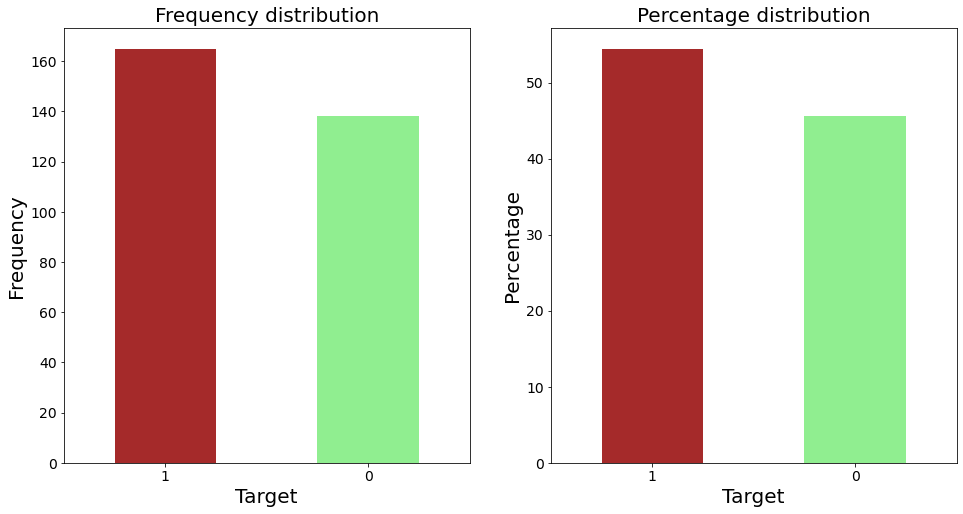

<IPython.core.display.Javascript object>

In [11]:
# Plot the frequency distribution of patients with and without heart disease

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(1, 2, 1)
ax1 = (
    df["target"]
    .value_counts()
    .plot.bar(fontsize=14, rot=0, color=["brown", "lightgreen"])
)
ax1.set_title("Frequency distribution", fontsize=20)
ax1.set_xlabel("Target", fontsize=20)
ax1.set_ylabel("Frequency", fontsize=20)

# Plot the percentage distribution of patient with and without heart disease
plt.subplot(1, 2, 2)
ax2 = ((df["target"].value_counts() / len(df)) * 100).plot.bar(
    fontsize=14, rot=0, color=["brown", "lightgreen"]
)
ax2.set_title("Percentage distribution", fontsize=20)
ax2.set_xlabel("Target", fontsize=20)
ax2.set_ylabel("Percentage", fontsize=20)

print(
    "Patient without heart disease:{}\nPatient with heart disease:{}".format(
        round(df["target"].value_counts()[0]), round(df["target"].value_counts()[1])
    )
)

print(
    "\nPatient without heart disease:{}%\nPatient with heart disease:{}%".format(
        round(df["target"].value_counts(normalize=True)[0], 2) * 100,
        round(df["target"].value_counts(normalize=True)[1], 2) * 100,
    )
)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

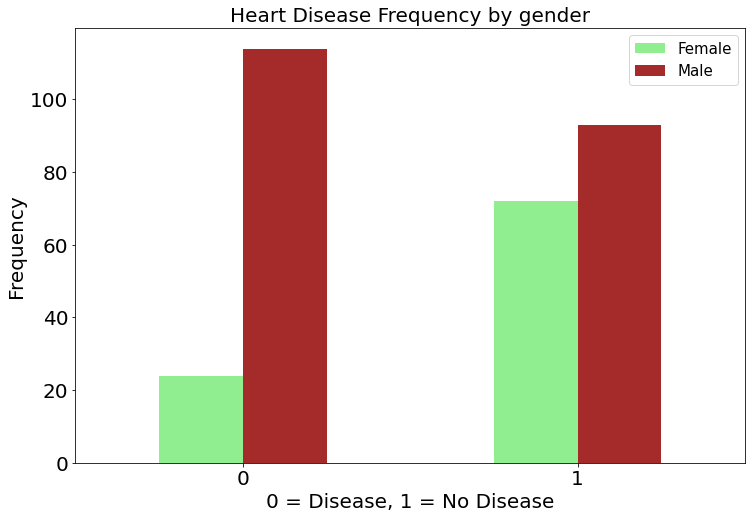

<IPython.core.display.Javascript object>

In [12]:
# plotting the heart disease frequency by gender
pd.crosstab(df.target, df.sex).plot.bar(
    figsize=(12, 8), color=["lightgreen", "brown"], fontsize=20
)

plt.title("Heart Disease Frequency by gender", fontsize=20)
plt.xlabel("0 = Disease, 1 = No Disease", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.legend(["Female", "Male"], fontsize=15)
plt.xticks(rotation=0)

Text(0, 0.5, 'Frequency')

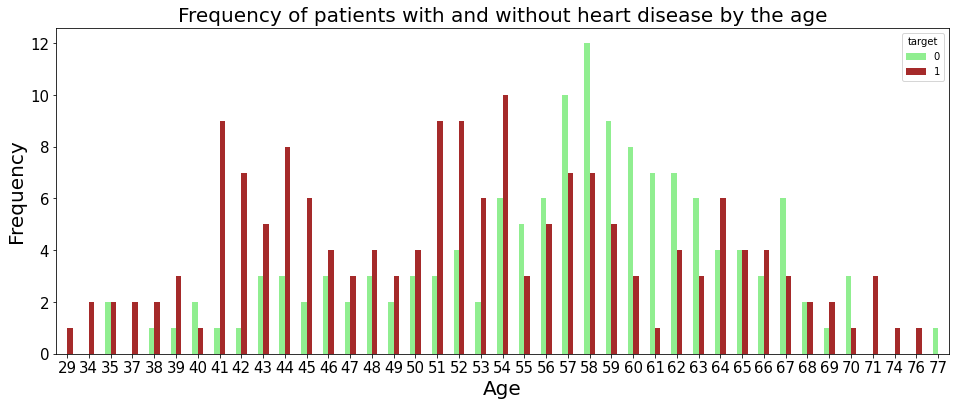

<IPython.core.display.Javascript object>

In [13]:
# Plot the frequency of patients with and without heart disease by the age

ax = pd.crosstab(df["age"], df["target"]).plot.bar(
    figsize=(16, 6), fontsize=15, rot=0, color=["lightgreen", "brown"]
)
ax.set_title(
    "Frequency of patients with and without heart disease by the age", fontsize=20
)
ax.set_xlabel("Age", fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

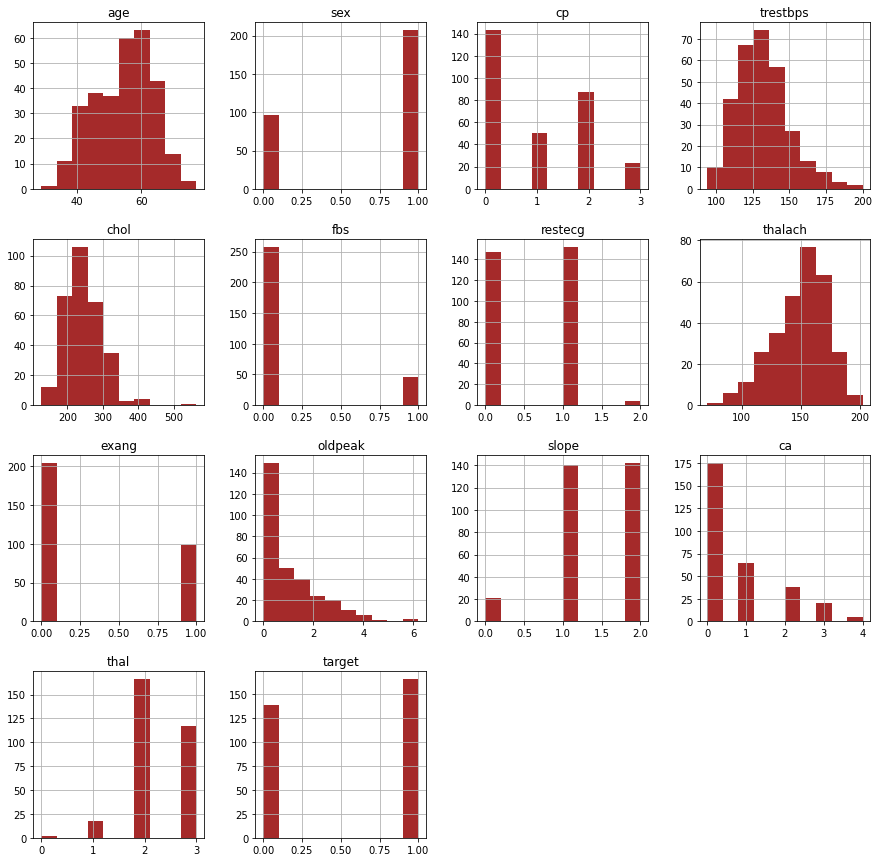

<IPython.core.display.Javascript object>

In [83]:
# plotting the histogram for all columns in the dataframe
df.hist(figsize=(15, 15), color="brown")

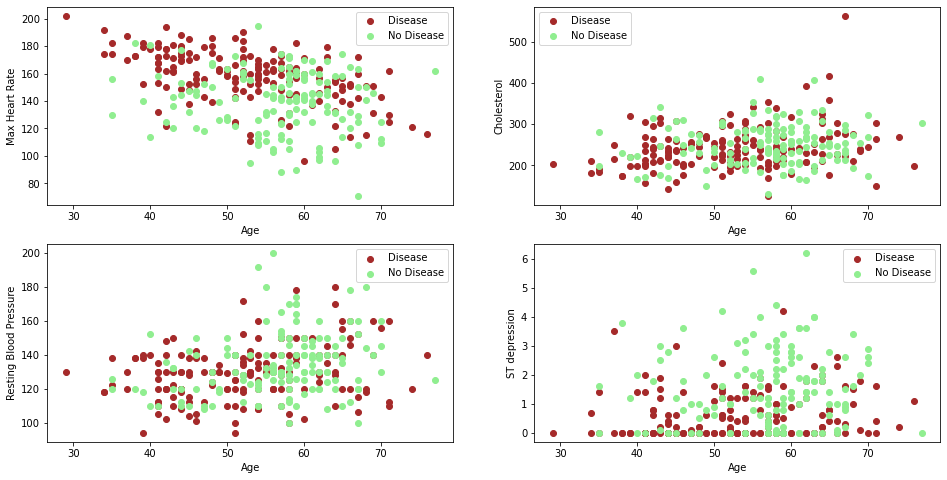

<IPython.core.display.Javascript object>

In [15]:
# plotting some interesting scatter-plots to show the dependencies between some columns
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.scatter(x=df.age[df.target == 1], y=df.thalach[df.target == 1], c="brown")
plt.scatter(x=df.age[df.target == 0], y=df.thalach[df.target == 0], c="lightgreen")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

plt.subplot(2, 2, 2)
plt.scatter(x=df.age[df.target == 1], y=df.chol[df.target == 1], c="brown")
plt.scatter(x=df.age[df.target == 0], y=df.chol[df.target == 0], c="lightgreen")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend(["Disease", "No Disease"])

plt.subplot(2, 2, 3)
plt.scatter(x=df.age[df.target == 1], y=df.trestbps[df.target == 1], c="brown")
plt.scatter(x=df.age[df.target == 0], y=df.trestbps[df.target == 0], c="lightgreen")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"])

plt.subplot(2, 2, 4)
plt.scatter(x=df.age[df.target == 1], y=df.oldpeak[df.target == 1], c="brown")
plt.scatter(x=df.age[df.target == 0], y=df.oldpeak[df.target == 0], c="lightgreen")
plt.xlabel("Age")
plt.ylabel("ST depression")
plt.legend(["Disease", "No Disease"])
plt.show()

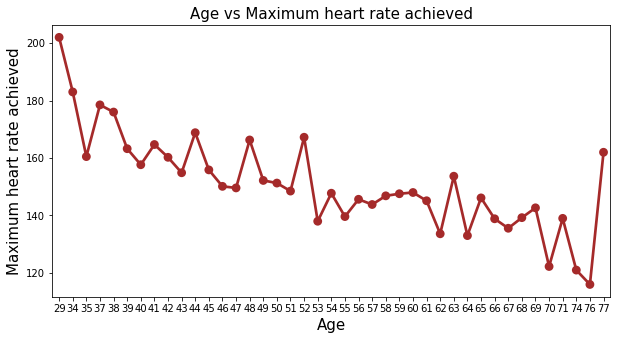

<IPython.core.display.Javascript object>

In [16]:
# plotting the max. heart rate compared to the age
# we can clearly see, that there is a trend downwards
age_unique = sorted(df.age.unique())
age_thalach_values = df.groupby("age")["thalach"].count().values
mean_thalach = []
for i, age in enumerate(age_unique):
    mean_thalach.append(sum(df[df["age"] == age].thalach) / age_thalach_values[i])

plt.figure(figsize=(10, 5))
sns.pointplot(x=age_unique, y=mean_thalach, color="brown", alpha=0.8)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Maximum heart rate achieved", fontsize=15)
plt.title("Age vs Maximum heart rate achieved", fontsize=15)
plt.show()

[Text(0, 0.5, 'age'),
 Text(0, 1.5, 'sex'),
 Text(0, 2.5, 'cp'),
 Text(0, 3.5, 'trestbps'),
 Text(0, 4.5, 'chol'),
 Text(0, 5.5, 'fbs'),
 Text(0, 6.5, 'restecg'),
 Text(0, 7.5, 'thalach'),
 Text(0, 8.5, 'exang'),
 Text(0, 9.5, 'oldpeak'),
 Text(0, 10.5, 'slope'),
 Text(0, 11.5, 'ca'),
 Text(0, 12.5, 'thal'),
 Text(0, 13.5, 'target')]

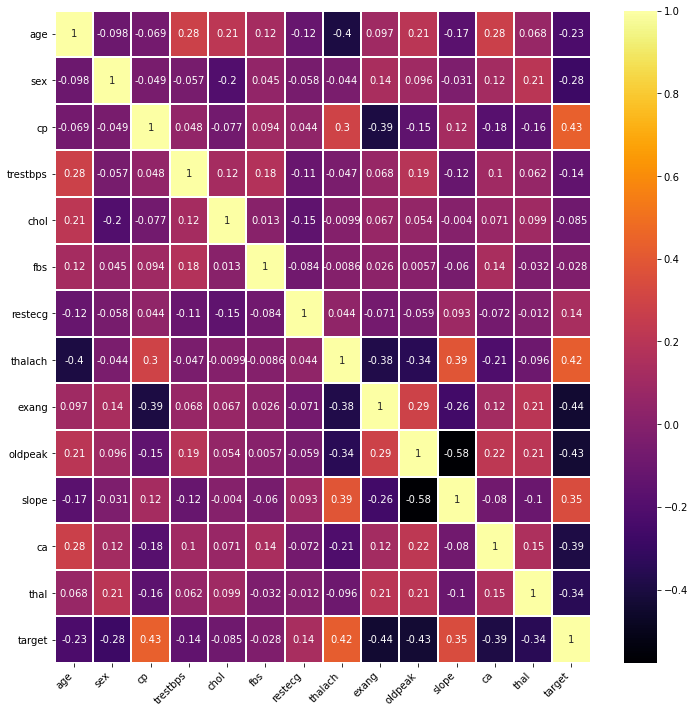

<IPython.core.display.Javascript object>

In [17]:
# plotting the correlation matrix to find dependencies between the columns
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
h = sns.heatmap(
    corr, cmap=plt.cm.inferno, annot=True, linewidths=1, square=False, ax=ax
)
ax.set_ylim(len(corr), 0)
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha="right")
h.set_yticklabels(h.get_yticklabels(), rotation=0, ha="right")

# Data pre-processing

## Subset Selection Methods

**Indentifying a subset of the p predictors that are related to the response
Fit the model using least squares on the reduced set of variables.**

### Best Subset Selection

**Best subset selection forms every possible model from the predictors. It then compares models with the same number of predictors using RSS or R^2. Once the best model is picked for a given number of predictors, Models with different numbers of predictors are compared using one of the information criteria (AIC, BIC, Adj R^2), or by Cross-validation to select the model with the lowest TEST MSE among the models selected in the previous step.**

In [18]:
# Function, that performs the best subset selection
# The return value of the function is a list, that saves the best model for each number of predictors
def best_subsets(dataframe, predictors, response, max_features):
    def process_linear_model(features):
        # Create design matrix
        X = sm.add_constant(dataframe[features])
        y = dataframe[response]

        # build and fit the linear model and return model and RSS value
        model = sm.OLS(y, X).fit()
        RSS = model.ssr
        return (model, RSS)

    def get_best_kth_model(k):
        results = []  # list with the results

        # loop over all possible combinations of k features
        for combo in combinations(predictors, k):
            # process linear model with this combination of features
            results.append(process_linear_model(list(combo)))

        # sort the models and return the one with the smallest RSS (the one at index 0 of the sorted results list)
        return sorted(results, key=itemgetter(1)).pop(0)[0]

    models = []

    # loop over all possibilities for k and create the progress bar, for each k save the best model in the list models
    # tqdm function here to obtain a nice progress bar
    for k in tqdm(range(1, max_features + 1)):
        models.append(get_best_kth_model(k))

    return models

<IPython.core.display.Javascript object>

In [19]:
# Define the predictors
predictors = list(df.columns)
predictors.remove("target")

# Call our best_subsets function
models = best_subsets(df, predictors, ["target"], max_features=13)

100%|██████████| 13/13 [00:22<00:00,  1.76s/it]


<IPython.core.display.Javascript object>

In [20]:
# The best variables of the model as predictors
models[12].params

const       0.828899
age        -0.000820
sex        -0.195996
cp          0.112703
trestbps   -0.001991
chol       -0.000354
fbs         0.017374
restecg     0.049848
thalach     0.003019
exang      -0.144046
oldpeak    -0.058789
slope       0.078979
ca         -0.100602
thal       -0.119039
dtype: float64

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predictor')

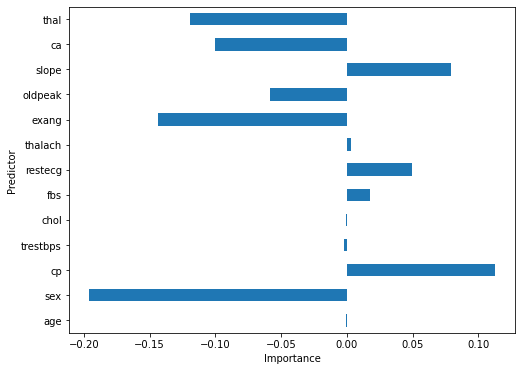

<IPython.core.display.Javascript object>

In [21]:
# Visualize the importances of all predictors
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
models[12].params.iloc[1:].plot(kind="barh", ax=ax1)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Predictor")

Vizualizing the AIC, BIC, adjusted R^2 of the best model for each number of predictors

Text(0, 0.5, 'Adjusted R**2')

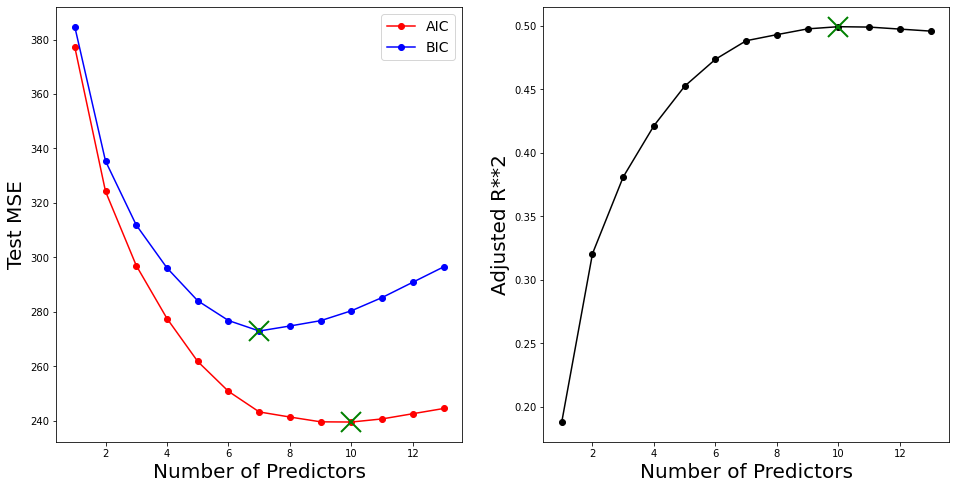

<IPython.core.display.Javascript object>

In [22]:
# Create plots of the statistics
aics = [models[x].aic for x in range(len(models))]
bics = [models[x].bic for x in range(len(models))]
r_adj = [models[x].rsquared_adj for x in range(len(models))]

# find the minimum and maximum
min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

# List
num_predictors = np.linspace(1, len(models), len(models))
# Create a plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Add test MSE estimates
ax1.plot(num_predictors, aics, "r", marker="o", label="AIC")
ax1.plot(num_predictors, bics, "b", marker="o", label="BIC")

# add the minimums to the axis
ax1.plot(min_aic_index + 1, min_aic, "gx", markersize=20, markeredgewidth=2)
ax1.plot(min_bic_index + 1, min_bic, "gx", markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel("Number of Predictors", fontsize=20)
ax1.set_ylabel("Test MSE", fontsize=20)
ax1.legend(loc="best", fontsize=14)

# Add Adj R**2 to the second subplot
ax2.plot(num_predictors, r_adj, "k", marker="o")
ax2.plot(max_radj_index + 1, max_radj, "gx", markersize=20, markeredgewidth=2)
ax2.set_xlabel("Number of Predictors", fontsize=20)
ax2.set_ylabel("Adjusted R**2", fontsize=20)

In [23]:
# Lowest BIC model has 7 following coefficients
models[6].params

const      0.536499
sex       -0.176876
cp         0.109313
thalach    0.003518
exang     -0.157643
oldpeak   -0.087547
ca        -0.103037
thal      -0.123476
dtype: float64

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predictor')

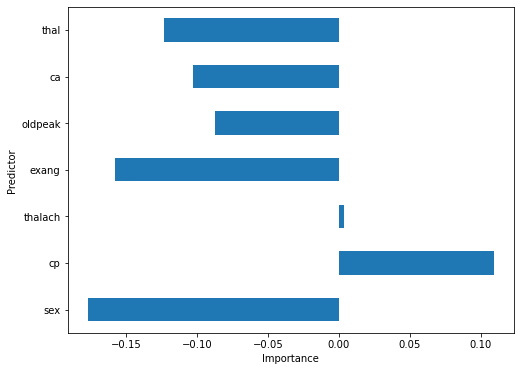

<IPython.core.display.Javascript object>

In [24]:
# Visualize the importances of 7 best predictors
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
models[6].params.iloc[1:].plot(kind="barh", ax=ax1)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Predictor")

### Forward Stepwise Selection

**The Forward Stepwise Selection algortihm sequentially adds predictors to the null model selecting the predictors that result in the lowest RSS for each added predictor. It then compares models with different features using Information Criteria or Cross-Validatation.**

In [3]:
# Function, that performs the forward stepwise selection
# The return value of the function is a list, that saves the best model for each number of predictors
def forward_step_select(df, predictors, response, max_features):
    def process_linear_model(features):
        # Create design matrix
        X = sm.add_constant(df[features])
        y = df[response]

        # Build and fit the linear model and return model and RSS value
        model = sm.OLS(y, X).fit()
        RSS = model.ssr
        return (model, RSS)

    def update_model(best_features, remaining_features):
        results = []

        for feature in remaining_features:
            results.append(process_linear_model(best_features + [feature]))

        # select model with the lowest RSS
        new_model = sorted(results, key=itemgetter(1)).pop(0)[0]
        new_features = list(new_model.params.index)[1:]

        return new_features, new_model

    # Create list to hold models, model features and the remaining features to test
    models = []
    best_features = []
    remaining_features = predictors

    while remaining_features and len(best_features) < max_features:
        # get the best new feature set from update_model
        new_features, new_model = update_model(best_features, remaining_features)
        # update the best features to include the one we just found
        best_features = new_features
        # reduce the available features for the next round
        remaining_features = [
            feature for feature in predictors if feature not in best_features
        ]

        # append the new_features and model so we can compare models with different features later
        models.append((new_features, new_model))

    return models

<IPython.core.display.Javascript object>

In [4]:
# # Define the predictors
predictors = list(df.columns)
predictors.remove("target")

# Call forward_step_select function
models = forward_step_select(df, predictors, ["target"], max_features=13)

<IPython.core.display.Javascript object>

In [5]:
def show_BIC_AIC_R2(models):
    # Almost the same plot as earlier, with only difference at the beginning
    # Create plots of the statistics
    aics = [models[x][1].aic for x in range(len(models))]
    bics = [models[x][1].bic for x in range(len(models))]
    r_adj = [models[x][1].rsquared_adj for x in range(len(models))]

    # find the minimum and maximum
    min_aic_index, min_aic = min(enumerate(aics), key=itemgetter(1))
    min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))
    max_radj_index, max_radj = max(enumerate(r_adj), key=itemgetter(1))

    # List
    num_predictors = np.linspace(1, len(models), len(models))
    # Create a plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    # Add test MSE estimates
    ax1.plot(num_predictors, aics, "r", marker="o", label="AIC")
    ax1.plot(num_predictors, bics, "b", marker="o", label="BIC")

    # add the minimums to the axis
    ax1.plot(min_aic_index + 1, min_aic, "gx", markersize=20, markeredgewidth=2)
    ax1.plot(min_bic_index + 1, min_bic, "gx", markersize=20, markeredgewidth=2)

    # Labels and Legend
    ax1.set_xlabel("Number of Predictors", fontsize=20)
    ax1.set_ylabel("Test MSE", fontsize=20)
    ax1.legend(loc="best", fontsize=14)

    # Add Adj R**2 to the second subplot
    ax2.plot(num_predictors, r_adj, "k", marker="o")
    ax2.plot(max_radj_index + 1, max_radj, "gx", markersize=20, markeredgewidth=2)
    ax2.set_xlabel("Number of Predictors", fontsize=20)
    ax2.set_ylabel("Adjusted R**2", fontsize=20)

<IPython.core.display.Javascript object>

In [6]:
# Lowest BIC model has 7 following coefficients
models[6][1].params

const      0.536499
exang     -0.157643
ca        -0.103037
oldpeak   -0.087547
cp         0.109313
sex       -0.176876
thal      -0.123476
thalach    0.003518
dtype: float64

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predictor')

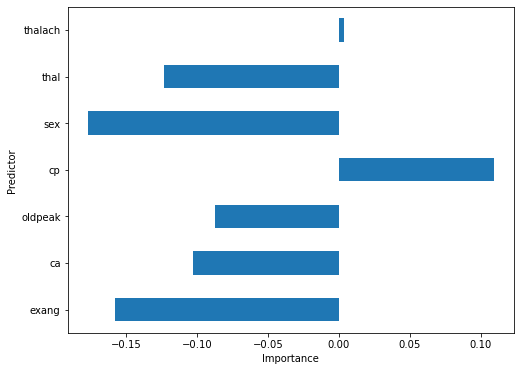

<IPython.core.display.Javascript object>

In [7]:
# Visualize the features importances
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
models[6][1].params.iloc[1:].plot(kind="barh", ax=ax1)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Predictor")

### Validation Model Selection

In [30]:
# random split of the data
np.random.seed(0)
training = np.random.choice([True, False], size=len(df))

# split the data into train and validation sets
df_train = df[training]
df_test = df[~training]

# construct models from the training set selecting the best models using best_subsets function
predictors = list(df_train.columns)
predictors.remove("target")
models = best_subsets(df_train, predictors, ["target"], max_features=13)

100%|██████████| 13/13 [00:24<00:00,  1.85s/it]


<IPython.core.display.Javascript object>

In [31]:
# for each of the models perform prediction and get MSE on the test data
mses = np.array([])
for model in models:
    # get the predictors for this model, ignore constant
    features = list(model.params.index[1:])

    # get the corresponding columns of df_test
    X_test = sm.add_constant(df_test[features])

    # make prediction for this model
    target_pred = model.predict(X_test)

    # get the MSE for this model
    mses = np.append(mses, np.mean((target_pred - df_test.target.values) ** 2))
print("MSEs =", mses)

MSEs = [0.20846769 0.16694578 0.15483987 0.14635591 0.13989496 0.13148146
 0.12527216 0.12616394 0.12384626 0.12596035 0.12410027 0.12296123
 0.12375166]


<IPython.core.display.Javascript object>

In [32]:
# determine the best model with the lowest test MSE
min_index, min_mse = min(enumerate(mses), key=itemgetter(1))
print(min_index, min_mse)

11 0.12296123428249639


<IPython.core.display.Javascript object>

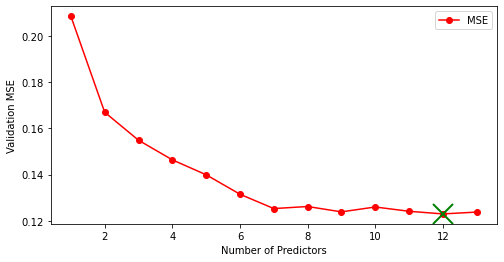

<IPython.core.display.Javascript object>

In [33]:
# plot all the models MSEs
num_predictors = np.linspace(1, len(models), len(models))

fig, ax1 = plt.subplots(figsize=(8, 4))

# add the mse and mimimum mse to the plot
ax1.plot(num_predictors, mses, "r", marker="o", label="MSE")
ax1.plot(min_index + 1, min_mse, "gx", markersize=20, markeredgewidth=2)

# Labels and Legend
ax1.set_xlabel("Number of Predictors")
ax1.set_ylabel("Validation MSE")
ax1.legend(loc="best")

In [60]:
# The best 12 variable model
print("12 Variable Model:", list(models[11].params.index))

12 Variable Model: ['const', 'age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


<IPython.core.display.Javascript object>

In [35]:
# construct models from the full dataset selecting the best models using best_subsets function
predictors = list(df.columns)
predictors.remove("target")
models = best_subsets(df, predictors, ["target"], max_features=13)
print(models[11].params)

100%|██████████| 13/13 [00:24<00:00,  1.86s/it]

const       0.821805
age        -0.000770
sex        -0.195240
cp          0.113426
trestbps   -0.001939
chol       -0.000355
restecg     0.049284
thalach     0.003032
exang      -0.143204
oldpeak    -0.059345
slope       0.078034
ca         -0.099744
thal       -0.119609
dtype: float64


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Predictor')

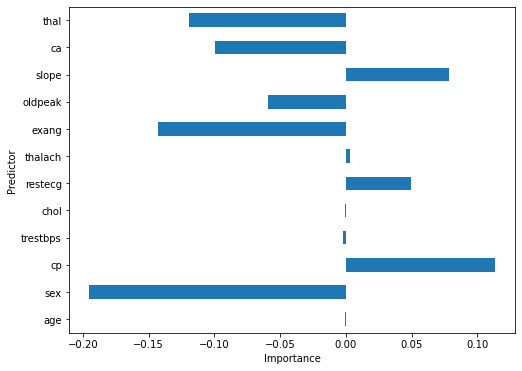

<IPython.core.display.Javascript object>

In [36]:
# Visualize the importances of 12 best predictors
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
models[11].params.iloc[1:].plot(kind="barh", ax=ax1)
ax1.set_xlabel("Importance")
ax1.set_ylabel("Predictor")

### Conclusion

**In general we saw, that all the models providing to use 7 to 12 predictors. 
Since the BIC-score is for 7 predictors the lowest, we decided to use only these 7.
Futhermore the AIC-score also doesn't dicrease dramaticly after the 7th predictor (for Best Subset, Forward Stepwise and the Validation Model Selection).**

**For the following Machine Learning algorithms we use therefore the Forward Stepwise Selection since it's much faster than Best Subset Selection.**



##  Encoding, Scaling and Splitting

**The following functions are for encoding, scaling and splitting the dataset.**

### Scaling 

**Scaling some of the columns for better performance**

In [8]:
def scaler_params(X, params_list_bic):
        # scaling the data
    scaler = StandardScaler()
    col_names = [
        "age",
        "trestbps",
        "chol",
        "thalach",
        "oldpeak",
    ]  # makes sense to scale only these columns
    col_names_new = []

    for i in col_names:
        if i in params_list_bic:
            col_names_new.append(i)

    col_names = col_names_new
    features = X[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    X[col_names] = features
    
    return X


<IPython.core.display.Javascript object>

### Encoding 

**Encoding selected columns** 

In [9]:
def columns_encoder(X):
    # Encode the catergorical data in the features data
    columns_encode = [
        "sex",
        "cp",
        "fbs",
        "restecg",
        "exang",
        "slope",
        "ca",
        "thal",
    ]  # possible columns to encode
    X_column_names = X.columns.values.tolist()
    columns_encode_new = []
    for name in columns_encode:  # checking if columns in columns_encode exist at all
        if name in X_column_names:
            columns_encode_new.append(name)

    X_encoded = pd.get_dummies(X, columns=columns_encode_new)

    return X_encoded

<IPython.core.display.Javascript object>

### Splitting the dataframe

**Splitting the dataframe in test and train**

In [10]:
def split_data(X_encoded, y):
    # from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=2
    )
    return X_train, X_test, y_train, y_test

<IPython.core.display.Javascript object>

## Several functions for automatical preprocessing

**We have tested and compared different variations of data-preprocessing.**

1. Firstly we passed the raw data, with all the columns and without scaling it to the algorithms (***raw_dataframe function()***).
2. Secondly we used Forward Stepwise Selection to determine the best predictors and and passed afterwards the data to the algorithms (***preprocess_FS_notscaled function()***).
3. Thirdly we first used Forward Stepwise Selection, scaled the data and finally passed it to the algorithms (***preprocess_FS_scaled()***).

**Our purpose was to discover how the different operations will affect on the final results.**

In [11]:
def raw_dataframe(df):
    # to make sure the original dataframe isn't going to change during the preprocess
    dt = df

    X = dt.drop(["target"], axis=1)
    y = dt.target

    X_encoded = columns_encoder(X)

    X_train, X_test, y_train, y_test = split_data(X_encoded, y)

    return X_train, X_test, y_train, y_test

<IPython.core.display.Javascript object>

In [12]:
def preprocess_FS_notscaled(df):
    # to make sure the original dataframe isn't going to change during the preprocess
    dt = df

    # Define the predictors
    predictors = list(dt.columns)
    predictors.remove("target")

    # Calling the forward_subset function
    models = forward_step_select(dt, predictors, ["target"], max_features=13)
    bics = [models[x][1].bic for x in range(len(models))]
    min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))

    params_list_bic = models[min_bic_index + 1][1].params.index.tolist()
    params_list_bic.remove("const")

    # Divide the data to target and features
    X = dt[params_list_bic]
    y = dt.target

    X_encoded = columns_encoder(X)

    X_train, X_test, y_train, y_test = split_data(X_encoded, y)

    return X_train, X_test, y_train, y_test

<IPython.core.display.Javascript object>

In [13]:
def preprocess_FS_scaled(df):
    # to make sure the original dataframe isn't going to change during the preprocess
    dt = df

    # Define the predictors
    predictors = list(dt.columns)
    predictors.remove("target")

    # Calling the forward_subset function
    models = forward_step_select(dt, predictors, ["target"], max_features=13)
    bics = [models[x][1].bic for x in range(len(models))]
    min_bic_index, min_bic = min(enumerate(bics), key=itemgetter(1))

    params_list_bic = models[min_bic_index + 1][1].params.index.tolist()
    params_list_bic.remove("const")

    # Divide the data to target and features
    X = dt[params_list_bic]
    y = dt.target

    X = scaler_params(X, params_list_bic)
    X_encoded = columns_encoder(X)

    X_train, X_test, y_train, y_test = split_data(X_encoded, y)

    return X_train, X_test, y_train, y_test

<IPython.core.display.Javascript object>

# Using Machine Learning

## Preparation
**In this chapter we define some functions which we will use for vizualization of the results.**

***make_subplots()*** **plots sevaral confusion matrices (one for each preprocess-combination).**

***models_raw*** **and the subsequent functions help us to present the accurcy results in a handsome way.**

In [14]:
def make_subplots(raw, acc1, not_scaled, acc2, scaled, acc3, Name):
    plt.figure(figsize=(24, 12))
    plt.suptitle(Name, fontsize=24)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    plt.subplot(2, 3, 1)
    plt.title("raw data - Accuracy: " + str(acc1) + "%")
    sns.heatmap(
        raw, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 25}
    )

    plt.subplot(2, 3, 2)
    plt.title(
        "forward stepwise selection without scaling - Accuracy: " + str(acc2) + "%"
    )
    sns.heatmap(
        not_scaled,
        annot=True,
        cmap="Blues",
        fmt="d",
        cbar=False,
        annot_kws={"size": 25},
    )

    plt.subplot(2, 3, 3)
    plt.title("forward stepwise selection with scaling - Accuracy: " + str(acc3) + "%")
    sns.heatmap(
        scaled, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 25}
    )

    plt.show()

<IPython.core.display.Javascript object>

In [15]:
models_raw = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Linear discriminant analysis",
            "Quadratic discriminant analysis",
            "k-Nearest Neighbor",
            "Support Vector Machines",
            "Decision trees",
            "Random forest",
        ],
        "Train Accuracy": [None, None, None, None, None, None, None],
        "Test Accuracy": [None, None, None, None, None, None, None],
    }
)
models_raw = models_raw.set_index("Model")
models_notscaled = models_raw.copy()
models_scaled = models_raw.copy()

<IPython.core.display.Javascript object>

In [16]:
def df_models_raw(name, train, test):
    models_raw.loc[name, "Train Accuracy"] = train
    models_raw.loc[name, "Test Accuracy"] = test


def df_models_notscaled(name, train, test):
    models_notscaled.loc[name, "Train Accuracy"] = train
    models_notscaled.loc[name, "Test Accuracy"] = test


def df_models_scaled(name, train, test):
    models_scaled.loc[name, "Train Accuracy"] = train
    models_scaled.loc[name, "Test Accuracy"] = test

<IPython.core.display.Javascript object>

## Supervised Learning

**For Supervised Learing we used 7 algorithms.**
1. Logistic Regression
2. Linear Discrininant Analysis
3. Quadratic Discriminant Analysis
4. K-Nearest Neighbor
5. Support Vector Machine
6. Decision Trees
7. Random Forest

**Each algorithm has the following structure:**
 1. Fitting the passed data
 2. Calculating the accuracy score
 3. Creating true and false postive rates
 4. Creating a confusion matrix
 5. Calculating the cross validation score
 
**The return of each function is always the same:**
 1. confusion matrix
 2. train/test accuracy
 3. false positive/true positive rate
 4. cross validation score

**Each function is followed by a line containing the following things:**
 1. Passing the raw data (using ***raw_dataframe()*** from chaper 5.3) to the respective function above
 2. Passing the preprocessed data without scaling (using ***preprocess_FS_notscaled()*** from chapter 5.3)  to the respective function above
 3. Passing the preprocessed and scaled data (using ***preprocess_FS_scaled()*** from chapter 5.3) to the respective function above

**The final output is always a plot of the confusion matrix of all 3 variants.**  


### Logistic Regression

In [90]:
def logistic_regression(X_train, X_test, y_train, y_test):

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    # getting the accuracy score
    acc_train_lr = lr.score(X_train, y_train) * 100
    acc_test_lr = lr.score(X_test, y_test) * 100

    target_probailities_log = lr.predict_proba(X_test)[:, 1]

    # Create true and false positive rates
    log_false_positive_rate, log_true_positive_rate, log_threshold = roc_curve(
        y_test, target_probailities_log
    )

    y_head_lr = lr.predict(X_test)
    cm_lr = confusion_matrix(y_test, y_head_lr)
    a_train_lr = "{:.2f}".format(acc_train_lr)
    a_test_lr = "{:.2f}".format(acc_test_lr)

    # Calculating the cross validation score
    log_reg_score = cross_val_score(lr, X_train, y_train, cv=10)

    return (
        cm_lr,
        a_train_lr,
        a_test_lr,
        log_false_positive_rate,
        log_true_positive_rate,
        log_reg_score,
    )

<IPython.core.display.Javascript object>

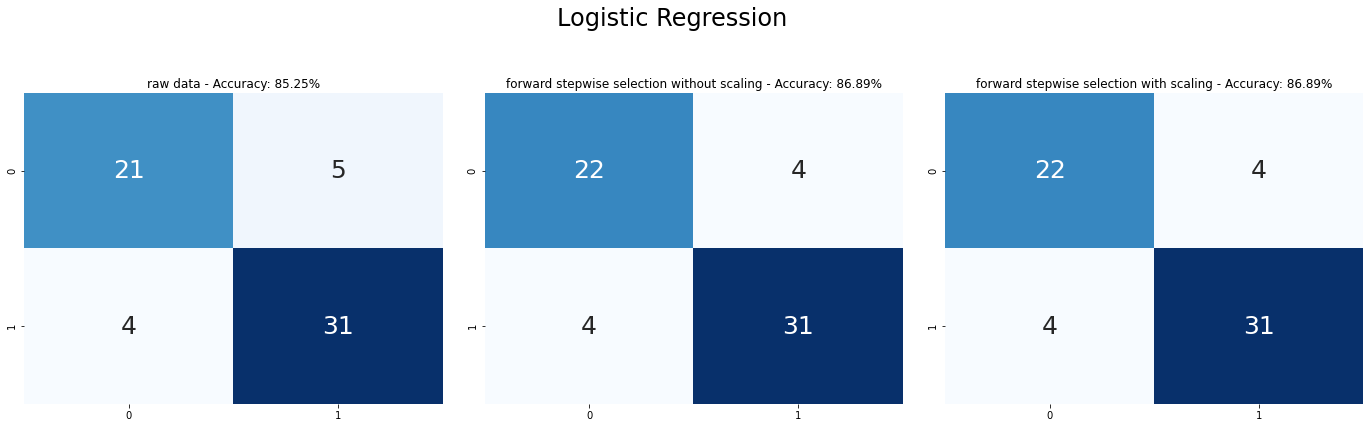

<IPython.core.display.Javascript object>

In [92]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_lr_raw,
    acc_test_lr_raw,
    log_false_positive_rate,
    log_true_positive_rate,
    log_reg_score,
) = logistic_regression(X_train, X_test, y_train, y_test)


(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_lr_notscaled,
    acc_test_lr_notscaled,
    log_false_positive_rate,
    log_true_positive_rate,
    log_reg_score,
) = logistic_regression(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_lr_scaled,
    acc_test_lr_scaled,
    log_false_positive_rate,
    log_true_positive_rate,
    log_reg_score,
) = logistic_regression(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
df_models_raw("Logistic Regression", acc_train_lr_raw, acc_test_lr_raw)
df_models_notscaled(
    "Logistic Regression", acc_train_lr_notscaled, acc_test_lr_notscaled
)
df_models_scaled("Logistic Regression", acc_train_lr_scaled, acc_test_lr_scaled)

make_subplots(
    raw_cfm,
    acc_test_lr_raw,
    not_scaled_cfm,
    acc_test_lr_notscaled,
    scaled_cfm,
    acc_test_lr_scaled,
    "Logistic Regression",
)

### Linear discriminant analysis

In [93]:
def linear_discriminant_analysis(X_train, X_test, y_train, y_test):

    # Create LDA Classifier and Fit
    clf = LDA(solver="lsqr", store_covariance=True)
    clf.fit(X_train, y_train)

    target_probailities_ld = clf.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    ld_false_positive_rate, ld_true_positive_rate, ld_threshold = roc_curve(
        y_test, target_probailities_ld
    )

    # Calculating the cross validation score
    lda_score = cross_val_score(clf, X_train, y_train, cv=10)

    # getting the accuracy score
    acc_train_lda = clf.score(X_train, y_train) * 100
    acc_test_lda = clf.score(X_test, y_test) * 100

    a_train_lda = "{:.2f}".format(acc_train_lda)
    a_test_lda = "{:.2f}".format(acc_test_lda)

    # Confusion matrix
    y_head_clf = clf.predict(X_test)
    cm_clf = confusion_matrix(y_test, y_head_clf)

    return (
        cm_clf,
        a_train_lda,
        a_test_lda,
        ld_false_positive_rate,
        ld_true_positive_rate,
        lda_score,
    )

<IPython.core.display.Javascript object>

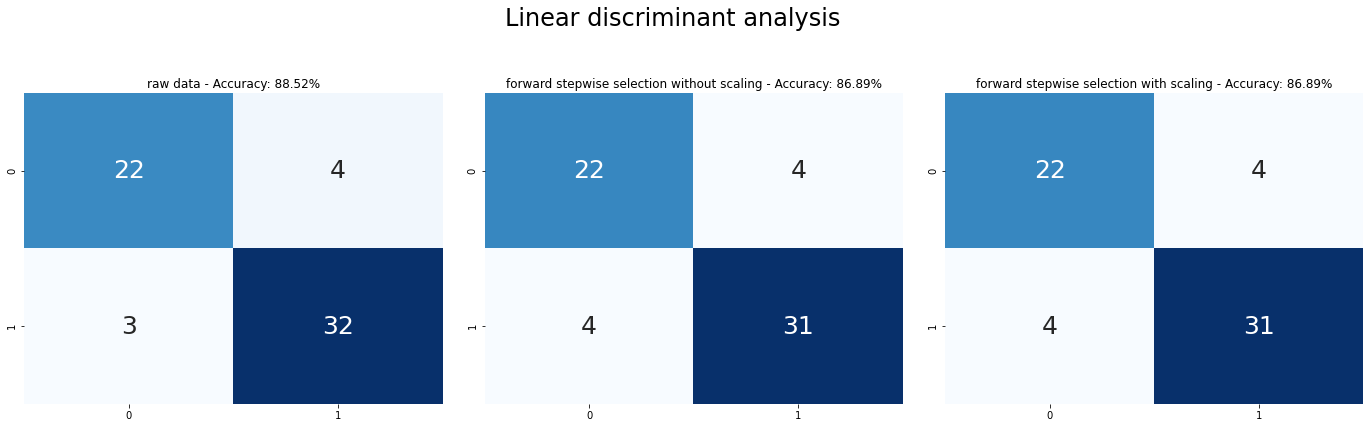

<IPython.core.display.Javascript object>

In [94]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_lda_raw,
    acc_test_lda_raw,
    ld_false_positive_rate,
    ld_true_positive_rate,
    lda_score,
) = linear_discriminant_analysis(X_train, X_test, y_train, y_test)

(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_lda_notscaled,
    acc_test_lda_notscaled,
    ld_false_positive_rate,
    ld_true_positive_rate,
    lda_score,
) = linear_discriminant_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_lda_scaled,
    acc_test_lda_scaled,
    ld_false_positive_rate,
    ld_true_positive_rate,
    lda_score,
) = linear_discriminant_analysis(
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled
)

df_models_raw("Linear discriminant analysis", acc_train_lda_raw, acc_test_lda_raw)
df_models_notscaled(
    "Linear discriminant analysis", acc_train_lda_notscaled, acc_test_lda_notscaled
)
df_models_scaled(
    "Linear discriminant analysis", acc_train_lda_scaled, acc_test_lda_scaled
)

make_subplots(
    raw_cfm,
    acc_test_lda_raw,
    not_scaled_cfm,
    acc_test_lda_notscaled,
    scaled_cfm,
    acc_test_lda_scaled,
    "Linear discriminant analysis",
)

### Quadratic discriminant analysis

In [95]:
def quadratic_discriminant_analysis(X_train, X_test, y_train, y_test):
    # Create QDA Classifier and Fit
    qclf = QDA(store_covariance=True)
    qclf.fit(X_train, y_train)

    target_probailities_qda = qclf.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    qda_false_positive_rate, qda_true_positive_rate, qda_threshold = roc_curve(
        y_test, target_probailities_qda
    )

    # Calculating the cross validation score
    qda_score = cross_val_score(qclf, X_train, y_train, cv=10)

    # getting the accuracy score
    acc_train_qda = qclf.score(X_train, y_train) * 100
    acc_test_qda = qclf.score(X_test, y_test) * 100

    a_train_qda = "{:.2f}".format(acc_train_qda)
    a_test_qda = "{:.2f}".format(acc_test_qda)

    # Confusion matrix
    y_head_qclf = qclf.predict(X_test)
    cm_qclf = confusion_matrix(y_test, y_head_qclf)

    return (
        cm_qclf,
        a_train_qda,
        a_test_qda,
        qda_false_positive_rate,
        qda_true_positive_rate,
        qda_score,
    )

<IPython.core.display.Javascript object>

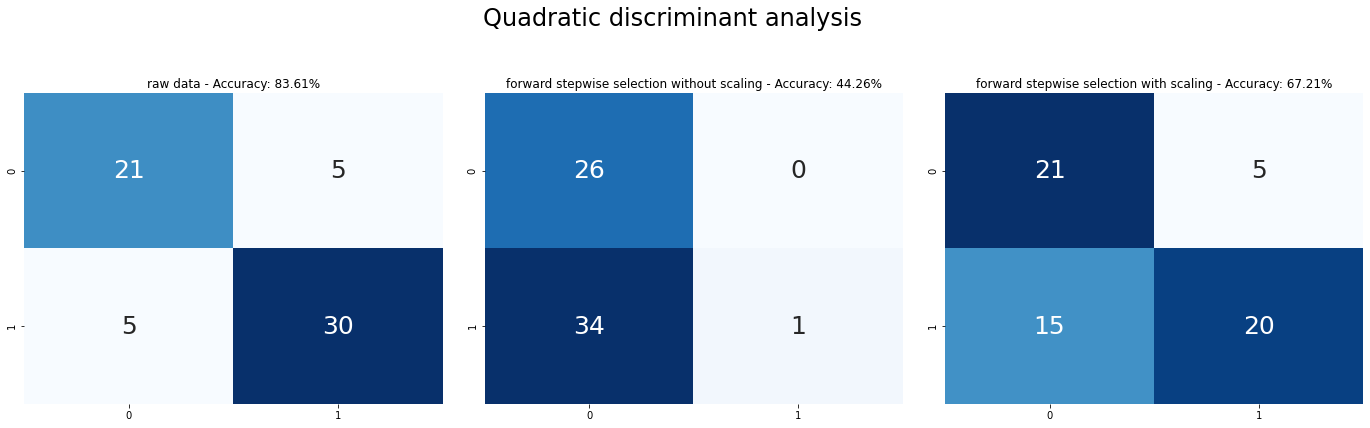

<IPython.core.display.Javascript object>

In [97]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_qda_raw,
    acc_test_qda_raw,
    qda_false_positive_rate,
    qda_true_positive_rate,
    qda_score,
) = quadratic_discriminant_analysis(X_train, X_test, y_train, y_test)


(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_qda_notscaled,
    acc_test_qda_notscaled,
    qda_false_positive_rate,
    qda_true_positive_rate,
    qda_score,
) = quadratic_discriminant_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_qda_scaled,
    acc_test_qda_scaled,
    qda_false_positive_rate,
    qda_true_positive_rate,
    qda_score,
) = quadratic_discriminant_analysis(
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled
)

df_models_raw("Quadratic discriminant analysis", acc_train_qda_raw, acc_test_qda_raw)
df_models_notscaled(
    "Quadratic discriminant analysis", acc_train_qda_notscaled, acc_test_qda_notscaled
)
df_models_scaled(
    "Quadratic discriminant analysis", acc_train_qda_scaled, acc_test_qda_scaled
)

make_subplots(
    raw_cfm,
    acc_test_qda_raw,
    not_scaled_cfm,
    acc_test_qda_notscaled,
    scaled_cfm,
    acc_test_qda_scaled,
    "Quadratic discriminant analysis",
)

### k-Nearest Neighbor

In [98]:
def k_nearest_neighbor_analysis(X_train, X_test, y_train, y_test):
    from sklearn.metrics import roc_auc_score, roc_curve

    # Implementing GridSearchCv to select best parameters and applying k-NN Algorithm

    knn = KNeighborsClassifier()
    params = {
        "n_neighbors": list(range(1, 20)),
        "p": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        "leaf_size": list(range(1, 20)),
        "weights": ["uniform", "distance"],
    }

    model = GridSearchCV(knn, params, cv=3, n_jobs=-1)

    model.fit(X_train, y_train)
    # print(model.best_params_)

    # Making predictions

    predict = model.predict(X_test)

    target_probailities_knn = model.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    knn_false_positive_rate, knn_true_positive_rate, knn_threshold = roc_curve(
        y_test, target_probailities_knn
    )

    # Calculating the cross validation score
    knn_score = cross_val_score(knn, X_train, y_train, cv=10)

    """
    from sklearn.metrics import (
        recall_score,
        precision_score,
        classification_report,
        roc_auc_score,
        roc_curve,
    )
    """
    acc_train_knn = model.score(X_train, y_train) * 100
    acc_test_knn = model.score(X_test, y_test) * 100
    a_train_knn = "{:.2f}".format(acc_train_knn)
    a_test_knn = "{:.2f}".format(acc_test_knn)

    # Creating the confusion matrix
    cm_knn = confusion_matrix(y_test, predict)

    return (
        cm_knn,
        a_train_knn,
        a_test_knn,
        knn_false_positive_rate,
        knn_true_positive_rate,
        knn_score,
    )

<IPython.core.display.Javascript object>

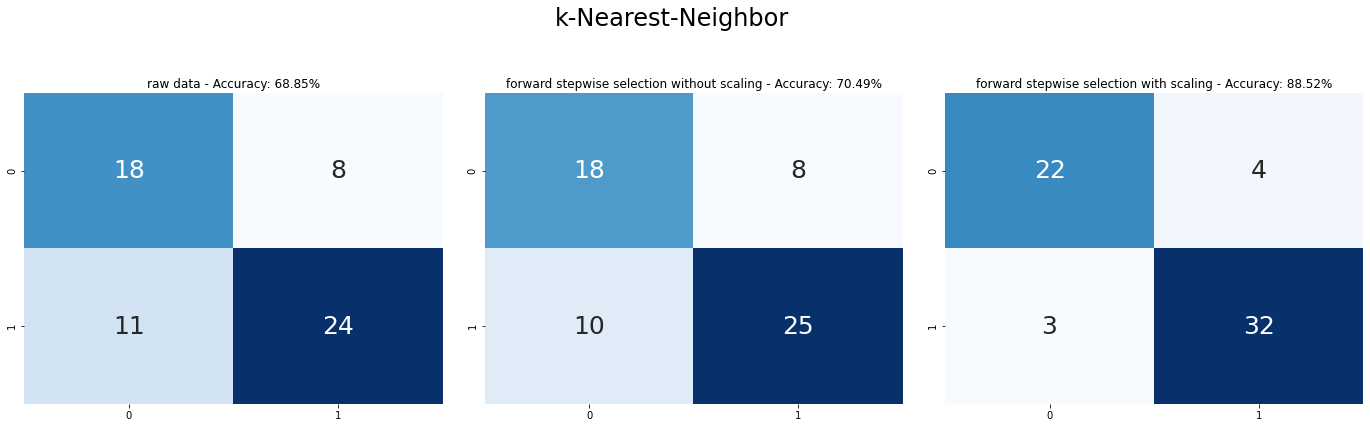

<IPython.core.display.Javascript object>

In [99]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_knn_raw,
    acc_test_knn_raw,
    knn_false_positive_rate,
    knn_true_positive_rate,
    knn_score,
) = k_nearest_neighbor_analysis(X_train, X_test, y_train, y_test)

(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_knn_notscaled,
    acc_test_knn_notscaled,
    knn_false_positive_rate,
    knn_true_positive_rate,
    knn_score,
) = k_nearest_neighbor_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_knn_scaled,
    acc_test_knn_scaled,
    knn_false_positive_rate,
    knn_true_positive_rate,
    knn_score,
) = k_nearest_neighbor_analysis(
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled
)

df_models_raw("k-Nearest Neighbor", acc_train_knn_raw, acc_test_knn_raw)
df_models_notscaled(
    "k-Nearest Neighbor", acc_train_knn_notscaled, acc_test_knn_notscaled
)
df_models_scaled("k-Nearest Neighbor", acc_train_knn_scaled, acc_test_knn_scaled)

make_subplots(
    raw_cfm,
    acc_test_knn_raw,
    not_scaled_cfm,
    acc_test_knn_notscaled,
    scaled_cfm,
    acc_test_knn_scaled,
    "k-Nearest-Neighbor",
)

### Support vector machine

In [54]:
def svm_analysis(X_train, X_test, y_train, y_test):

    svm = SVC(random_state=1, probability=True)
    svm.fit(X_train, y_train)

    acc_train_svm = svm.score(X_train, y_train) * 100
    acc_test_svm = svm.score(X_test, y_test) * 100
    a_train_svm = "{:.2f}".format(acc_train_svm)
    a_test_svm = "{:.2f}".format(acc_test_svm)

    target_probailities_svm = svm.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    svm_false_positive_rate, svm_true_positive_rate, svm_threshold = roc_curve(
        y_test, target_probailities_svm
    )

    # Calculating the cross validation score
    svm_score = cross_val_score(svm, X_train, y_train, cv=10)

    y_head_svm = svm.predict(X_test)
    cm_svm = confusion_matrix(y_test, y_head_svm)

    return (
        cm_svm,
        a_train_svm,
        a_test_svm,
        svm_false_positive_rate,
        svm_true_positive_rate,
        svm_score,
    )

<IPython.core.display.Javascript object>

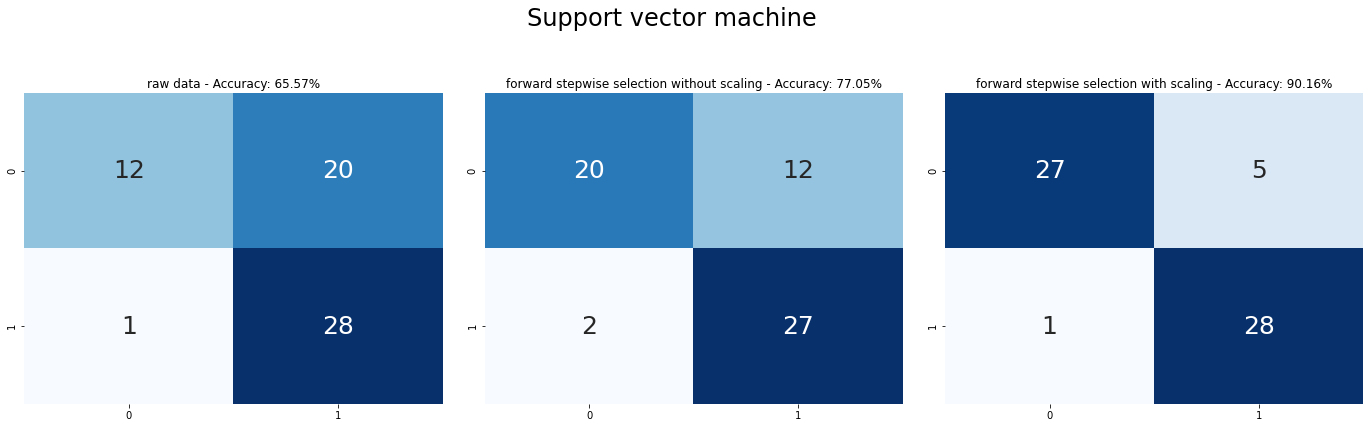

<IPython.core.display.Javascript object>

In [55]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_svm_raw,
    acc_test_svm_raw,
    svm_false_positive_rate,
    svm_true_positive_rate,
    svm_score,
) = svm_analysis(X_train, X_test, y_train, y_test)

(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_svm_notscaled,
    acc_test_svm_notscaled,
    svm_false_positive_rate,
    svm_true_positive_rate,
    svm_score,
) = svm_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_svm_scaled,
    acc_test_svm_scaled,
    svm_false_positive_rate,
    svm_true_positive_rate,
    svm_score,
) = svm_analysis(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

df_models_raw("Support Vector Machines", acc_train_svm_raw, acc_test_svm_raw)
df_models_notscaled(
    "Support Vector Machines", acc_train_svm_notscaled, acc_test_svm_notscaled
)
df_models_scaled("Support Vector Machines", acc_train_svm_scaled, acc_test_svm_scaled)

make_subplots(
    raw_cfm,
    acc_test_svm_raw,
    not_scaled_cfm,
    acc_test_svm_notscaled,
    scaled_cfm,
    acc_test_svm_scaled,
    "Support vector machine",
)

### Decision trees

In [56]:
def decision_tree_analysis(X_train, X_test, y_train, y_test):
    from sklearn.metrics import roc_auc_score, roc_curve
    from IPython.display import Image
    from six import StringIO
    from sklearn.tree import export_graphviz
    import pydot

    dtree = DecisionTreeClassifier(random_state=7)

    # Setting parameters for GridSearchCV
    params = {
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    }
    tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

    tree_model.fit(X_train, y_train)
    # Printing best parameters selected through GridSearchCV
    print(tree_model.best_params_)

    # Making prediction
    predict = tree_model.predict(X_test)

    acc_train_dt = tree_model.score(X_train, y_train) * 100
    acc_test_dt = tree_model.score(X_test, y_test) * 100
    a_train_dt = "{:.2f}".format(acc_train_dt)
    a_test_dt = "{:.2f}".format(acc_test_dt)

    target_probailities_dt = tree_model.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    dt_false_positive_rate, dt_true_positive_rate, dt_threshold = roc_curve(
        y_test, target_probailities_dt
    )

    # Calculating the cross validation score
    dt_score = cross_val_score(tree_model, X_train, y_train, cv=10)

    from sklearn.metrics import classification_report, roc_auc_score, roc_curve

    cm_dt = confusion_matrix(y_test, predict)

    """
    features = list(df.columns[:-1])
    dot_data = StringIO()  
    export_graphviz(tree_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    Image(graph[0].create_png())
    """

    return (
        cm_dt,
        a_train_dt,
        a_test_dt,
        dt_false_positive_rate,
        dt_true_positive_rate,
        dt_score,
    )

<IPython.core.display.Javascript object>

{'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 15}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 14}
{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 14}


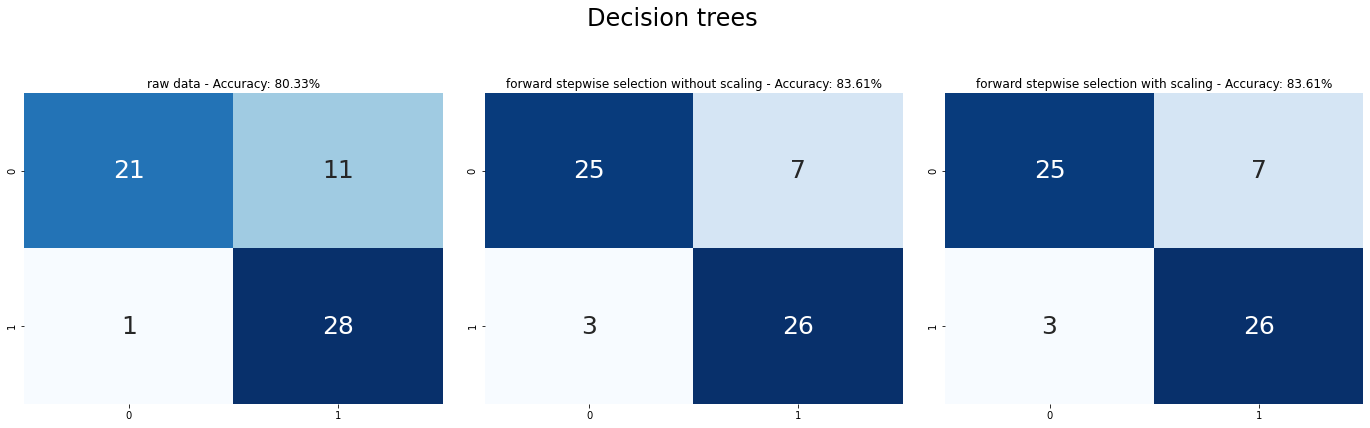

<IPython.core.display.Javascript object>

In [57]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
(
    raw_cfm,
    acc_train_dt_raw,
    acc_test_dt_raw,
    dt_false_positive_rate,
    dt_true_positive_rate,
    dt_score,
) = decision_tree_analysis(X_train, X_test, y_train, y_test)

(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)
(
    not_scaled_cfm,
    acc_train_dt_notscaled,
    acc_test_dt_notscaled,
    dt_false_positive_rate,
    dt_true_positive_rate,
    dt_score,
) = decision_tree_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_dt_scaled,
    acc_test_dt_scaled,
    dt_false_positive_rate,
    dt_true_positive_rate,
    dt_score,
) = decision_tree_analysis(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

df_models_raw("Decision trees", acc_train_dt_raw, acc_test_dt_raw)
df_models_notscaled("Decision trees", acc_train_dt_notscaled, acc_test_dt_notscaled)
df_models_scaled("Decision trees", acc_train_dt_scaled, acc_test_dt_scaled)

make_subplots(
    raw_cfm,
    acc_test_dt_raw,
    not_scaled_cfm,
    acc_test_dt_notscaled,
    scaled_cfm,
    acc_test_dt_scaled,
    "Decision trees",
)

### Random forest

In [19]:
def random_forest_analysis(X_train, X_test, y_train, y_test):

    model = RandomForestClassifier(
        max_depth=5
    )  # here you can change the depth of the model
    rdm = model.fit(X_train, y_train)

    estimator = model.estimators_[1]
    feature_names = [i for i in X_train.columns]

    y_train_str = y_train.astype("str")
    y_train_str[y_train_str == "0"] = "no disease"
    y_train_str[y_train_str == "1"] = "disease"
    y_train_str = y_train_str.values

    export_graphviz(
        estimator,
        out_file="tree.dot",
        feature_names=feature_names,
        class_names=y_train_str,
        rounded=True,
        proportion=True,
        label="root",
        precision=2,
        filled=True,
    )
    im = Image(filename="tree.png")
    display(im)

    acc_train = model.score(X_train, y_train) * 100
    acc_train_rf = "{:.2f}".format(acc_train)

    acc_test = model.score(X_test, y_test) * 100
    acc_test_rf = "{:.2f}".format(acc_test)

    y_predict = model.predict(X_test)
    y_pred_quant = model.predict_proba(X_test)[:, 1]
    y_pred_bin = model.predict(X_test)

    target_probailities_rf = model.predict_proba(X_test)[:, 1]
    # Create true and false positive rates
    rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(
        y_test, target_probailities_rf
    )
    # Calculating the cross validation score
    rf_score = cross_val_score(model, X_train, y_train, cv=5)

    # Assess the fit with a confusion matrix
    cm_rf = confusion_matrix(y_test, y_predict)
    return (
        cm_rf,
        acc_train_rf,
        acc_test_rf,
        rf_false_positive_rate,
        rf_true_positive_rate,
        rf_score,
    )

<IPython.core.display.Javascript object>

raw data:


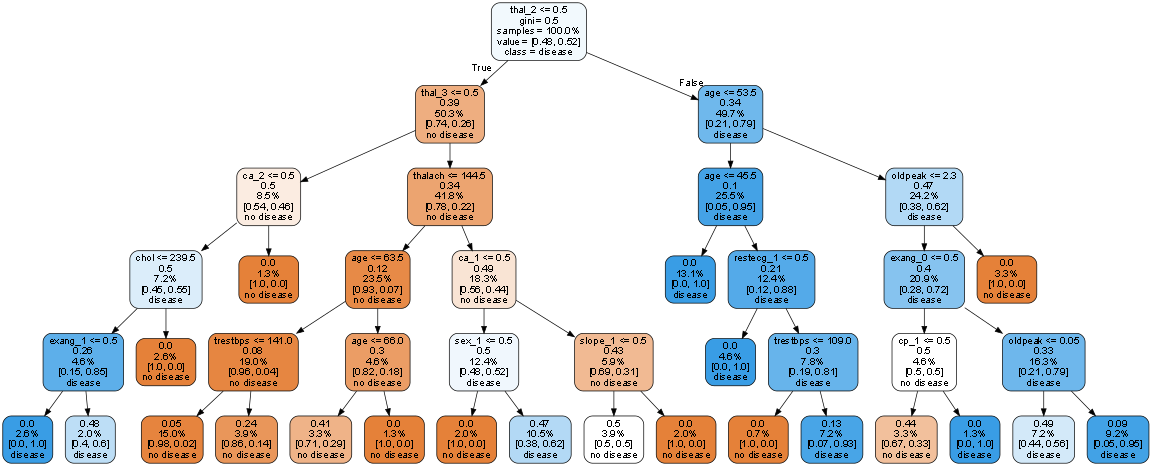

forward stepwise selection without scaling:


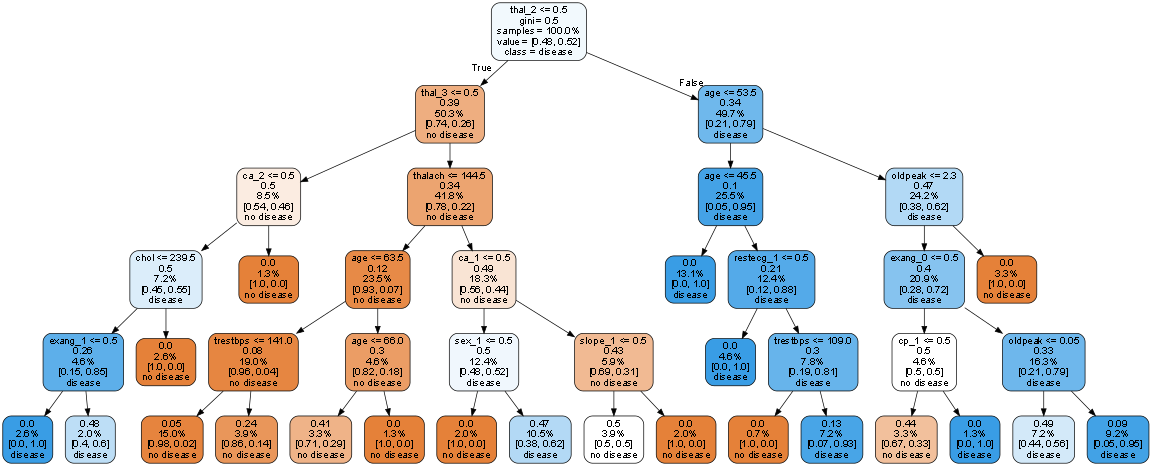

forward stepwise selection with scaling:


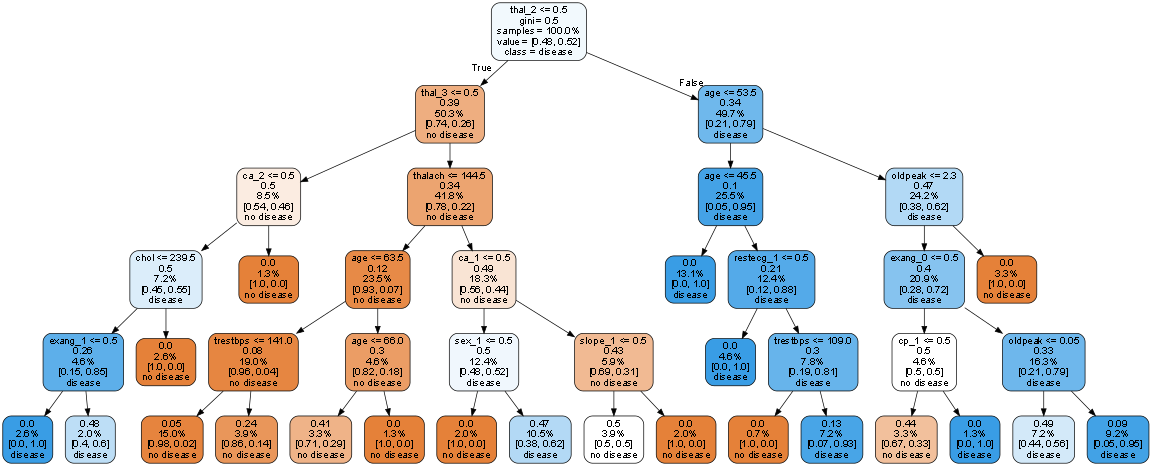

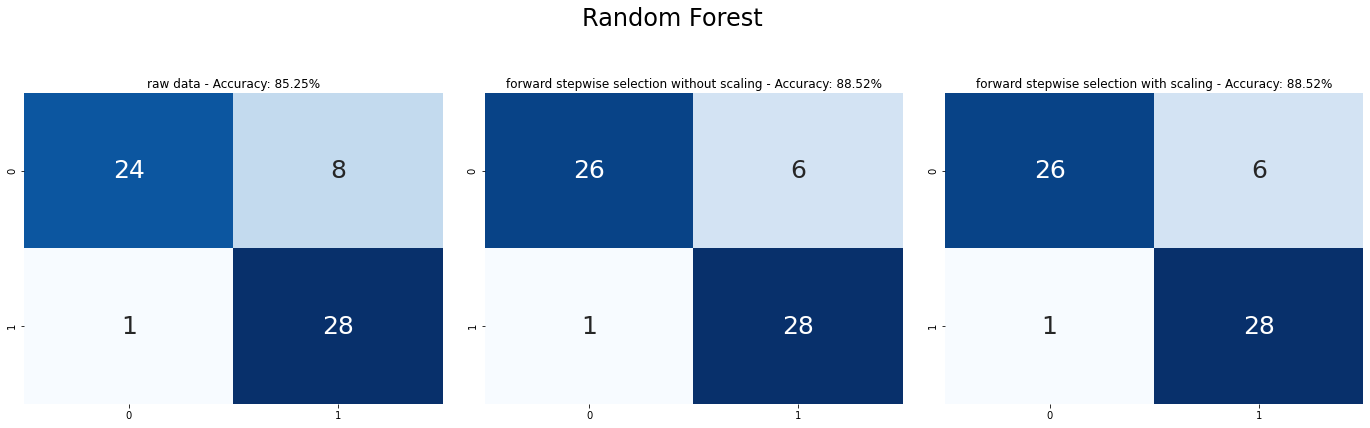

<IPython.core.display.Javascript object>

In [20]:
X_train, X_test, y_train, y_test = raw_dataframe(df)
print("raw data:")
(
    raw_cfm,
    acc_train_rf_raw,
    acc_test_rf_raw,
    rf_false_positive_rate,
    rf_true_positive_rate,
    rf_score,
) = random_forest_analysis(X_train, X_test, y_train, y_test)

(
    X_train_notscaled,
    X_test_notscaled,
    y_train_notscaled,
    y_test_notscaled,
) = preprocess_FS_notscaled(df)

print("forward stepwise selection without scaling:")
(
    not_scaled_cfm,
    acc_train_rf_notscaled,
    acc_test_rf_notscaled,
    rf_false_positive_rate,
    rf_true_positive_rate,
    rf_score,
) = random_forest_analysis(
    X_train_notscaled, X_test_notscaled, y_train_notscaled, y_test_notscaled
)

print("forward stepwise selection with scaling:")
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = preprocess_FS_scaled(df)
(
    scaled_cfm,
    acc_train_rf_scaled,
    acc_test_rf_scaled,
    rf_false_positive_rate,
    rf_true_positive_rate,
    rf_score,
) = random_forest_analysis(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)

df_models_raw("Random forest", acc_train_rf_raw, acc_test_rf_raw)
df_models_notscaled("Random forest", acc_train_rf_notscaled, acc_test_rf_notscaled)
df_models_scaled("Random forest", acc_train_rf_scaled, acc_test_rf_scaled)

make_subplots(
    raw_cfm,
    acc_test_rf_raw,
    not_scaled_cfm,
    acc_test_rf_notscaled,
    scaled_cfm,
    acc_test_rf_scaled,
    "Random Forest",
)

## Unsupervised learning

**For Unsupervised Learning we used only k-means, since the primary goal was to predict data.**

**Our purpose with k-means was to find nicely separated clusters.**

### K-means clustering

***k_means_analysis()*** **takes as input the raw dataframe, the number of clusters we want to be found and two column names.**

**There are two outputs:** 
1. A scatter plot which shows the data with the calculated clusters. 
2. A graphic which shows the "best" number of clusters (by evaluating the cluster quality).

In [ ]:
def k_means_analysis(dt, cluster, a, b):
    data = dt.loc[:, [a, b]]

    # Calcualting the clusters
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    plt.scatter(dt[a], dt[b], c=labels)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

    # Evaluating the cluster quality
    inertia_list = np.empty(14)
    for i in range(1, 14):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertia_list[i] = kmeans.inertia_
    plt.plot(range(0, 14), inertia_list, "-o")
    plt.xlabel("Number of cluster")
    plt.ylabel("Inertia")
    plt.show()

In [ ]:
k_means_analysis(df, 2, "chol", "age")

## Results

### Cross Validation Score

**summing up the Cross Validation Score in a dataframe**

**showing the train/test accuracy for all used methods to preprocess the data**

In [106]:
models_raw

Train Accuracy Test Accuracy
Model                                                       
Logistic Regression                      87.60         85.25
Linear discriminant analysis             87.60         88.52
Quadratic discriminant analysis          87.60         83.61
k-Nearest Neighbor                       81.40         68.85
Support Vector Machines                  63.64         65.57
Decision trees                           82.23         80.33
Random forest                             None          None

<IPython.core.display.Javascript object>

In [107]:
models_notscaled

Train Accuracy Test Accuracy
Model                                                       
Logistic Regression                      85.54         86.89
Linear discriminant analysis             85.95         86.89
Quadratic discriminant analysis          48.76         44.26
k-Nearest Neighbor                       77.69         70.49
Support Vector Machines                  66.94         77.05
Decision trees                           86.78         83.61
Random forest                             None          None

<IPython.core.display.Javascript object>

In [108]:
models_scaled

Train Accuracy Test Accuracy
Model                                                       
Logistic Regression                      85.95         86.89
Linear discriminant analysis             85.95         86.89
Quadratic discriminant analysis          70.25         67.21
k-Nearest Neighbor                       83.88         88.52
Support Vector Machines                  88.84         90.16
Decision trees                           86.78         83.61
Random forest                             None          None

<IPython.core.display.Javascript object>

In [110]:
lg_score1 = round(log_reg_score.mean() * 100, 2).astype(str) + "%"
lda_score1 = round(lda_score.mean() * 100, 2).astype(str) + "%"
qda_score1 = round(qda_score.mean() * 100, 2).astype(str) + "%"
knn_score1 = round(knn_score.mean() * 100, 2).astype(str) + "%"
svm_score1 = round(svm_score.mean() * 100, 2).astype(str) + "%"
dt_score1 = round(dt_score.mean() * 100, 2).astype(str) + "%"
rf_score1 = round(rf_score.mean() * 100, 2).astype(str) + "%"

cv_score = pd.DataFrame(
    {
        "Model": [
            "Logistic Regression",
            "Linear discriminant analysis",
            "Quadratic discriminant analysis",
            "k-Nearest Neighbor",
            "Support Vector Machines",
            "Decision trees",
             "Random forest",
        ],
        "Cross Validation Score": [
            lg_score1,
            lda_score1,
            qda_score1,
            knn_score1,
            svm_score1,
            dt_score1,
             rf_score1,
        ],
    }
)
cv_score = cv_score.set_index("Model")
cv_score

Cross Validation Score
Model                                                 
Logistic Regression                             82.27%
Linear discriminant analysis                    82.68%
Quadratic discriminant analysis                 56.63%
k-Nearest Neighbor                              80.65%
Support Vector Machines                         80.53%
Decision trees                                  73.12%

<IPython.core.display.Javascript object>

### ROC-curve

**Plotting the ROC-curve for all algorithms in one plot**

NameError: name 'rf_false_positive_rate' is not defined

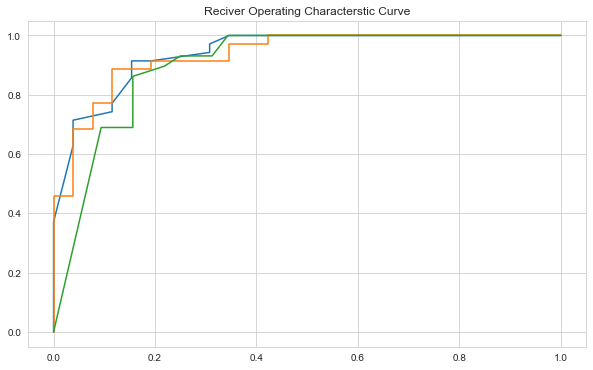

<IPython.core.display.Javascript object>

In [102]:
# Plot ROC Curve
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.title("Reciver Operating Characterstic Curve")
plt.plot(knn_false_positive_rate, knn_true_positive_rate, label="k-Nearest Neighbor")
plt.plot(log_false_positive_rate, log_true_positive_rate, label="Logistic Regression")
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label="Decision Tree")
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label="Random Forest")
plt.plot(
    svm_false_positive_rate, svm_true_positive_rate, label="Support Vector Machine"
)
plt.plot(
    ld_false_positive_rate, ld_true_positive_rate, label="Linear Discriminant Analysis"
)
plt.plot(
    qda_false_positive_rate,
    qda_true_positive_rate,
    label="Quadratic Discriminant Analysis",
)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".5")
plt.plot([1, 1], c=".5")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()